In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import numpy as np
import astropy.units as u
from datetime import date
from random import choices
from math import factorial, erf
from astroquery.simbad import Simbad
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter1d
import scipy.stats as stats
from scipy.stats import norm, truncnorm
import h5py
from sklearn.neighbors import KernelDensity
from scipy import stats
from matplotlib.ticker import AutoMinorLocator
from IPython.display import clear_output



In [95]:
def make_cmap(colors, position, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0,1,256)
    # if position == None:
    #     position = np.linspace(0,1,len(colors))
    # else:
    if len(position) != len(colors):
        sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
        sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap
def choose_cmap(custom_cmap, reverse_cmap=False):

    custom_cmaps = {'my diverging red blue': [(204/255, 230/255, 255/255),
                                              (0/255, 102/255, 204/255),
                                              (51/255, 0/255, 102/255),
                                              (255/255, 0/255, 102/255),
                                              (255/255, 230/255, 243/255)],
                    'my blue yellow red': [(0 / 255, 74 / 255, 171 / 255),
                                        (255 / 255, 209 / 255, 26 / 255),
                                        (178 / 255, 0 / 255, 3 / 255)],
                    'McLaren 2022': [(0/255, 38/255, 77/255),
                                    (211/255, 0/255, 87/255),
                                    (255/255, 153/255, 0/255),
                                    (191/255, 217/255, 217/255)],
                    'vibrant candy': [(0/255, 26/255, 77/255),
                                    (204/255, 0/255, 102/255),
                                    (255/255, 204/255, 0/255),
                                    (153/255, 255/255, 153/255)],
                    'ice queen': [(37/255, 0/255, 51/255),
                                  (0/255, 155/255, 153/255),
                                  (214/255, 255/255, 214/255)],
                    'ice queen2': [(0/255, 0/255, 0/255),
                                   (0/255, 134/255, 179/255),
                                   (255/255, 255/255, 200/255)],
                    'amazon queen': [(0/255, 0/255, 0/255),
                                     (25/255, 103/255, 103/255),
                                     (119/255, 179/255, 105/255),
                                     (255/255, 234/255, 0/255),
                                     (255/255, 255/255, 255/255)],
                    'amazon queen2': [(0/255, 34/255, 51/255),
                                      (25/255, 103/255, 103/255),
                                    #   (119/255, 179/255, 105/255),
                                    #   (63/255, 211/255, 146/255),
                                      (255/255, 234/255, 0/255)],
                    'colorado sunrise': [(0/255, 17/255, 51/255),
                                         (234/255, 74/255, 104/255),
                                         (255/255, 224/255, 102/255)],
                    'muted rbg': [(102/255, 0/255, 51/255),
                                  (0/255, 85/255, 128/255),
                                  (140/255, 153/255, 0/255)],
                    'perceptual rbg': [(102/255, 0/255, 51/255),
                                       (60/255, 40/255, 90/255),
                                       (0/255, 102/255, 153/255),
                                       (134/255, 179/255, 0/255),
                                       (255/255, 200/255, 50/255),
                                       (255/255, 255/255, 160/255)],
                    'mclaren livery': [(0/255, 119/255, 179/255),
                                       (204/255, 0/255, 102/255),
                                    #    (255/255, 128/255, 0/255),
                                       (255/255, 153/255, 0/255),
                                       (207/255, 226/255, 226/255)],
                    'volcanic sunrise': [(0/255, 51/255, 77/255),
                                  (153/255, 0/255, 77/255),
                                  (255/255, 80/255, 80/255),
                                  (255/255, 255/255, 153/255)],
                    'cyber grape': [(51/255, 0/255, 51/255),
                                    (128/255, 0/255, 128/255),
                                    (153/255, 102/255, 255/255),
                                    (204/255, 255/255, 255/255)],
                    'cyber grape2': [(51/255, 0/255, 51/255),
                                     (128/255, 0/255, 128/255),
                                     (255/255, 153/255, 204/255),
                                     (204/255, 255/255, 255/255)],
                    'black limeaid': [(0/255, 0/255, 77/255),
                                      (102/255, 153/255, 153/255),
                                      (204/255, 255/255, 51/255)],
                    'raspberry punch1': [(51/255, 0/255, 102/255),
                                        (51/255, 204/255, 224/255),
                                        (248/255, 255/255, 230/255)],
                    'raspberry punch2': [(70/255, 0/255, 0/255),
                                        (89/255, 0/255, 179/255),
                                        (51/255, 204/255, 224/255),
                                        (255/255, 255/255, 200/255)],
                    'raspberry punch': [(51/255, 0/255, 102/255),
                                        # (89/255, 0/255, 179/255),
                                        (51/255, 204/255, 224/255),
                                        (255/255, 255/255, 200/255)],
                    }

    chosen_cmap = custom_cmaps[custom_cmap]
    pos_diff = 1./(len(chosen_cmap)-1)
    positions = np.arange(0, 1+pos_diff, pos_diff)
    if reverse_cmap == True:
        chosen_cmap = chosen_cmap[::-1]
    mycolormap = make_cmap(chosen_cmap, position=positions)

    return mycolormap

plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')
# plt.rcParams.keys()

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [96]:
customSimbad = Simbad()
customSimbad.add_votable_fields('ra(2;A;ICRS;J2017.5;2000)', 'dec(2;D;ICRS;J2017.5;2000)',
                                'sp', 'sp_nature', 'sp_bibcode',
                                'flux(R)', 'flux(I)', 'flux(V)', 'flux(K)')
customSimbad.remove_votable_fields('coordinates')
customSimbad.TIMEOUT = 4 * 60 # sets the timeout to 4 min
customSimbad.ROW_LIMIT = -1

In [97]:
def unique(list_of_values):
    unique_values = []
    for _, value in enumerate(list_of_values):
        if value in unique_values:
            pass
        else:
            unique_values.append(value)
    return unique_values

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    
    try:
        window_size = np.abs(int(window_size))
        order = np.abs(int(order))
    except:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

def factorial(number):
    fact = 1
    for i in range(1, number+1):
        fact = fact * i
    return fact

In [98]:
primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/'
test_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'
final_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Final_Figures/'


debris_disks = True
if debris_disks == True:
    primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/OBLIQUITY_SYNTHESIS/'
    primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/'
    test_figures_directory = primordial_disks_directory+'Test_Figures/'
    final_figures_directory = primordial_disks_directory+'Final_Figures/'


# os.system('mv ' + downloads_directory + goog_file_download + ' ' + primordial_disks_directory + goog_file_rename)


In [99]:
read_local = False

if read_local != True:
    today = date.today()
    date_str = today.strftime("%Y-%b-%d")

    sheet_url = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
    sheet_url_all_radii = "https://docs.google.com/spreadsheets/d/1R63WJN_77V66TMi-AwqUJ2acBxDhPjmZKgeWWvqdZOE/edit#gid=0"
    sheet_url_only_stassun = "https://docs.google.com/spreadsheets/d/1HW0a8tezBjk8fs7Nk_bhTYQYdVLbKsKA3_xs6mVg_ns/edit#gid=0"
    sheet_url_no_stassun = "https://docs.google.com/spreadsheets/d/1rZNM1_Jew0OgJf7kIWhGyD4ncjXgdDkAfwUH65E-iZg/edit#gid=0"

    if debris_disks == True:
        sheet_url = "https://docs.google.com/spreadsheets/d/1r2UKpE6B9CjslqnBG9bIk0BdqESIROoip3Qb4Tnz34o/edit#gid=0"

    url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_all_radii = sheet_url_all_radii.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_only_stassun = sheet_url_only_stassun.replace('/edit#gid=', '/export?format=csv&gid=')
    url_1_no_stassun = sheet_url_no_stassun.replace('/edit#gid=', '/export?format=csv&gid=')

    raw_df = pd.read_csv(url_1)
    raw_df_all_radii = pd.read_csv(url_1_all_radii)
    raw_df_stassun_only = pd.read_csv(url_1_only_stassun)
    raw_df_no_stassun = pd.read_csv(url_1_no_stassun)

else:
    date_str = '2023-Dec-9'
    raw_df = pd.read_excel(primordial_disks_directory + 'Primordial_Disks_9-Dec-2023.xlsx')

date_str = '2024-Dec-04'

date_str

'2024-Dec-04'

In [100]:
targets_for_query = unique(raw_df['Target'].values)
len(targets_for_query)
targets = unique(raw_df['True Name'].values)
len(targets)


24

In [101]:
def weighted_mean(meas, meas_err):
    try:
        weight = 1./(np.array(meas_err)**2)
    except:
        print('Error calculating weighted mean!')
        print(meas, ',', meas_err)
    else:
        w_mean = sum(weight * np.array(meas)) / sum(weight)
        w_mean_err = 1./np.sqrt(sum(weight))

    return w_mean, w_mean_err

In [102]:
def compute_adopted_parameter_value(targ_name, keyword, meas, meas_err, meas_ref):

    # possible_keywords = i disk (deg), vsini (km/s), Prot (d), Rstar (Rsun), Mstar (Msun)

    verbose = False # [DONT FORGET TO SET WHICH KEYWORD YOU WANT TO PRINT IF YOU SET VERBOSE = TRUE]
    if verbose == True:
        if keyword == 'Rstar (Rsun)':
            print('-------------------------------------------')
            print('\n' + targ_name)
            print(' ')
            print(keyword)
        else:
            verbose = False

    # ----------------------------------------------------------------------------------
    if (len(meas) > 0) and (verbose == True):
        print('INPUT SET OF MEASURED VALUES AND UNCERTAINTIES:')
        for bep_i in range(len(meas)):
            if meas_ref[bep_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                print(meas[bep_i], meas_err[bep_i], 'ADOPTED')
            elif meas_ref[bep_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                print(meas[bep_i], meas_err[bep_i], 'YU')
            else:
                print(meas[bep_i], meas_err[bep_i])
        print(' ')
    # ----------------------------------------------------------------------------------

    
    meas1 = []
    meas_err1 = []
    meas_ref1 = []
    for meas_i in range(len(meas)):
        meas_val = meas[meas_i]
        err_val = meas_err[meas_i]
        ref_val = meas_ref[meas_i]
        if isinstance(meas_val, str) == True:
            if '>' in meas_val:
                meas_val = float('nan')
                err_val = float('nan')
            elif '<' in meas_val:
                if keyword == 'vsini (km/s)':
                    meas_val_split = meas_val.split('<')
                    meas_val = float(meas_val_split[-1])
                    err_val = 'ulimit'
                else:
                    meas_val = float('nan')
                    err_val = float('nan')
            elif '-' in meas_val:
                meas_val_split = meas_val.split('-')
                meas_val_limits = [float(parval) for parval in meas_val_split]
                meas_val = np.nanmean(meas_val_limits) 
                err_val = np.nanmean(meas_val_limits) - np.nanmin(meas_val_limits)
            else:
                meas_val = float(meas_val)

        elif np.isnan(meas_val) == True:
            continue
            # err_val = float('nan')
        
        if keyword == 'i disk (deg)':
            if type(meas_val) != str:
                if meas_val > 90:
                    meas_val = abs(meas_val - 180)
                if meas_val < 0:
                    meas_val = abs(meas_val)

        meas1.append(meas_val)
        meas_err1.append(err_val)
        meas_ref1.append(ref_val)


    if len(np.where(np.array(meas1) > 0)[0]) == 0:
        return [], []


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas1) > 0:
            for bep1_i in range(len(meas1)):
                if meas_ref1[bep1_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas1[bep1_i], meas_err1[bep1_i], 'ADOPTED')
                elif meas_ref1[bep1_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas1[bep1_i], meas_err1[bep1_i], 'YU')
                else:
                    print(meas1[bep1_i], meas_err1[bep1_i])
        print('  ')
    # ----------------------------------------------------------------------------------


    meas2 = []
    meas_err2 = []
    meas_ref2 = []
    for meas1_i in range(len(meas1)):
        meas1_val = meas1[meas1_i]
        err1_val = meas_err1[meas1_i]
        ref1_val = meas_ref1[meas1_i]
        if type(err1_val) == str:
            if err1_val == '-':
                err1_val = float('nan')

            elif ',' in err1_val:

                err1_val_split = err1_val.split(',')
                err1_val_limits = [float(parval) for parval in err1_val_split]

                if keyword == 'i disk (deg)':
                    
                    meas_range = [meas1[meas1_i] + err1_val_limits[0], meas1[meas1_i] - err1_val_limits[1]]
                    meas1_val = np.mean(meas_range)
                    err1_val = meas1_val - meas_range[1]

                    # print('\n')
                    # print(targ_name)
                    # print('meas_range: ', meas_range)
                    # print('meas1_val: ', meas1_val)
                    # print('err1_val: ', err1_val)
                    # print('\n')

                else:
                    err1_val = np.nanmean(err1_val_limits)
        
        meas2.append(meas1_val)
        meas_ref2.append(ref1_val)
        if err1_val != 'ulimit':
            meas_err2.append(float(err1_val))
        else:
            meas_err2.append(err1_val)


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('UNCERTAINTIES NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas2) > 0:
            for bep2_i in range(len(meas2)):
                if meas_ref2[bep2_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas2[bep2_i], meas_err2[bep2_i], 'ADOPTED')
                elif meas_ref2[bep2_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas2[bep2_i], meas_err2[bep2_i], 'YU')
                else:
                    print(meas2[bep2_i], meas_err2[bep2_i])
        print(' ')
    # ----------------------------------------------------------------------------------


    if keyword == 'Rstar (Rsun)':
        meas_temporary = []
        meas_err_temporary = []
        meas_ref_temporary = []

        for meas_temp_i in range(len(meas_ref2)):
            meas_temporary.append(meas2[meas_temp_i])
            meas_ref_temporary.append(meas_ref2[meas_temp_i])
            if meas_ref2[meas_temp_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':  # Stassun Radius
                # If there is a stassun uncertainty, go ahead and inflate it by 7%
                if np.isnan(meas_err2[meas_temp_i]) == False:
                    meas_err_temporary.append(np.sqrt(meas_err2[meas_temp_i]**2 + (0.07*meas2[meas_temp_i])**2))
                # If there is NOT a stassun uncertainty, adopt an initial 16% uncertainty and then inflate it by 7%
                if np.isnan(meas_err2[meas_temp_i]) == True:
                    err_temp = 0.16 * meas2[meas_temp_i]
                    meas_err_temporary.append(np.sqrt(err_temp**2 + (0.07*meas2[meas_temp_i])**2))
            elif meas_ref2[meas_temp_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':  # Yu Radius
                # Yu radii should always have uncertainties. Go ahead and inflate it by 4.9%
                meas_err_temporary.append(np.sqrt(meas_err2[meas_temp_i]**2 + (0.049*meas2[meas_temp_i])**2))
            else:
                meas_err_temporary.append(meas_err2[meas_temp_i])

        meas2 = np.copy(meas_temporary)
        meas_err2 = np.copy(meas_err_temporary)
        meas_ref2 = np.copy(meas_ref_temporary)

        # ----------------------------------------------------------------------------------
        if verbose == True:
            print('RADIUS CORRECTIONS NOW MADE FOR STASSUN AND YU RADII')
            for temp2_i in range(len(meas2)):
                if meas_ref2[temp2_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas2[temp2_i], meas_err2[temp2_i], 'ADOPTED')
                elif meas_ref2[temp2_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas2[temp2_i], meas_err2[temp2_i], 'YU')
                else:
                    print(meas2[temp2_i], meas_err2[temp2_i])
            print(' ')
        # ----------------------------------------------------------------------------------


    meas3 = []
    meas_err3 = []

    if len(meas2) > 0:
        meas_with_nan_unc = []
        meas_ref_with_nan_unc = []
        for meas2_i in range(len(meas2)):
            if meas_err2[meas2_i] == 'ulimit':
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == False):
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == True):
                meas_with_nan_unc.append(meas2[meas2_i])
                meas_ref_with_nan_unc.append(meas_ref2[meas2_i])
        # COMBINE VALUES THAT DO NOT HAVE UNCERTAINTIES INTO ONE MEASUREMENT W/ UNCERTAINTY EQUAL TO THE STDDEV
        if len(meas_with_nan_unc) > 1:
            mean_meas2 = np.mean(meas_with_nan_unc)
            std_meas2 = np.std(meas_with_nan_unc, ddof=1)
            meas3.append(mean_meas2)
            meas_err3.append(std_meas2)
        # IF THERE IS ONLY ONE MEASUREMENT WITH NO UNCERTAINTY, ADOPT 5% UNCERTAINTY FOR VSINI, 10% FOR PROT, AND 10% FOR ALL ELSE
        if (len(meas_with_nan_unc) == 1) and (len(meas3) == 0):
            meas3.append(meas2[0])
            if keyword == 'vsini (km/s)':
                meas_err3.append(0.05 * meas2[0])
            elif keyword == 'Prot (d)':
                meas_err3.append(0.20 * meas2[0])
            else:
                meas_err3.append(meas2[0])


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS WITHOUT UNCERTAINTIES NOW COMBINED. IF ONLY 1 AMONG SEVERAL, IT HAS BEEN REMOVED')
        if len(meas3) > 0:
            for bep3_i in range(len(meas3)):
                print(meas3[bep3_i], meas_err3[bep3_i])
            print(' ')
    # ----------------------------------------------------------------------------------


    # IMPOSE LOWER LIMIT OF 5% UNCERTAINTY FOR VSINI VALUES (AND ONLY VSINI VALUES)
    meas4 = []
    meas_err4 = []
    if len(meas3) > 0:
        if keyword == 'vsini (km/s)':
            for meas3_i in range(len(meas3)):
                if meas_err3[meas3_i] == 'ulimit':
                    meas4.append(meas3[meas3_i])
                    meas_err4.append(meas_err3[meas3_i])
                elif meas_err3[meas3_i] >= 0.05 * meas3[meas3_i]:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(meas_err3[meas3_i]))
                else:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(0.05 * meas3[meas3_i]))
                    # print('Updated reported uncertainty to minimum value')
        else:
            for meas3_i in range(len(meas3)):
                meas4.append(float(meas3[meas3_i]))
                meas_err4.append(float(meas_err3[meas3_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        if keyword == 'vsini (km/s)':
            print('VSINI LIMIT ON UNCERTAINTY NOW IMPOSED:')
            if len(meas4) > 0:
                for bep4_i in range(len(meas4)):
                    print(meas4[bep4_i], meas_err4[bep4_i])
                print(' ')
    # ----------------------------------------------------------------------------------



    meas5 = []
    meas_err5 = []
    if len(meas4) > 0:
        for meas4_i in range(len(meas4)):
            if meas_err4[meas4_i] == 'ulimit':
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
            elif (np.isnan(meas4[meas4_i]) == False) and (np.isnan(meas_err4[meas4_i]) == False):
                meas5.append(float(meas4[meas4_i]))
                meas_err5.append(float(meas_err4[meas4_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('FINAL SET OF MEASURED VALUES AND UNCERTAINTIES:')
        if len(meas5) > 0:
            for bep5_i in range(len(meas5)):
                print(meas5[bep5_i], meas_err5[bep5_i])
            print(' ')
    # ----------------------------------------------------------------------------------



    # DETERMINE WEIGHTED MEAN OF THE FINAL SET OF MEASURED VALUES
    if len(meas5) == 1:
        weighted_mean_val, weighted_mean_err = meas5[0], meas_err5[0]
    if len(meas5) > 1:
        weighted_mean_val, weighted_mean_err = weighted_mean(meas=meas5, meas_err=meas_err5)
        if keyword == 'Rstar (Rsun)':
            print(' ')
            print(targ_name)
            print('RSTAR IS WEIGHTED MEAN OF A SET OF VALUES.\n')
            weighted_mean_err *= 2.5

    # if keyword != 'i disk (deg)':
    #     if type(weighted_mean_err) == float:
    #         if weighted_mean_err / weighted_mean_val < 0.05:
    #             weighted_mean_err = 0.05 * weighted_mean_val

    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('WEIGHTED MEAN:')
        print(weighted_mean_val, weighted_mean_err)
        print(' ')
        print('-------------------------------------------')
    # ----------------------------------------------------------------------------------


    

    return weighted_mean_val, weighted_mean_err



In [103]:
def determine_sptype(letters, numbers):

    possible_letters = ['B', 'A', 'F', 'G', 'K', 'M']

    full_del1 = []
    full_del1_std = []
    for let_i in range(len(letters)):
        let_val = letters[let_i]
        num_val = numbers[let_i]
        # print('let_val: ', let_val)
        if isinstance(let_val, str) == True:
            # Determine if a specral type exists for this star. If not, return nans
            if (let_val == '-') and (num_val == '-'):
                return [float('nan')], [float('nan')]
            elif '+' in let_val:
                return [float('nan')], [float('nan')]
            elif '-' in let_val:
                let_val_split = str(let_val).split('-')
                num_val_split = str(num_val).split('-')
                temp_full_del = []
                for let_j in range(len(let_val_split)):
                    let_val_space_removed = let_val_split[let_j].replace(' ','')
                    for poss_let in range(len(possible_letters)):
                        if possible_letters[poss_let] == let_val_space_removed:
                            temp_del = poss_let
                            break
                    temp_num = float(num_val_split[let_j].replace(' ',''))
                    if temp_num == '?':
                        temp_num = 5.
                    temp_full_del.append(temp_del + 0.1*temp_num)
                mean_full_del = np.mean(temp_full_del)
                std_full_del = np.std(temp_full_del, ddof=1)

                full_del1.append(mean_full_del)
                full_del1_std.append(std_full_del)
            else:
                let_val_space_removed = let_val.replace(' ','')
                for poss_let in range(len(possible_letters)):
                    if possible_letters[poss_let] == let_val_space_removed:
                        let_del = poss_let
                        break
                if num_val == '?':
                    num_val = 5.
                full_del1.append(let_del + 0.1*float(num_val))
                full_del1_std.append(float('nan'))
        else:
            continue

    # print('full_del1')
    # print(full_del1, full_del1_std)

    full_del2 = []
    full_del2_std = []

    full_del2_no_std = []
    for del1_i in range(len(full_del1)):
        if np.isnan(full_del1_std[del1_i]) == True:
            full_del2_no_std.append(full_del1[del1_i])
        else:
            full_del2.append(full_del1[del1_i])
            full_del2_std.append(full_del1_std[del1_i])
    if len(full_del2_no_std) == 1:
        full_del2.append(full_del2_no_std[0])
        full_del2_std.append(1e-4)
    if len(full_del2_no_std) == 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(0.5*abs(full_del1[1] - full_del1[0]))
    if len(full_del2_no_std) > 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(np.nanstd(full_del1))
            
    
    # print('full_del2')
    # print(full_del2, full_del2_std)
    
    
    return full_del2, full_del2_std


In [104]:
def i_unc(x, PDF):
    CDF = []
    for x_i in range(len(x)):
        CDF.append(np.trapz(PDF[0:x_i], x[0:x_i]))

    # plt.plot(x, CDF)

    where_peak = np.where(PDF == max(PDF))[0][0]
    sig1_perc = 1 - 0.6826
    sig2_perc = 1 - 0.9544
    sig1_sub = abs(np.array(CDF) - sig1_perc)
    sig2_sub = abs(np.array(CDF) - sig2_perc)

    where_sig1 = np.where(sig1_sub == min(sig1_sub))[0]
    where_sig2 = np.where(sig2_sub == min(sig2_sub))[0]
    sig1 = x[where_peak] - x[where_sig1]
    sig2 = x[where_peak] - x[where_sig2]

    if len(sig1) > 1:
        sig1 = float('nan')
        sig2 = float('nan')
    else:
        sig1 = sig1[0]
        sig2 = sig2[0]

    return sig1, sig2

def sigfig(value, uncertainty, return_uncertainty=True, cutoff=35):
    exp = np.floor(np.log10(uncertainty))
    if uncertainty / 10**(exp - 1) < cutoff:
        exp -= 1
    
    exp *= -1
    exp = int(exp)

    value_rounded = round(value, exp)

    # needed to avoid -0.0 being printed in table
    value_rounded_str = str(value_rounded)
    value_rounded_str_only_digits = value_rounded_str.replace('.', '').replace('-', '')
    if value_rounded_str.find('-') != -1 and value_rounded_str_only_digits == len(value_rounded_str_only_digits) * '0':
        value_rounded *= -1

    uncertainty_rounded = round(uncertainty, exp)
    
    if uncertainty_rounded < cutoff / 10:
        # in this case, exp represents number of decimal places to include
        output_tuple = f"{value_rounded:.{exp}f}", f"{uncertainty_rounded:.{exp}f}"
        return output_tuple if return_uncertainty else output_tuple[0]
    else:
        output_tuple = f"{int(value_rounded)}", f"{int(uncertainty_rounded)}"
        return output_tuple if return_uncertainty else output_tuple[0]

def quantile(x, q, weights=None):
    """
    Compute sample quantiles with support for weighted samples.
    Note
    ----
    When ``weights`` is ``None``, this method simply calls numpy's percentile
    function with the values of ``q`` multiplied by 100.
    Parameters
    ----------
    x : array_like[nsamples,]
       The samples.
    q : array_like[nquantiles,]
       The list of quantiles to compute. These should all be in the range
       ``[0, 1]``.
    weights : Optional[array_like[nsamples,]]
        An optional weight corresponding to each sample. These
    Returns
    -------
    quantiles : array_like[nquantiles,]
        The sample quantiles computed at ``q``.
    Raises
    ------
    ValueError
        For invalid quantiles; ``q`` not in ``[0, 1]`` or dimension mismatch
        between ``x`` and ``weights``.
    """
    x = np.atleast_1d(x)
    q = np.atleast_1d(q)

    if np.any(q < 0.0) or np.any(q > 1.0):
        raise ValueError("Quantiles must be between 0 and 1")
    
    if weights is None:
        return np.percentile(x, list(100.0 * q))
    else:
        weights = np.atleast_1d(weights)
        if len(x) != len(weights):
            raise ValueError("Dimension mismatch: len(weights) != len(x)")
        idx = np.argsort(x)
        sw = weights[idx]
        cdf = np.cumsum(sw)[:-1]
        cdf /= cdf[-1]
        cdf = np.append(0, cdf)
        return np.interp(q, cdf, x[idx]).tolist()

def median_pm_confidence_interval(x, pdf_y, sigma=0.6826):
    """
    Calculates output for median +- 1 sigma column.
    Parameters
    ----------
    par_chain : array_like
        Array of parameter
    sigma_per : float, optional
        Area under +- 1 sigma
    
    Returns
    -------
    str : Latex expression to go in final table
    """
    lower_bound, median, upper_bound = quantile(x, [0.5 - sigma / 2, 0.5, 0.5 + sigma / 2], pdf_y)

    if np.isnan(median) == False:
        lower_sig = abs(median - lower_bound)
        upper_sig = abs(upper_bound - median)
    else:
        median = float('nan')
        lower_sig = float('nan')
        upper_sig = float('nan')

    # if median == 0.:
    #     lower_sig = 0
    # elif lower_sig > mode:
    #     lower_sig = mode
    # if median == 90:
    #     upper_sig = 0
    # elif upper_sig > 90 - mode:
    #     upper_sig = 90 - mode

    return median, lower_sig, upper_sig

def mode_pm_highest_density_interval(x, pdf_y, sigma, return_pdf=False):
    # 1sigma makes sigma = 0.6826

    x_interp = np.arange(np.nanmin(x), np.nanmax(x)+0.001, 0.001)
    pdf_y = np.interp(x=x_interp, xp=x, fp=pdf_y)
    x = x_interp

    cdf_y = np.cumsum(pdf_y)
    cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

    delta_xlist = []
    xlower = []
    xupper = []

    sigma_lower = 0
    delta = 1e-6

    for _ in range(0,round((1 - sigma)/delta)):
        x1 = np.interp(sigma_lower,cdf_y,x)
        xu = np.interp(sigma,cdf_y,x)
        delta_xlist.append(xu-x1)
        xlower.append(x1)
        xupper.append(xu)
        sigma += delta
        sigma_lower += delta

    index = delta_xlist.index(min(delta_xlist))
    mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
    mode = x[pdf_y == max(pdf_y)]
    if len(mode) > 1:
        mode = np.mean(mode)
    else:
        mode = mode[0]
    # print('The lower x value (for minimum credible interval) is ', xlower[index])
    # print('The upper x value (for minimum credible interval) is ', xupper[index])

    lower = mode - xlower[index]
    upper = xupper[index] - mode

    if return_pdf == True:
        return mode, lower, upper, x, pdf_y
    if return_pdf == False:
        return mode, lower, upper

def SpType_num_to_str(sptype_num, sptype_num_err):

    sptype_base_num = int(np.floor(sptype_num))

    if sptype_base_num == 3:
        sptype_str_letter = 'G'
    if sptype_base_num == 4:
        sptype_str_letter = 'K'
    if sptype_base_num == 5:
        sptype_str_letter = 'M'

    sptype_cat_num = np.round((sptype_num - sptype_base_num) * 10, 1)
    sptype_cat_str = str(sptype_cat_num)

    sptype_str = sptype_str_letter + sptype_cat_str

    sptype_num_err = np.round(sptype_num_err * 10, 1)
    if sptype_num_err == 0.0:
        sptype_num_err = 0.01
    sptype_str_err = str(sptype_num_err)

    return sptype_str, sptype_str_err





In [105]:
def condense_iDisk_data(df, targs, sample_type, verbose=False):
    parameter_value_columns = ['i disk (deg)']
    parameter_err_columns = ['i disk Unc']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
    
    if targs == 'all':
        targets = unique(df['True Name'].values)
    else:
        targets = [targs]

    for _, target in enumerate(targets):

        if verbose == True:
            print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(target)
            print(' ')
        temporary_df = df[df['True Name'] == target]

        multiplicity_flags = temporary_df['Multiplicity'].values
        multiplicity_flag = False
        for m_val in multiplicity_flags:
            if isinstance(m_val, str) == True:
                multiplicity_flag = True
                break
        if multiplicity_flag == True:
            print('Skipping Multiple Star System: ' + target)
            continue

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):
            # if parcol_i == 0:  # CONDITIONAL FOR TESTING
            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)
                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    # print(parameter_values, parameter_errs)
                    w_mean_val, w_mean_err = compute_adopted_parameter_value(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs, meas_ref=['bep']*len(parameter_errs))
                        
                # if len(standardized_vals) == 0:
                #     w_mean_val, w_mean_err = float('nan'), float('nan')

                # elif len(standardized_vals) == 1:
                #     w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]

                # elif len(standardized_vals) > 1:
                #     w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)


                if verbose == True:
                    print(parameter + '  |  Weighted Mean: {:.4f} +/- {:.4f}'.format(w_mean_val, w_mean_err))
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

    condensed_data_df = pd.DataFrame(condensed_data)

    

    return condensed_data_df



def condense_target_data(df, systematic_Rshift, systematic_Pshift, targs='all', resolution='low', dist_dir='', which_radii='adopted', print_stuff=True, save_stuff=False, plot_stuff=False):
    parameter_value_columns = ['SpType', 'i disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)', 'Lstar (Lsun)']
    parameter_err_columns = ['SpType Unc', 'i disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc', 'Lstar Unc']
    parameter_ref_columns = ['SpType Reference', 'i disk Reference', 'Rstar Reference', 'Mstar Reference', 'Prot Reference', 'vsini Reference', 'Teff Reference', 'Age Reference', 'Lstar Reference']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
        if column == 'SpType':
            condensed_data['SpType Letter'] = []
            condensed_data['SpType Letter Unc'] = []
    
    if targs == 'all':
        targets = unique(df['True Name'].values)
    else:
        targets = [targs]

    for _, target in enumerate(targets):

        if (len(targets) == 1):
            print('\n~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
            print(target)
            print(' ')
        # print(target)
        temporary_df = df[df['True Name'] == target]

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):
            # if parcol_i == 0:  # CONDITIONAL FOR TESTING
            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)

                    if len(standardized_vals) == 0:
                        w_mean_val, w_mean_err = float('nan'), float('nan')
                    elif len(standardized_vals) == 1:
                        w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]
                    elif len(standardized_vals) > 1:
                        w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)

                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    parameter_refs = temporary_df[parameter_ref_columns[parcol_i]].values
                    # standardized_vals, standardized_errs = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs, meas_ref=parameter_refs)
                    w_mean_val, w_mean_err = compute_adopted_parameter_value(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs, meas_ref=parameter_refs)
                    
                # Inflate the measured rotation period by adding the error associated with the star's shear in quadrature
                if parameter == 'Prot (d)':
                    absolute_shear = 0.07  # rad / day
                    err_shear = 0.5*(w_mean_val - ((absolute_shear/(2*np.pi)) + (1./w_mean_val))**-1)
                    w_mean_err = np.sqrt(w_mean_err**2 + err_shear**2)
                    # w_mean_val *= systematic_Pshift

                if len(targets) == 1:
                    if w_mean_err != 'ulimit':
                        print(parameter + '  |  Weighted Mean: {:.4f} +/- {:.4f}'.format(w_mean_val, w_mean_err))
                    else:
                        print(parameter + '  |  Upper Limit: {:.4f}'.format(w_mean_val))
                    print(' ')
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)

                if parameter == 'SpType':
                    sptype_str, sptype_str_err = SpType_num_to_str(sptype_num=w_mean_val, sptype_num_err=w_mean_err)
                    condensed_data['SpType Letter'].append(sptype_str)
                    condensed_data['SpType Letter Unc'].append(sptype_str_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))
            # else:
            #     condensed_data[parameter].append(float('nan'))
            #     condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

    # for tab_key in condensed_data.keys():
    #     print(tab_key, len(condensed_data[tab_key]))
    condensed_data_df = pd.DataFrame(condensed_data)







    

    if resolution == 'high':
        n_draws = int(1e7) # int(1e8) smooth_over_deg = 1
        sampling_res = 0.1
        smooth_over_deg = 0.1
    elif resolution == 'med':
        n_draws = int(1e6)
        sampling_res = 0.5
        smooth_over_deg = 3
    else:
        n_draws = int(1e4)
        sampling_res = 1.0
        smooth_over_deg = 5
    
    istars = np.arange(0, 90+sampling_res, sampling_res)
    i_bins = np.concatenate((istars, np.array([istars[-1] + sampling_res])))



    istar = []
    istar_err_p = []
    istar_err_m = []
    idiff = []
    idiff_err_p = []
    idiff_err_m = []
    eq_vel = []
    eq_vel_err = []
    for targ_i in range(len(condensed_data_df['Target'].values)):
        # if condensed_data_df['Target'].values[targ_i] != 'AA Tau':
        #     continue
        # print(condensed_data_df['Target'].values[targ_i])

        # if condensed_data_df['Target'].values[targ_i] == '2MASS J16083070-3828268':
        #     if resolution == 'high':
        #         smooth_over_deg = 4
        # else:
        smooth_over_deg = 0.5


        target_str = condensed_data['Simbad Name'][targ_i].replace(' ', '')
        if '/' in condensed_data['Simbad Name'][targ_i]:
            target_str = target_str.replace('/', '-')

        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        vsini = condensed_data_df['vsini (km/s)'].values[targ_i]
        sigma_vsini = condensed_data_df['vsini Unc'].values[targ_i]

        Prot = (condensed_data_df['Prot (d)'].values[targ_i] * u.d).to(u.s).value
        sigma_Prot = (condensed_data_df['Prot Unc'].values[targ_i] * u.d).to(u.s).value
        
        Rstar = (condensed_data_df['Rstar (Rsun)'].values[targ_i] * u.Rsun).to(u.km).value
        sigma_Rstar = (condensed_data_df['Rstar Unc'].values[targ_i] * u.Rsun).to(u.km).value

        veq = (2 * np.pi * Rstar)/(Prot)
        sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

        sini = np.sin(np.radians(istars))
        

        if sigma_vsini != 'ulimit':
            part1 = vsini - veq * sini
            part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini**2)
            i_star_dist = sini * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
        else:
            i_star_dist_list = []
            for sini_element in range(len(sini)):
                part1 = vsini - veq * sini[sini_element]
                part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
                part3 = np.sqrt(2) * np.pi * Rstar
                part4 = sigma_veq * Prot
                # if part1 < 0 or part2 < 0 or part3 < 0 or part4 < 0:
                #     print('part1, part2, part3, part4')
                #     print(part1, part2, part3, part4)
                istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                i_star_dist_list.append(istar_element)
            i_star_dist = np.array(i_star_dist_list)

        istars = istars[np.isnan(i_star_dist) == False]
        i_star_dist = i_star_dist[np.isnan(i_star_dist) == False]

        # if np.shape(i_star_dist)[0] == 0:
        #     print('Skpping ' + condensed_data_df['Target'].values[targ_i])
        #     istar_val, sig1_i_star_m, sig1_i_star_p, sig2_i_star_m, sig2_i_star_p, i_diff, sig1_i_diff_p, sig1_i_diff_m, sig2_i_diff_p, sig2_i_diff_m = float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan')
        # else:
        # -------------------------------- i STAR UNCERTAINTY --------------------------------- #
        i_star_MAP, sig1_i_star_m, sig1_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.6826)
        _, sig2_i_star_m, sig2_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.9540)




        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        # i_disk_dist_unnormalized = 1.0 / (np.sqrt(2.0 * np.pi) * condensed_data_df['i disk Unc'].values[targ_i]) * np.exp(-np.power((istars - condensed_data_df['i disk (deg)'].values[targ_i]) / condensed_data_df['i disk Unc'].values[targ_i], 2.0) / 2)
        # i_disk_dist = i_disk_dist_unnormalized / (np.sum(i_disk_dist_unnormalized) * sampling_res)
        i_disk_dist = norm.pdf(x=istars, loc=condensed_data_df['i disk (deg)'].values[targ_i], scale=condensed_data_df['i disk Unc'].values[targ_i])

        # -------------------------------- i DISK UNCERTAINTY --------------------------------- #
        i_disk_MAP, sig1_i_disk_m, sig1_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i]
        _, sig2_i_disk_m, sig2_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i]




        # ------------------------------------------------------------------------------------- #
        # --------------------- COMPUTE DELTA i PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_rand = choices(istars, i_disk_dist, k=n_draws)
        i_star_rand = choices(istars, i_star_dist, k=n_draws)

        i_diff_rand = abs(np.array(i_disk_rand) - i_star_rand)

        bin_vals_i_diff, _ = np.histogram(i_diff_rand, bins=i_bins)  # , density=True)

        smooth_over_points = int(smooth_over_deg/sampling_res)
        smooth_vals_i_diff = gaussian_filter1d(bin_vals_i_diff, smooth_over_points)

        i_diff_dist_smooth = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * sampling_res)
        i_diff_dist_rough = bin_vals_i_diff / (sum(bin_vals_i_diff) * sampling_res)

        smooth_on = False
        if smooth_on == True:
            i_diff_dist = np.copy(i_diff_dist_smooth)
        else:
            i_diff_dist = np.copy(i_diff_dist_rough)

        # -------------------------------- DELTA i UNCERTAINTY --------------------------------- #
        i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.6826)
        _, sig2_i_diff_m, sig2_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.9540)








        # -------------------------------- SAVE STUFF --------------------------------- #
        if save_stuff == True:
            probability_densities = pd.DataFrame({'i (deg)':  istars,
                                                  'P(i Disk | d)': i_disk_dist,
                                                  'P(i Star | d)': i_star_dist,
                                                  'P(Delta i | d)': i_diff_dist_smooth,
                                                  'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                  'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                  'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                  'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                  'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                  'i Star MAP' : [i_star_MAP]*len(istars),
                                                  'i Star -Unc1' : [sig1_i_star_m]*len(istars),
                                                  'i Star +Unc1' : [sig1_i_star_p]*len(istars),
                                                  'i Star -Unc2' : [sig2_i_star_m]*len(istars),
                                                  'i Star +Unc2' : [sig2_i_star_p]*len(istars),
                                                  'Delta i MAP' : [i_diff_MAP]*len(istars),
                                                  'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
                                                  'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
                                                  'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
                                                  'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
                                                  })
            
            if which_radii == 'adopted':
                probability_densities.to_csv(dist_dir + 'Prob_' + target_str + '.csv', index=False)
                probability_densities.to_csv(dist_dir + 'For_HBM/Prob_' + target_str + '.csv', index=False)
            else:
                probability_densities.to_csv(dist_dir + 'Prob_' + target_str + '_' + which_radii + '.csv', index=False)

            probability_densities_rough = pd.DataFrame({'i (deg)':  istars,
                                                        'P(i Disk | d)': i_disk_dist,
                                                        'P(i Star | d)': i_star_dist,
                                                        'P(Delta i | d)': i_diff_dist_rough,
                                                        'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                        'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                        'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                        'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                        'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                        'i Star MAP' : [i_star_MAP]*len(istars),
                                                        'i Star -Unc1' : [sig1_i_star_m]*len(istars),
                                                        'i Star +Unc1' : [sig1_i_star_p]*len(istars),
                                                        'i Star -Unc2' : [sig2_i_star_m]*len(istars),
                                                        'i Star +Unc2' : [sig2_i_star_p]*len(istars),
                                                        'Delta i MAP' : [i_diff_MAP]*len(istars),
                                                        'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
                                                        'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
                                                        'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
                                                        'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
                                                        })
            
            if which_radii == 'adopted':
                probability_densities_rough.to_csv(dist_dir + 'Rough/Prob_Rough_' + target_str + '.csv', index=False)
            else:
                probability_densities_rough.to_csv(dist_dir + 'Rough/Prob_Rough_' + target_str + '_' + which_radii + '.csv', index=False)








        # -------------------------------- PRINT STUFF --------------------------------- #
        if print_stuff == True:
            clear_output(True)
            print('~~~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
            print(condensed_data_df['Target'].values[targ_i])
            print('i_disk: {:.2f} -/+{:.2f} '.format(i_disk_MAP, sig1_i_disk_p))
            print('i_star: {:.2f} -{:.2f} +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p))
            print('i_diff: {:.2f} -{:.2f} +{:.2f}\n'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p))
            print('i_disk rand mean:', np.mean(i_disk_rand))
            print('i_star rand mean:', np.mean(i_star_rand))

            print(r"Completion:  " + '{:.2f}%'.format(((targ_i + 1)/len(condensed_data_df['Target'].values))*100))  # , end="\r")






        # -------------------------------- PLOT STUFF --------------------------------- #
        if plot_stuff == True:
            # ------------------------------------------------------------------------------------- #
            # ------------------------------------ PLOT i DISK ------------------------------------ #
            # ------------------------------------------------------------------------------------- #
            if len(np.where(np.isnan(i_disk_rand) == False)[0]) > 0:
                
                fig_i_disk_dist = plt.figure(figsize=(8, 7))
                ax = fig_i_disk_dist.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
                ax.set_title('Disk Inclination')
                ax.set_xlabel(r'$i_{disk}$ ($^\degree$)', labelpad=12)
                ax.set_ylabel(r'$P$ ($i_{disk}$ | $i$)', labelpad=12)
                ax.minorticks_on()

                # fill_color = '#3d4d5c'
                fill_color = '#cc8800'  # '#527a7a'
                fill_alpha_sig2 = 0.4
                fill_alpha_sig1 = 1 - fill_alpha_sig2
                
                sig1_idisk_val_l = i_disk_MAP - sig1_i_disk_m
                sig2_idisk_val_l = i_disk_MAP - sig2_i_disk_m
                sig1_sub_l = np.array(abs(istars - sig1_idisk_val_l))
                sig2_sub_l = np.array(abs(istars - sig2_idisk_val_l))
                where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
                where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

                sig1_idisk_val_r = i_disk_MAP + sig1_i_disk_p
                sig2_idisk_val_r = i_disk_MAP + sig2_i_disk_p
                sig1_sub_r = np.array(abs(istars - sig1_idisk_val_r))
                sig2_sub_r = np.array(abs(istars - sig2_idisk_val_r))
                where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
                where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]

                ax.plot(istars, i_disk_dist, color='#000000', lw=4, zorder=2)

                where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
                where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
                ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
                                i_disk_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=-1)
                ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
                                i_disk_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=-1)

                ymin, ymax = 0, 1.20*max(i_disk_dist)
                xmin, xmax = 0, 90
                ax.set_ylim(ymin, ymax)
                ax.set_xlim(xmin, xmax)

                ax.set_xticks(np.arange(0, 90 + 15, 15))

                ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                ax.text(0.03*xmax, 0.875*ymax, r'$i_{disk}$  MAP = ' + '{:.2f} +/- {:.2f}'.format(i_disk_MAP, sig1_i_disk_p),
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                
                fig_i_disk_dist.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_i_disk_dist.pdf')
                # plt.show
                plt.close()



            # ------------------------------------------------------------------------------------- #
            # ------------------------------------ PLOT i STAR ------------------------------------ #
            # ------------------------------------------------------------------------------------- #
            if np.isnan(np.nanmax(i_star_dist)) == False:

                fig_i_star = plt.figure(figsize=(8, 7))
                ax = fig_i_star.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
                ax.set_title('Stellar Inclination')
                ax.set_xlabel(r'$i_{*}$ ($^\degree$)', labelpad=12, fontsize=16)
                ax.set_ylabel(r'$P$ ($i_{*}$ | $P_{rot}$, $R_{*}$, $v\mathrm{sin}i$)', labelpad=12)
                ax.minorticks_on()

                ymin, ymax = 0, 1.20*max(i_star_dist)
                xmin, xmax = 0, 90

                fill_color = '#8542c5'  # '#739900'
                fill_alpha_sig2 = 0.4
                fill_alpha_sig1 = 1 - fill_alpha_sig2

                sig1_ival_l = i_star_MAP - sig1_i_star_m
                sig2_ival_l = i_star_MAP - sig2_i_star_m
                sig1_sub_l = np.array(abs(istars - sig1_ival_l))
                sig2_sub_l = np.array(abs(istars - sig2_ival_l))
                where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
                where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

                sig1_ival_r = i_star_MAP + sig1_i_star_p
                sig2_ival_r = i_star_MAP + sig2_i_star_p
                sig1_sub_r = np.array(abs(istars - sig1_ival_r))
                sig2_sub_r = np.array(abs(istars - sig2_ival_r))
                where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
                where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]


                ax.plot(istars, i_star_dist, color='black', lw=4, zorder=1)

                where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
                where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
                ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
                                i_star_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=0)
                ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
                                i_star_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=0)


                ax.set_ylim(ymin, ymax)
                ax.set_xlim(xmin, xmax)
                ax.set_xticks(np.arange(0,105,15))

                ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                ax.text(0.03*xmax, 0.875*ymax, r'$i_*$  MAP' + ' = {:.2f}  -{:.2f}  +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p),
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)

                fig_i_star.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_i_star_dist.pdf')
                # plt.show()
                plt.close()



            # ------------------------------------------------------------------------------------- #
            # ----------------------------------- PLOT DELTA i ------------------------------------ #
            # ------------------------------------------------------------------------------------- #
            if len(np.where(np.isnan(i_diff_dist) == False)[0]) > 0:
                
                fig_i_diff_dist = plt.figure(figsize=(8, 7))
                ax = fig_i_diff_dist.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
                ax.set_title(r'Difference in $i$')
                ax.set_xlabel(r'$\Delta i$ ($^\degree$)', labelpad=12)
                ax.set_ylabel(r'$P$ ($\Delta i$ | $i_{*}$, $i_{disk}$)', labelpad=12)

                # fill_color = '#3d4d5c'
                fill_color = '#007399'
                fill_alpha_sig2 = 0.4
                fill_alpha_sig1 = 1 - fill_alpha_sig2


                sig1_diff_val_l = i_diff_MAP - sig1_i_diff_m
                sig2_diff_val_l = i_diff_MAP - sig2_i_diff_m
                sig1_sub_l = np.array(abs(istars - sig1_diff_val_l))
                sig2_sub_l = np.array(abs(istars - sig2_diff_val_l))
                where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
                where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

                sig1_idiff_val_r = i_diff_MAP + sig1_i_diff_p
                sig2_idiff_val_r = i_diff_MAP + sig2_i_diff_p
                sig1_sub_r = np.array(abs(istars - sig1_idiff_val_r))
                sig2_sub_r = np.array(abs(istars - sig2_idiff_val_r))
                where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
                where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]


                ax.plot(istars, i_diff_dist, color='#000000', lw=4, zorder=2)
                # ax.plot([i_diff_MAP, i_diff_MAP], [0, max(i_diff_dist)], '--', color='#000000', lw=2, zorder=2)

                where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
                where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
                ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
                                i_diff_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=-1)
                ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
                                i_diff_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=-1)


                ymin, ymax = 0, 1.20*max(i_diff_dist)
                xmin, xmax = 0, 90
                ax.set_ylim(ymin, ymax)
                ax.set_xlim(xmin, xmax)

                ax.set_xticks(np.arange(0, 90 + 15, 15))

                ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                ax.text(0.03*xmax, 0.875*ymax, r'$\Delta i$  MAP = ' + '{:.2f}  -{:.2f}  +{:.2f}'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p),
                        horizontalalignment='left', verticalalignment='bottom', zorder=2)
                    

                fig_i_diff_dist.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_Delta_i_dist.pdf')
                # plt.show()
                plt.close()


        istar.append(i_star_MAP)
        istar_err_p.append(sig1_i_star_p)
        istar_err_m.append(sig1_i_star_m)
        idiff.append(i_diff_MAP)
        idiff_err_p.append(sig1_i_diff_p)
        idiff_err_m.append(sig1_i_diff_m)
        eq_vel.append(veq)
        eq_vel_err.append(sigma_veq)
    
    condensed_data_df['i star (deg)'] = istar
    condensed_data_df['i star +Unc'] = istar_err_p
    condensed_data_df['i star -Unc'] = istar_err_m
    condensed_data_df['disk diff'] = idiff
    condensed_data_df['disk diff +Unc'] = idiff_err_p
    condensed_data_df['disk diff -Unc'] = idiff_err_m
    condensed_data_df['Veq'] = eq_vel
    condensed_data_df['Veq Unc'] = eq_vel_err

    return condensed_data_df



# Reading in Files

In [106]:
def read_all_iDisk(print_stuff=False):
    print('\n---------------------------- HOPELESS ----------------------------')
    sample_type='hopeless'
    sheet_url_hopeless = "https://docs.google.com/spreadsheets/d/1yJSBBA5r8-NZ1-SOrzMpat25HnzwIDK8ELFQWKZH1Ck/edit#gid=0"
    url_hopeless = sheet_url_hopeless.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_hopeless = pd.read_csv(url_hopeless)
    condensed_hopeless = condense_iDisk_data(df=raw_df_hopeless, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_hopeless = condensed_hopeless['Simbad Name'].values
    iDisks_hopeless = condensed_hopeless['i disk (deg)'].values
    iDisks_hopeless_err = condensed_hopeless['i disk Unc'].values
    source_hopeless = [sample_type]*len(iDisks_hopeless)

    print('\n---------------------------- SUSPICIOUS ----------------------------')
    sample_type='suspicious'
    sheet_url_suspicious = "https://docs.google.com/spreadsheets/d/1z2LJTjV8Qm-a2AE_PZAulCXiv4EtCSjHrLPuYnKISbk/edit#gid=0"
    url_suspicious = sheet_url_suspicious.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_suspicious = pd.read_csv(url_suspicious)
    condensed_suspicious = condense_iDisk_data(df=raw_df_suspicious, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_suspicious = condensed_suspicious['Simbad Name'].values
    iDisks_suspicious = condensed_suspicious['i disk (deg)'].values
    iDisks_suspicious_err = condensed_suspicious['i disk Unc'].values
    source_suspicious = [sample_type]*len(iDisks_suspicious)

    print('\n---------------------------- SIDEBURNER ----------------------------')
    sample_type='sideburner'
    sheet_url_sideburner = "https://docs.google.com/spreadsheets/d/1lO_7YWJXGe7DF61_4qmYJMd-uPCV8962-cfUyGxISwA/edit#gid=0"
    url_sideburner = sheet_url_sideburner.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_sideburner = pd.read_csv(url_sideburner)
    condensed_sideburner = condense_iDisk_data(df=raw_df_sideburner, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_sideburner = condensed_sideburner['Simbad Name'].values
    iDisks_sideburner = condensed_sideburner['i disk (deg)'].values
    iDisks_sideburner_err = condensed_sideburner['i disk Unc'].values
    source_sideburner = [sample_type]*len(iDisks_sideburner)

    print('\n---------------------------- FILTERED SAMPLE ----------------------------')
    sample_type='filtered'
    sheet_url_filtered = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
    url_filtered = sheet_url_filtered.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_filtered = pd.read_csv(url_filtered)
    condensed_filtered = condense_iDisk_data(df=raw_df_filtered, targs='all', sample_type=sample_type, verbose=print_stuff)
    targets_filtered = condensed_filtered['Simbad Name'].values
    iDisks_filtered = condensed_filtered['i disk (deg)'].values
    iDisks_err_filtered = condensed_filtered['i disk Unc'].values
    source_filtered = [sample_type]*len(iDisks_filtered)

    # multiple_occurrences = {'target': [],
    #                         'where found': [],
    #                         }
    # for hopeless_i in range(len(targets_hopeless)):
    #     if targets_hopeless[hopeless_i] in targets_suspicious:
    #         multiple_occurrences['target'].append(targets_hopeless[hopeless_i])
    #         if len(np.where(multiple_occurrences['target'] == targets_hopeless[hopeless_i])[0]) == 1:
    #             multiple_occurrences['where found'].append('hopeless')
    #         multiple_occurrences['where found'].append('suspicious')


    print('\n---------------------------- MASTER ----------------------------')
    iDisks_master = np.concatenate((iDisks_hopeless, iDisks_suspicious, iDisks_sideburner, iDisks_filtered))
    iDisks_err_master = np.concatenate((iDisks_hopeless_err, iDisks_suspicious_err, iDisks_sideburner_err, iDisks_err_filtered))
    iDisks_targets_master = np.concatenate((targets_hopeless, targets_suspicious, targets_sideburner, targets_filtered))
    iDisks_source_master = np.concatenate((source_hopeless, source_suspicious, source_sideburner, source_filtered))

    multiple_occurrences = {'target': [],
                            'where found': [],
                            'index found': [],
                            }
    for occurrence_i in range(len(iDisks_targets_master)):
        occurrences = np.where(iDisks_targets_master == iDisks_targets_master[occurrence_i])[0]
        if (len(occurrences) > 1) and (iDisks_targets_master[occurrence_i] not in multiple_occurrences['target']):
            where_found = iDisks_source_master[occurrences]
            multiple_occurrences['target'].append(iDisks_targets_master[occurrence_i])
            multiple_occurrences['where found'].append(where_found)
            multiple_occurrences['index found'].append(occurrences)


    if print_stuff == True:
        for iDisk_i, iDisk in enumerate(iDisks_master):
            print(iDisk, '+/-', iDisks_err_master[iDisk_i])

    return iDisks_master, iDisks_err_master, iDisks_targets_master, iDisks_source_master, multiple_occurrences

iDisks_master, iDisks_err_master, iDisks_targets_master, iDisks_source_master, multiple_occurrences = read_all_iDisk(print_stuff=False)





---------------------------- HOPELESS ----------------------------

---------------------------- SUSPICIOUS ----------------------------

---------------------------- SIDEBURNER ----------------------------

---------------------------- FILTERED SAMPLE ----------------------------

---------------------------- MASTER ----------------------------


In [107]:
for targ_occurrence_i in range(len(multiple_occurrences['target'])):
    print(multiple_occurrences['target'][targ_occurrence_i], multiple_occurrences['where found'][targ_occurrence_i])

In [108]:

run_last_few_objects = False
if run_last_few_objects == True:
    min_object = 'WSB 52'  # 'WSB 52'

    min_index = np.where(raw_df['Target'].values == min_object)[0][0]
    raw_df = raw_df[raw_df.index >= min_index]

    min_index_all_radii = np.where(raw_df_all_radii['Target'].values == min_object)[0][0]
    raw_df_all_radii = raw_df_all_radii[raw_df_all_radii.index >= min_index_all_radii]

    min_index_only_stassun = np.where(raw_df_stassun_only['Target'].values == min_object)[0][0]
    raw_df_stassun_only = raw_df_stassun_only [raw_df_stassun_only.index >= min_index_only_stassun]

    min_index_no_stassun= np.where(raw_df_no_stassun['Target'].values == min_object)[0][0]
    raw_df_no_stassun = raw_df_no_stassun[raw_df_no_stassun.index >= min_index_no_stassun]

run_first_few_objects = False
if run_first_few_objects == True:
    min_object = '2MASS J04322210+1827426'

    min_index = np.where(raw_df['Target'].values == min_object)[0][0]
    raw_df = raw_df[raw_df.index < min_index]

    min_index_all_radii = np.where(raw_df_all_radii['Target'].values == min_object)[0][0]
    raw_df_all_radii = raw_df_all_radii[raw_df_all_radii.index < min_index_all_radii]

    min_index_only_stassun = np.where(raw_df_stassun_only['Target'].values == min_object)[0][0]
    raw_df_stassun_only = raw_df_stassun_only [raw_df_stassun_only.index < min_index_only_stassun]

    min_index_no_stassun= np.where(raw_df_no_stassun['Target'].values == min_object)[0][0]
    raw_df_no_stassun = raw_df_no_stassun[raw_df_no_stassun.index < min_index_no_stassun]

    # raw_df[raw_df.index >= min_index]
    # raw_df_all_radii[raw_df_all_radii.index >= min_index_all_radii]
    # raw_df_stassun_only[raw_df_stassun_only.index >= min_index_only_stassun]
    # raw_df_no_stassun[raw_df_no_stassun.index >= min_index_no_stassun]

In [109]:
compute_new_posteriors = True
sampling_resolution = 'high'  # 'high'  # 'med'  # 'low'

skip_stassun = False

skip_only_stassun = True

skip_no_stassun = True
skip_all_radii = True  # Just keep always true


R_shift = int(1)
P_shift = int(1)
Rshift_text = 'Rshift' + str(R_shift)
Pshift_text = 'Pshift' + str(P_shift)
resolution_text = sampling_resolution + 'Res'

plot_lightfigure = False
plot_transparent = False

if plot_transparent == True:
    transparent_text = 'transparent'
else:
    transparent_text = 'opaque'

if plot_lightfigure == True:
    light_or_dark_dext = 'lightVersion'
else:
    light_or_dark_dext = 'darkVersion'

if compute_new_posteriors == False:
    date_str = '2024-Dec-04'  # '2024-May-22'
print('\nUsing date_str = ' + date_str + '\n')

sample_filepath_adopted = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_' + date_str + '.csv'
sample_filepath_only_stassun = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_only_stassun_' + date_str + '.csv'
sample_filepath_no_stassun = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_no_stassun_' + date_str + '.csv'
sample_filepath_all = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_all_' + date_str + '.csv'



save_dists = True
save_plots = True

which_targs = 'all'  # 'RX J1852.3-3700 (2MASS J18521730-3700119)'  # 'all'


if sampling_resolution == 'high':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/High/'
if sampling_resolution == 'med':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/Med/'
if sampling_resolution == 'low':
    distribution_dir = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/Low/'



if plot_lightfigure == True:
    hist_linecolor = '#9e0da5'  # Histogram
    point_color = '#b3d9ff'  # veq - vsini
    zeroline_color = '#e6e6e6'  # veq - vsini
    edge_color = '#b3d9ff'  # par vs. Delta i 
    point_color_no_z = '#b3d9ff'  # par vs. Delta i 
    kde_color = '#6fdcdc'
    
    plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle_light.mplstyle')
else:
    hist_linecolor = '#2f0431'  # Histogram
    zeroline_color = '#404040'  # veq - vsini
    point_color = '#003366'   # veq - vsini
    edge_color = '#005580'  # par vs. Delta i 
    point_color_no_z = '#0086b3'  # par vs. Delta i 
    kde_color = '#6fdcdc'
    
    plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')


if compute_new_posteriors == True:
    if skip_stassun != True:
        print('Adopted Parameters Will Be Saved To: ', sample_filepath_adopted.split('/')[-1])
    if skip_only_stassun != True:
        print('Only Stassun Will Be Saved To: ', sample_filepath_only_stassun.split('/')[-1])
    if skip_no_stassun != True:
        print('No Stassun Will Be Saved To: ', sample_filepath_no_stassun.split('/')[-1])
    if skip_all_radii != True:
        print('All Will Be Saved To: ', sample_filepath_all.split('/')[-1])

# for fig_file in os.listdir(test_figures_directory):
#     if ('.pdf' in fig_file) and (date_str not in fig_file) and ('5x5' not in fig_file):
#         os.system('mv ' + test_figures_directory + fig_file + ' ' + test_figures_directory + 'Old/' + fig_file)


Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.



Using date_str = 2024-Dec-04

Adopted Parameters Will Be Saved To:  adopted_highRes_2024-Dec-04.csv


In [110]:
if compute_new_posteriors == True:

     # ADOPTED
    if skip_stassun != True:
        df_adopted = condense_target_data(df=raw_df, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='adopted', save_stuff=save_dists, plot_stuff=save_plots)
        df_adopted.to_csv(sample_filepath_adopted, index=False)
        df_adopted = pd.read_csv(sample_filepath_adopted)

        df_adopted['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_adopted['vsini Unc'] = df_adopted['vsini Unc'].astype(float)

        df_adopted = df_adopted.sort_values('Simbad Name')
        df_adopted.loc[df_adopted['i star (deg)'] > 90., 'i star (deg)'] = 90.


    # NO STASSUN
    if skip_no_stassun != True:
        df_no_stassun = condense_target_data(df=raw_df_no_stassun, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='no_stassun', save_stuff=save_dists, plot_stuff=False)
        df_no_stassun.to_csv(sample_filepath_no_stassun, index=False)
        df_no_stassun = pd.read_csv(sample_filepath_no_stassun)

        df_no_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_no_stassun['vsini Unc'] = df_no_stassun['vsini Unc'].astype(float)

        df_no_stassun = df_no_stassun.sort_values('Simbad Name')
        df_no_stassun.loc[df_no_stassun['i star (deg)'] > 90., 'i star (deg)'] = 90.


    # ONLY STASSUN
    if skip_only_stassun != True:
        df_stassun_only = condense_target_data(df=raw_df_stassun_only, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='only_stassun', save_stuff=save_dists, plot_stuff=False)
        df_stassun_only.to_csv(sample_filepath_only_stassun, index=False)
        df_stassun_only = pd.read_csv(sample_filepath_only_stassun)

        df_stassun_only['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_stassun_only['vsini Unc'] = df_stassun_only['vsini Unc'].astype(float)

        df_stassun_only = df_stassun_only.sort_values('Simbad Name')
        df_stassun_only.loc[df_stassun_only['i star (deg)'] > 90., 'i star (deg)'] = 90.
    
    
    # ALL
    if skip_all_radii != True:
        df_all = condense_target_data(df=raw_df_all_radii, systematic_Rshift=R_shift, systematic_Pshift=P_shift, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='all', save_stuff=save_dists, plot_stuff=False)
        df_all.to_csv(sample_filepath_all, index=False)
        df_all = pd.read_csv(sample_filepath_all)

        df_all['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_all['vsini Unc'] = df_all['vsini Unc'].astype(float)

        df_all = df_all.sort_values('Simbad Name')
        df_all.loc[df_all['i star (deg)'] > 90., 'i star (deg)'] = 90.


else:

    print('OPENING FILES...')

    # ADOPTED
    if skip_stassun != True:
        print(sample_filepath_adopted)
        df_adopted = pd.read_csv(sample_filepath_adopted)
        df_adopted['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_adopted['vsini Unc'] = df_adopted['vsini Unc'].astype(float)

        df_adopted = df_adopted.sort_values('Simbad Name')
        df_adopted.loc[df_adopted['i star (deg)'] > 90., 'i star (deg)'] = 90.
    

    # NO STASSUN
    if skip_no_stassun != True:
        print(sample_filepath_no_stassun)
        df_no_stassun = pd.read_csv(sample_filepath_no_stassun)
        df_no_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_no_stassun['vsini Unc'] = df_no_stassun['vsini Unc'].astype(float)

        df_no_stassun = df_no_stassun.sort_values('Simbad Name')
        df_no_stassun.loc[df_no_stassun['i star (deg)'] > 90., 'i star (deg)'] = 90.


     # ONLY STASSUN 
    if skip_only_stassun != True:
        print(sample_filepath_only_stassun)
        df_stassun_only = pd.read_csv(sample_filepath_only_stassun)
        df_stassun_only['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_stassun_only['vsini Unc'] = df_stassun_only['vsini Unc'].astype(float)

        df_stassun_only = df_stassun_only.sort_values('Simbad Name')
        df_stassun_only.loc[df_stassun_only['i star (deg)'] > 90., 'i star (deg)'] = 90.

    # ALL
    if skip_all_radii != True:
        print(sample_filepath_all)
        df_all = pd.read_csv(sample_filepath_all)
        df_all['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_all['vsini Unc'] = df_all['vsini Unc'].astype(float)

        df_all = df_all.sort_values('Simbad Name')
        df_all.loc[df_all['i star (deg)'] > 90., 'i star (deg)'] = 90.


def save_adopted_to_csv(df_to_save):
    save_cols = ['i disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)', 'Lstar (Lsun)']
    save_col_errs = ['i disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc', 'Lstar Unc']

    save_dict = {}
    save_dict['Target'] = df_to_save['Simbad Name'].values
    save_dict['Other Names'] = df_to_save['Target'].values
    save_dict['RA'] = df_to_save['RA'].values
    save_dict['DEC'] = df_to_save['DEC'].values
    save_dict['SpType'] = df_to_save['SpType Letter'].values
    save_dict['SpType Letter'] = [let[0] for let in df_to_save['SpType Letter'].values]
    save_dict['SpType Number'] = [num[1::] for num in df_to_save['SpType Letter'].values]
    save_dict['SpType Decimal'] = df_to_save['SpType'].values
    save_dict['SpType Decimal Unc'] = df_to_save['SpType Unc'].values
    for col_i in range(len(save_cols)):
        save_dict[save_cols[col_i]] = df_to_save[save_cols[col_i]].values
        save_dict[save_col_errs[col_i]] = df_to_save[save_col_errs[col_i]].values

    # for key in save_dict:
    #     print(key, len(save_dict[key]))

    save_csv_filepath = primordial_disks_sample_directory + 'adopted_ForGoogSheet_' + resolution_text + '_' + date_str + '.csv'
    save_df = pd.DataFrame(save_dict)
    save_df.to_csv(save_csv_filepath, index=False)

save_adopted_to_csv(df_to_save=df_adopted)



IndexError: index 0 is out of bounds for axis 0 with size 0

# ANALYSIS START 

In [687]:
exclude_objects = []
if debris_disks == True:
    exclude_objects = ['HD 129590']

if len(exclude_objects) > 0:

    df_adopted_copy = np.copy(df_adopted)
    for object_i in exclude_objects:
        df_adopted = df_adopted[df_adopted['Simbad Name'] != object_i]

    if skip_only_stassun != True:
        df_stassun_only_copy = np.copy(df_stassun_only)
        for object_i in exclude_objects:
            df_stassun_only = df_stassun_only[df_stassun_only['Simbad Name'] != object_i]

    if skip_no_stassun != True:
        df_no_stassun_copy = np.copy(df_no_stassun)
        for object_i in exclude_objects:
            df_no_stassun = df_no_stassun[df_no_stassun['Simbad Name'] != object_i]

    if skip_all_radii != True:
        df_all_copy = np.copy(df_all)
        for object_i in exclude_objects:
            df_all = df_all[df_all['Simbad Name'] != object_i]


In [688]:
test_sptype_trends = False
if test_sptype_trends == True:
    test_pars = ['SpType', 'Mstar (Msun)', 'Teff (K)', 'Rstar (Rsun)']
    par_thres = [5.0, 1.0, 3800, 1.5]
    pop_1_text = ['Later Than M0', 'Mstar < 1 Msun', 'Teff < 3800 K', 'Rstar < 1.5 Rsun']
    pop_2_text = ['Earlier Than M0', 'Mstar >= 1 Msun', 'Teff >= 3800 K', 'Rstar >= 1.5 Rsun']

    for test_par_i in range(len(test_pars)):
        test_par = test_pars[test_par_i]
        if test_par == 'Sptype':
            df_1 = df_adopted[df_adopted[test_par] > par_thres[test_par_i]]
            df_2 = df_adopted[df_adopted[test_par] <= par_thres[test_par_i]]
        else:
            df_1 = df_adopted[df_adopted[test_par] < par_thres[test_par_i]]
            df_2 = df_adopted[df_adopted[test_par] >= par_thres[test_par_i]]
        
        pop_1 = np.array(df_1['disk diff'].values)
        pop_2 = np.array(df_2['disk diff'].values)

        avg_1 = np.mean(pop_1)
        avg_2 = np.mean(pop_2)

        var_1 = np.var(pop_1, ddof=1)
        var_2 = np.var(pop_2, ddof=1)

        num_1 = len(pop_1)
        num_2 = len(pop_2)

        deg_fr_1 = num_1 - 1
        deg_fr_2 = num_2 - 1


        # if test_par == 'SpType':
        print(pop_1_text[test_par_i] + ': Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_1, var_1, int(num_1)))
        print(pop_2_text[test_par_i] + ': Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_2, var_2, int(num_2)))
        # if test_par == 'Mstar (Msun)':
        #     print('Mstar < 1 Msun: Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_1, var_1, int(num_1)))
        #     print('Mstar >= 1 Msun: Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_2, var_2, int(num_2)))
        # if test_par == 'Teff (K)':
        #     print('Teff < 3800 K: Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_1, var_1, int(num_1)))
        #     print('Teff >= 3800 K: Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_2, var_2, int(num_2)))
        # if test_par == 'Rstar (Rsun)':
        #     print('Rstar < 1.5 Rsun: Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_1, var_1, int(num_1)))
        #     print('Rstar >= 1.5 Rsun: Average = {:.3f}, Variance = {:.3f}\t\t(N={:d})'.format(avg_2, var_2, int(num_2)))

        # F-STAT
        F_stat = var_1 / var_2
        F_stat_pval = stats.f.cdf(F_stat, deg_fr_1, deg_fr_2)
        print("F-statistic: {:.3f}".format(F_stat))
        print("F-statistic p-value: {:.3f}".format(F_stat_pval))
        print(' ')

        # F-STAT
        T_stat, T_stat_pval = stats.ttest_ind(pop_1, pop_2, axis=0, equal_var=False, nan_policy='omit')
        print("T-statistic: {:.3f}".format(T_stat))
        print("T-statistic p-value: {:.3f}".format(T_stat_pval))
        print(' ')
        print('---------------------------------------------------')
        print(' ')


        # MWU_stat, MWU_pval = stats.mannwhitneyu(pop_late, pop_early,alternative='two-sided')

        # print('Nlate x Nearly: {:.2f}'.format(num_late * num_early))
        # print("M-W U Statistic: {:.2f}".format(MWU_stat))
        # print("M-W U p-value: {:.2f}".format(MWU_pval))
        # print(' ')

        fig, ax = plt.subplots(1, 1)
        ax.hist(pop_1, lw=5, alpha=0.6, label=pop_1_text)
        ax.hist(pop_2, lw=5, alpha=0.6, label=pop_2_text)
        ax.set_xlabel(r'$\Delta i$ ($\degree$)')
        ax.set_ylabel('N')
        ax.set_xlim(0, 64)
        plt.show()


In [689]:
if test_sptype_trends == True:
    fart = 27.5
    T_dist_x = np.linspace(stats.t.ppf(0.01, fart), stats.t.ppf(0.99, fart), 100)

    fig, ax = plt.subplots(1, 1)
    ax.plot(T_dist_x, stats.t.pdf(T_dist_x, fart), 'r-', lw=5, alpha=0.6, label='t pdf')
    plt.show()

In [690]:
np.mean(df_adopted['i disk Unc'].values)

1.2352916666666667

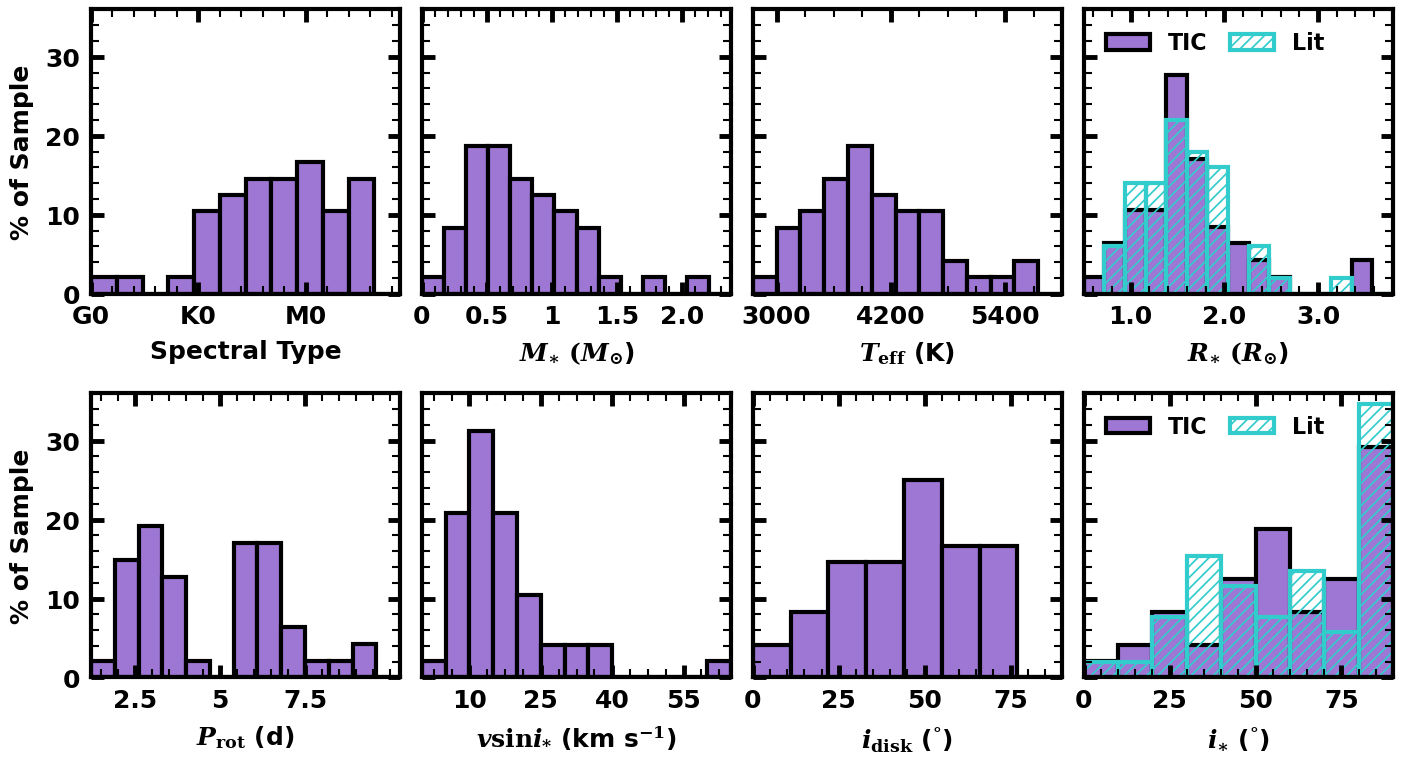

In [691]:
hist_fontsize = 18
hist_title_fontsize = 18
hist_color = '#9e77d4'  # '#ad33ff'  # '#b30059'  # '#ad33ff'  # '#958bda'  # '#669999'
hist_ylabel = r'% of Sample'
hist_linecolor = '#000000'  # '#2f0431'


hists_to_create = {'SpType': {'Title': 'SpType',
                                      'Label': 'Spectral Type',
                                      'Save Text': 'SpType',
                                      'Bin Width': 0.24,
                                      'Bin Range': [3.0, 5.75]  # [3.80, 5.65]
                                      },
                            'Mstar (Msun)': {'Title': 'Stellar Mass',
                                            'Label': r'$M_{\ast}$ $(M_{\odot}$)',
                                            'Save Text': 'Mstar_distribution_stassun_',
                                            'Bin Width': 0.17,
                                            'Bin Range': [0, 2.25]
                                            },
                            'Teff (K)': {'Title': r'Stellar $T_{\mathrm{eff}}$',
                                            'Label': r'$T_{\mathrm{eff}}$ (K)',
                                            'Save Text': 'Teff_distribution_stassun_',
                                            'Bin Width': 250,
                                            'Bin Range': [2750, 6000]  # [2750, 5250]
                                            },
                            'Rstar (Rsun)': {'Title': 'Stellar Radius',
                                            'Label': r'$R_{\ast}$ $(R_{\odot}$)',
                                            'Save Text': 'radii_distribution_stassun_',
                                            'Bin Width': 0.22,
                                            'Bin Range': [0.50, 3.80]  # [0.30, 3.60]
                                            },
                            'Prot (d)': {'Title': 'Rotation Period',
                                        'Label': r'$P_{\mathrm{rot}}$ (d)',
                                        'Save Text': 'Prot_distribution_stassun_',
                                        'Bin Width': 0.70,
                                        'Bin Range': [1.2, 9.8]
                                        },
                            'vsini (km/s)': {'Title': r'Stellar $v\mathrm{sin}i_{*}$',
                                            'Label': r'$v\mathrm{sin}i_{*}$ (km s$^{-1}$)',
                                            'Save Text': 'vsini_distribution_stassun_',
                                            'Bin Width': 5,
                                            'Bin Range': [0, 64]  # [3, 38]
                                            },
                            'i disk (deg)': {'Title': 'Disk Incl',
                                               'Label': r'$i_{\mathrm{disk}}$ ($^\degree$)',
                                               'Save Text': 'iDisk_distribution_stassun_',
                                               'Bin Width': 11,
                                               'Bin Range': [0, 90]
                                               },
                            'i star (deg)': {'Title': 'Stellar Incl',
                                            'Label': r'$i_{\ast}$ ($^\degree$)',
                                            'Save Text': 'iStar_distribution_stassun_',
                                            'Bin Width': 10,
                                            'Bin Range': [0, 90]
                                            },
                           }

grid_width = 4
grid_height = 2

ymin, ymax = 0, 36  # 14  # 1.15*max(bin_vals)

fig_width = 14
fig_height = 8

fig = plt.figure(figsize=(fig_width, fig_height))
cell_width_ratios = [1, 1, 1, 1]
gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=cell_width_ratios)
# gs = gridspec.GridSpec(grid_height , grid_width , width_ratios=[1, 1, 1, 1])
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height ) for jj in range(grid_width )]
ax_keys = list(hists_to_create.keys())

plot_lit_flag = False

for ax_i, ax in enumerate(axes):

    ax.minorticks_on()

    bin_width = hists_to_create[ax_keys[ax_i]]['Bin Width']
    hist_bins = np.arange(hists_to_create[ax_keys[ax_i]]['Bin Range'][0], hists_to_create[ax_keys[ax_i]]['Bin Range'][1] + bin_width, bin_width)
    bin_vals_stassun, bin_edges = np.histogram(df_adopted[ax_keys[ax_i]].values, bins=hist_bins)
    bin_vals_percent_stassun = (bin_vals_stassun / sum(bin_vals_stassun))*100

    ax.set_xlabel(hists_to_create[ax_keys[ax_i]]['Label'], fontsize=hist_fontsize, labelpad=8)
    if np.mod(ax_i, grid_width ) == 0:
        ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize, labelpad=8)
        ytick_diff = 10
        ytickvals = [int(ytickval) for ytickval in np.arange(ymin, ymax + ytick_diff, ytick_diff)]
        ax.set_yticks(ytickvals)
        ax.set_yticklabels(ytickvals, fontsize=hist_fontsize)
    else:
        ax.set_yticklabels([])

    ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_percent_stassun, edgecolor=hist_linecolor, color=hist_color, lw=3, width=bin_width, align='center', label='TIC')

    if ((ax_keys[ax_i] == 'Rstar (Rsun)') or (ax_keys[ax_i] == 'i star (deg)')) and (skip_no_stassun != True):
        mpl.rcParams['hatch.linewidth'] = 1.25
        bin_vals_lit, bin_edges = np.histogram(df_no_stassun[ax_keys[ax_i]].values, bins=hist_bins)
        bin_vals_percent_lit = (bin_vals_lit / sum(bin_vals_lit)) * 100
        ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_percent_lit, hatch='///', edgecolor='#33cccc', color='None', lw=3, width=bin_width, align='center', label='Lit')
        ax.legend(loc='upper left', prop={'size': hist_fontsize-2}, ncol=2)  # , bbox_to_anchor=(0., 0.5, 0.5, 0.35))
        plot_lit_flag = True
        
    if (ax_keys[ax_i] == 'i disk (deg)') or (ax_keys[ax_i] == 'i star (deg)'):
        xmin, xmax = 0, 90
    else:
        xmin, xmax = min(hist_bins), max(hist_bins)


    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)


    if ax_keys[ax_i] == 'SpType':
        sptype_designations = {'3.00': 'G0',
                               '3.25': 'G2.5',
                               '3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,1) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'Mstar (Msun)':
        xtickvals = [0, 0.5, 1, 1.5, 2.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'Rstar (Rsun)':
        xtickvals = [1.0, 2.0, 3.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'Prot (d)':
        xtickvals = [2.5, 5, 7.5]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if (ax_keys[ax_i] == 'i disk (deg)') or (ax_keys[ax_i] == 'i star (deg)'):
        # xtickvals = [0, 30, 60]
        xtickvals = [0, 25, 50, 75]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)
        

    if ax_keys[ax_i] == 'vsini (km/s)':
        # xtickvals = [0, 15, 30, 45, 60]
        xtickvals = [10, 25, 40, 55]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if ax_keys[ax_i] == 'Teff (K)':
        xtickvals = [3000, 4200, 5400]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)




    ax.tick_params(which='minor', length=6, width=1.5, labelsize=hist_fontsize)
    ax.tick_params(which='major', length=9, width=3.5, labelsize=hist_fontsize, pad=8)

    ax.set_rasterized(True)


# fig.subplots_adjust(left=0.07, bottom=0.12, right=0.99, top=0.93, wspace=0.08, hspace=0.50)
fig.subplots_adjust(left=0.06, bottom=0.11, right=0.99, top=0.945, wspace=0.07, hspace=0.35)

if plot_lit_flag == False:
    save_hist_string = 'Histograms_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.pdf'
else:
    save_hist_string = 'Histograms_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_all_' + date_str + '.pdf'

if plot_transparent == True:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=True)
else:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=False)

plt.show()
plt.close()


In [692]:
def truncate_and_normalize(convolution, original_x_array, normalize=False):
    """
    Truncate and normalize the convolution of two probability distributions and
    return the corresponding x-array.

    :param convolution: The convolution result array.
    :param original_x_array: The original x-values array.
    :return: A tuple containing the truncated and normalized convolution array and the corresponding x-array.
    """
    # Determine the spacing between x values (dx)
    dx = np.mean(np.diff(original_x_array))

    # Extend the original x-array to match the convolution range
    extended_x_min = original_x_array[0] - (len(convolution) - len(original_x_array)) / 2 * dx
    extended_x_max = original_x_array[-1] + (len(convolution) - len(original_x_array)) / 2 * dx
    extended_x_array = np.arange(extended_x_min, extended_x_max, dx)

    # Ensure extended array is not longer than the convolution array
    extended_x_array = extended_x_array[:len(convolution)]

    # Find indices where the extended x-array overlaps with the original x-array range
    indices = np.where((extended_x_array >= original_x_array[0]) & (extended_x_array <= original_x_array[-1]))[0]
    truncated_convolution = convolution[indices[0]:indices[-1] + 1]

     # Normalize the truncated convolution
    normalized_convolution = truncated_convolution / (np.sum(truncated_convolution) * dx)

    adjusted_x_array = extended_x_array[indices[0]:indices[-1] + 1]

    if normalize == False:
        return_convolution = truncated_convolution
    else:
        return_convolution = normalized_convolution

    return return_convolution, adjusted_x_array


# Master Disks Test

In [713]:
do_master_disks_test = True

if do_master_disks_test == True:

    include_adopted = True

    isotropic_istar = False
    isotropic_idisk = False

    # sheet_url_master = "https://docs.google.com/spreadsheets/d/19Wa_KgpvAL3Q-MRHXNBcCTL4dyktYm7SpwE450Y6le0/edit#gid=0"   # high res only
    sheet_url_master = "https://docs.google.com/spreadsheets/d/14KqJD0Z7zNzopTO508dW-N3a2phdgGq-DFveDP6Eo5s/edit#gid=0"   # all 
    url_1_master = sheet_url_master.replace('/edit#gid=', '/export?format=csv&gid=')
    raw_df_master = pd.read_csv(url_1_master)

    raw_df_master =  raw_df_master[pd.isnull(raw_df_master['i disk (deg)']) == False]

    idisk_master1 = raw_df_master['i disk (deg)'].values
    idisk_master_err1 = raw_df_master['i disk Unc'].values

    idisk_uncertainty_limit = 6


    # idisk_master_err1 = idisk_master_err1[np.isnan(idisk_master1) == False]
    # idisk_master1 = idisk_master1[np.isnan(idisk_master1) == False]

    iDisks_master = []
    iDisks_err_master = []

    for disk_i, disk_err in enumerate(idisk_master_err1):
        if ',' in disk_err:
            disk_err_split = disk_err.split(',')
            disk_lo = idisk_master1[disk_i] - float(disk_err_split[0])
            disk_hi = idisk_master1[disk_i] + float(disk_err_split[1])
        else:
            disk_lo = idisk_master1[disk_i] - float(disk_err)
            disk_hi = idisk_master1[disk_i] + float(disk_err)
        disk_mean_symmetric = np.mean([disk_lo, disk_hi])
        disk_err_symmetric = np.abs(disk_mean_symmetric - disk_lo)
        iDisks_master.append(disk_mean_symmetric)
        iDisks_err_master.append(disk_err_symmetric)

    raw_df_master['i disk symmetric'] = iDisks_master
    raw_df_master['i disk symmetric Unc'] = iDisks_err_master


    raw_df_master = raw_df_master[raw_df_master['i disk symmetric Unc'] <= idisk_uncertainty_limit]

    idisk_master = np.concatenate((df_adopted['i disk (deg)'].values, raw_df_master['i disk symmetric'].values))
    idisk_master_err = np.concatenate((df_adopted['i disk Unc'].values, raw_df_master['i disk symmetric Unc'].values))
    # idisk_master = raw_df_master['i disk symmetric'].values
    # idisk_master_err = raw_df_master['i disk symmetric Unc'].values

    iDisks_targets_master = raw_df_master['Target']

    idisk_targets = np.concatenate((df_adopted['Simbad Name'].values, iDisks_targets_master))
    # idisk_targets = iDisks_targets_master

    print(len(df_adopted['i disk (deg)'].values))
    print(len(df_adopted['i disk Unc'].values))
    print(len(iDisks_master))
    print(len(iDisks_err_master))
    print(len(idisk_master))
    print(len(idisk_master_err))
    print(len(idisk_targets))

    print('Number of Disks In Master Population: ', len(idisk_master), '\n')


    # mean_Deltai = (df_adopted['disk diff +Unc'].values + df_adopted['disk diff -Unc'].values) / 2.
    # deviation_Deltai = abs(df_adopted['disk diff +Unc'].values - mean_Deltai)
    # band_width = np.mean(deviation_Deltai)  # iDisk_filtered_bandwidth

    bandwidth = 7.0

    bandwidth_master = bandwidth
    bandwidth_filtered = bandwidth
    bandwidth_istars = bandwidth
    

    # bandwidth_master = np.mean(idisk_master_err) # 8
    print('idisk master Bandwidth = ', bandwidth_master)

    # bandwidth_filtered = np.mean(df_adopted['i disk Unc'].values) # 8
    print('idisk adopted Bandwidth = ', bandwidth_filtered)

    # bandwidth_istars = np.mean(df_adopted['i star -Unc'].values)  # 4.8
    # mean_istar = (df_adopted['i star +Unc'].values + df_adopted['i star -Unc'].values) / 2.
    # deviation_istar = abs(df_adopted['i star +Unc'].values - mean_istar)
    # bandwidth_istars = np.mean(deviation_istar)  # 4.8
    print('istar Bandwidth = ', bandwidth_istars)

    # bandwidth_master = bandwidth
    # bandwidth_filtered = bandwidth
    # bandwidth_istars = bandwidth

48
48
178
178
126
126
126
Number of Disks In Master Population:  126 

idisk master Bandwidth =  7.0
idisk adopted Bandwidth =  7.0
istar Bandwidth =  7.0


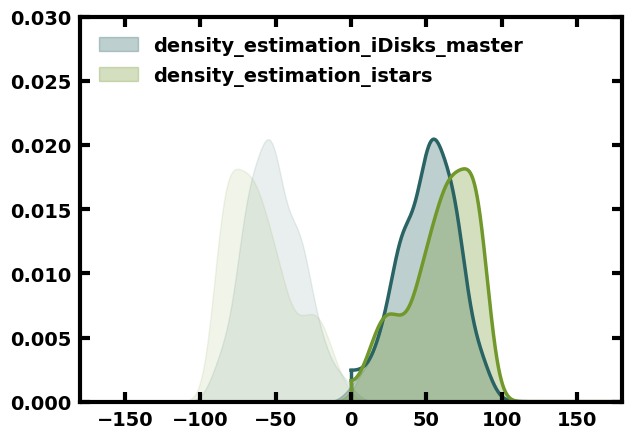

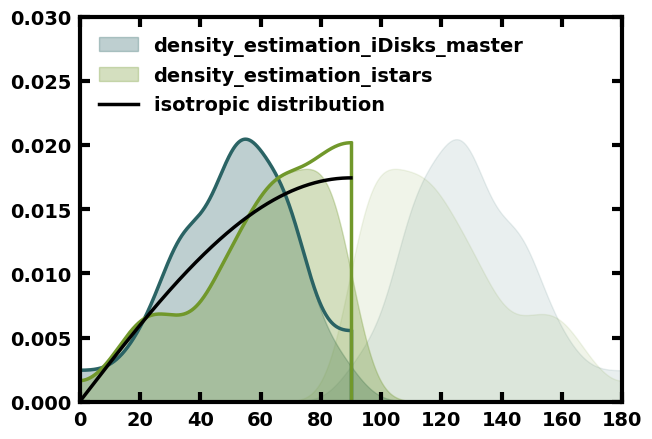

In [714]:
if do_master_disks_test == True:

    kde_n_draws = int(2e1)

    Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
    x_grid_increment = np.diff(Posteriors['i (deg)'].values)[0]

    # x_grid_increment = 0.5
    x_grid_values = np.arange(0, 180 + x_grid_increment, x_grid_increment)
    x_grid = x_grid_values.reshape(-1, 1)
    reverse_x_grid_values = -x_grid_values[::-1][:-1]
    all_x_grid_values = np.concatenate((np.array(reverse_x_grid_values), np.array(x_grid_values)))
    x_grid_all = np.array(all_x_grid_values).reshape(-1, 1)

    kde_color_master = '#666699'
    kde_color_filtered = hist_color
    kde_color_istars = '#ff527d'


    # mean_istar = (df_adopted['i star +Unc'].values + df_adopted['i star -Unc'].values) / 2.
    # deviation_istar = abs(df_adopted['i star +Unc'].values - mean_istar)
    # bandwidth_istars = np.mean(deviation_istar)  # iDisk_filtered_bandwidth
    # print('istar Bandwidth = ', bandwidth_istars)

    # ------------------ DETERMINE X_GRID ------------------ #
    Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
    # print(Posteriors.columns)
    x_grid_increment = np.diff(Posteriors['i (deg)'].values)[0]
    x_grid_values = np.arange(0, 180 + x_grid_increment, x_grid_increment)
    x_grid = x_grid_values.reshape(-1, 1)
    reverse_x_grid_values = -x_grid_values[::-1][:-1]
    all_x_grid_values = np.concatenate((np.array(reverse_x_grid_values), np.array(x_grid_values)))
    x_grid_draws = x_grid_all[(all_x_grid_values >= 0) & (all_x_grid_values <= 90)]
    x_grid_all = np.array(all_x_grid_values).reshape(-1, 1)
    
    istar_err_ratio = []
    iDisk_filtered_errs = []
    
    
    # ------------------ DRAW FROM POSTERIORS ------------------ #
    data_for_kde_iDisks_master = [] 
    data_for_kde_iDisks_filtered = []
    data_for_kde_istars = []
    did_plot = 0
    for targetnum in range(len(idisk_targets)):
        # print(iDisks_targets_master[targetnum])
        i_disk_dist = norm.pdf(x=x_grid_draws, loc=idisk_master[targetnum], scale=idisk_master_err[targetnum])
        disk_draws = choices(x_grid_draws, i_disk_dist, k=kde_n_draws)
        data_for_kde_iDisks_master.extend(disk_draws)   

    for targetnum in range(len(df_adopted['Simbad Name'].values)):

        target_str = df_adopted['Simbad Name'].values[targetnum].replace(' ', '')
        if '/' in idisk_targets[targetnum]:
            target_str = target_str.replace('/', '-')

        Posteriors = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
        iDisk_filtered_errs.append(Posteriors['i Disk +Unc1'].values[0])
        istar_err_ratio.append(np.nanmean([Posteriors['i Star +Unc1'].values[0], Posteriors['i Star -Unc1'].values[0]]))

        P_Delta_i_target_filtered = np.array(Posteriors['P(i Disk | d)'].values)
        P_istar_target = np.array(Posteriors['P(i Star | d)'].values)
        if include_adopted == True:
            data_for_kde_iDisks_master.extend(choices(x_grid_draws, P_Delta_i_target_filtered, k=kde_n_draws))
        data_for_kde_iDisks_filtered.extend(choices(x_grid_draws, P_Delta_i_target_filtered, k=kde_n_draws))
        data_for_kde_istars.extend(choices(x_grid_draws, P_istar_target, k=kde_n_draws))

    data_for_kde_iDisks_master = np.array(data_for_kde_iDisks_master).reshape(-1, 1)
    data_for_kde_iDisks_filtered = np.array(data_for_kde_iDisks_filtered).reshape(-1, 1)
    data_for_kde_istars = np.array(data_for_kde_istars).reshape(-1, 1)

    # iDisk_master_err_ratio = iDisks_err_master

    # bandwidth_master = 4 * np.nanmedian(iDisk_master_err_ratio)
    # bandwidth_filtered = bandwidth_master
    # bandwidth_istars = bandwidth_master



    # -------------------------- PERFORM KDE -------------------------- #
    kde_iDisks_master = KernelDensity(kernel='gaussian', bandwidth=bandwidth_master).fit(data_for_kde_iDisks_master)
    kde_iDisks_filtered = KernelDensity(kernel='gaussian', bandwidth=bandwidth_filtered).fit(data_for_kde_iDisks_filtered)
    kde_istars = KernelDensity(kernel='gaussian', bandwidth=bandwidth_istars).fit(data_for_kde_istars)


    log_density_iDisks_master = kde_iDisks_master.score_samples(x_grid_all)
    log_density_iDisks_filtered = kde_iDisks_filtered.score_samples(x_grid_all)
    log_density_istars = kde_istars.score_samples(x_grid_all)

    density_estimation_iDisks_master = np.array(np.exp(log_density_iDisks_master))
    density_estimation_iDisks_filtered = np.array(np.exp(log_density_iDisks_filtered))
    density_estimation_istars = np.array(np.exp(log_density_istars))

    # plt.plot(x_grid_all, density_estimation_iDisks_master, label='density_estimation_iDisks_master')
    # plt.plot(x_grid_all, density_estimation_istars, label='density_estimation_istars')
    # plt.ylim(0, 0.03)
    # plt.xlim(min(x_grid_all), max(x_grid_all))
    # plt.legend(loc='best')
    # plt.show()



    # -------------------------- FOLD VALUES LESS THAN 0 -------------------------- #
    density_estimation_mirrored_iDisks_master_1 = density_estimation_iDisks_master[::-1]
    density_estimation_mirrored_iDisks_filtered_1 = density_estimation_iDisks_filtered[::-1]
    density_estimation_mirrored_istars_1 = density_estimation_istars[::-1]

    density_estimation_total_iDisks_master_bep = density_estimation_iDisks_master + density_estimation_mirrored_iDisks_master_1
    density_estimation_total_iDisks_filtered_bep = density_estimation_iDisks_filtered + density_estimation_mirrored_iDisks_filtered_1
    density_estimation_total_istars_bep = density_estimation_istars + density_estimation_mirrored_istars_1

    density_estimation_total_positive_x_iDisks_master_bep = density_estimation_total_iDisks_master_bep[all_x_grid_values >= 0]
    density_estimation_total_positive_x_iDisks_filtered_bep = density_estimation_total_iDisks_filtered_bep[all_x_grid_values >= 0]
    density_estimation_total_positive_x_istars_bep = density_estimation_total_istars_bep[all_x_grid_values >= 0]

    x_grid_positive = all_x_grid_values[all_x_grid_values >= 0]

    plt.fill_between(all_x_grid_values, density_estimation_iDisks_master, alpha=0.3, color='#2a6364', label='density_estimation_iDisks_master', zorder=0)
    plt.fill_between(all_x_grid_values, density_estimation_mirrored_iDisks_master_1, alpha=0.1, color='#2a6364', zorder=0)
    plt.plot(x_grid_positive, density_estimation_total_positive_x_iDisks_master_bep, color='#2a6364', alpha=1, zorder=1)
    plt.plot([x_grid_positive[0], x_grid_positive[0]], [0, density_estimation_total_positive_x_iDisks_master_bep[0]], color='#2a6364', alpha=1, zorder=1)
    plt.fill_between(all_x_grid_values, density_estimation_istars, alpha=0.3, color='#71982b', label='density_estimation_istars', zorder=0)
    plt.fill_between(all_x_grid_values, density_estimation_mirrored_istars_1, alpha=0.1, color='#71982b', zorder=0)
    plt.plot(x_grid_positive, density_estimation_total_positive_x_istars_bep, color='#71982b', alpha=1, zorder=1)
    plt.plot([x_grid_positive[0], x_grid_positive[0]], [0, density_estimation_total_positive_x_istars_bep[0]], color='#71982b', alpha=1, zorder=1)
    plt.ylim(0, 0.03)
    plt.xlim(min(all_x_grid_values), max(all_x_grid_values))
    plt.legend(loc='upper left')
    plt.show()
    plt.close()



    # -------------------------- FOLD VALUES GREATER THAN 90 -------------------------- #
    density_estimation_mirrored_iDisks_master_2 = density_estimation_total_positive_x_iDisks_master_bep[::-1]
    density_estimation_mirrored_iDisks_filtered_2 = density_estimation_total_positive_x_iDisks_filtered_bep[::-1]
    density_estimation_mirrored_istars_2 = density_estimation_total_positive_x_istars_bep[::-1]

    density_estimation_total_iDisks_master = density_estimation_total_positive_x_iDisks_master_bep + density_estimation_mirrored_iDisks_master_2
    density_estimation_total_iDisks_filtered = density_estimation_total_positive_x_iDisks_filtered_bep + density_estimation_mirrored_iDisks_filtered_2
    density_estimation_total_iDisks_istars = density_estimation_total_positive_x_istars_bep + density_estimation_mirrored_istars_2

    density_estimation_total_positive_x_iDisks_master = density_estimation_total_iDisks_master[x_grid_positive <= 90]
    density_estimation_total_positive_x_iDisks_filtered = density_estimation_total_iDisks_filtered[x_grid_positive <= 90]
    density_estimation_total_positive_x_istars = density_estimation_total_iDisks_istars[x_grid_positive <= 90]

    x_grid_plot = x_grid_positive[x_grid_positive <= 90]

    isotropic_istar_distribution = np.sin(np.radians(x_grid_plot))
    isotropic_istar_distribution = isotropic_istar_distribution/(sum(isotropic_istar_distribution) * np.diff(x_grid_plot)[0])

    isotropic_idisk_distribution = np.sin(np.radians(x_grid_plot))
    isotropic_idisk_distribution = isotropic_idisk_distribution/(sum(isotropic_idisk_distribution) * np.diff(x_grid_plot)[0])

    plt.fill_between(x_grid_positive, density_estimation_total_positive_x_iDisks_master_bep, alpha=0.3, color='#2a6364', label='density_estimation_iDisks_master', zorder=0)
    plt.fill_between(x_grid_positive, density_estimation_mirrored_iDisks_master_2, alpha=0.1, color='#2a6364', zorder=0)
    plt.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_master, color='#2a6364', alpha=1, zorder=1)
    plt.plot([x_grid_plot[-1], x_grid_plot[-1]], [0, density_estimation_total_positive_x_iDisks_master[-1]], color='#2a6364', alpha=1, zorder=1)
    plt.fill_between(x_grid_positive, density_estimation_total_positive_x_istars_bep, alpha=0.3, color='#71982b', label='density_estimation_istars', zorder=0)
    plt.fill_between(x_grid_positive, density_estimation_mirrored_istars_2, alpha=0.1, color='#71982b', zorder=0)
    plt.plot(x_grid_plot, density_estimation_total_positive_x_istars, color='#71982b', alpha=1, zorder=1)
    plt.plot([x_grid_plot[-1], x_grid_plot[-1]], [0, density_estimation_total_positive_x_istars[-1]], color='#71982b', alpha=1, zorder=1)
    plt.plot(x_grid_plot, isotropic_istar_distribution, color='#000000', alpha=1, zorder=2, label='isotropic distribution')
    plt.ylim(0, 0.03)
    plt.xlim(min(x_grid_positive), max(x_grid_positive))
    plt.legend(loc='upper left')
    plt.show()
    plt.close()




In [715]:
if do_master_disks_test == True:
    # -------------------------- MULTIPLY MASTER DISKS AND FILTERED STARS -------------------------- #
    # density_estimation_total_positive_x_iDisks_master_convolved_with_istars = density_estimation_total_positive_x_iDisks_master * density_estimation_total_positive_x_istars
    if isotropic_istar == True:
        density_estimation_total_positive_x_iDisks_master_convolved_with_istars = density_estimation_total_positive_x_iDisks_master * isotropic_istar_distribution
    elif isotropic_idisk == True:
        density_estimation_total_positive_x_iDisks_master_convolved_with_istars = isotropic_idisk_distribution * density_estimation_total_positive_x_istars
    else:
        density_estimation_total_positive_x_iDisks_master_convolved_with_istars = density_estimation_total_positive_x_iDisks_master * density_estimation_total_positive_x_istars

    density_estimation_total_positive_x_iDisks_master_convolved_with_istars = density_estimation_total_positive_x_iDisks_master_convolved_with_istars / (sum(density_estimation_total_positive_x_iDisks_master_convolved_with_istars) * np.diff(all_x_grid_values)[0])



K-S Statistic: 0.32910000000000006
p-value:  0.0011351308535754682
 
Area under KDE (Trapz):  0.9995 Close enough to 1:  True





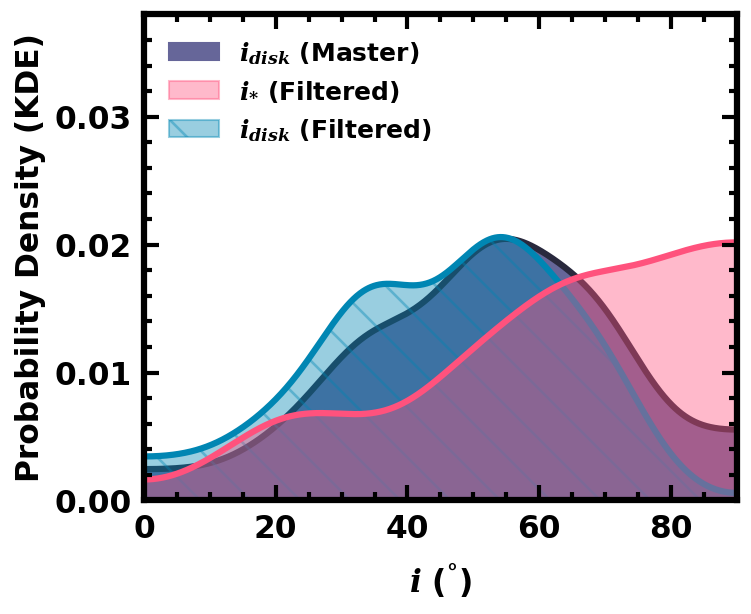

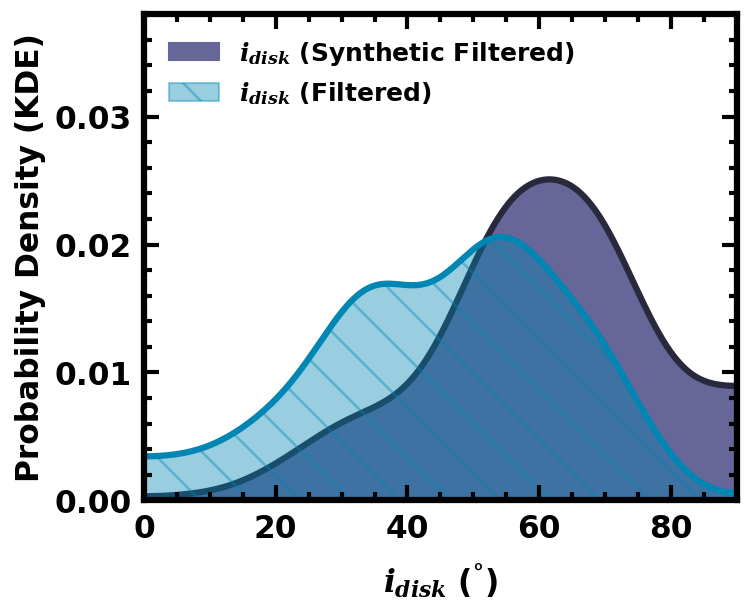

In [716]:

if do_master_disks_test == True:

    ks_n_draws = 100  # len(df_adopted))
    ks_rounds = 100
    ks_tests = []
    p_tests = []
    for round_i in range(ks_rounds):
        synthetic_iDisk_population = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, k=ks_n_draws)
        filtered_iDisk_population = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, k=ks_n_draws)
        ks_statistic, p_value = stats.ks_2samp(synthetic_iDisk_population,filtered_iDisk_population)
        ks_tests.append(ks_statistic)
        p_tests.append(p_value)

    print('K-S Statistic:', np.mean(ks_tests))
    print('p-value: ', np.mean(p_tests))
    print(' ')

    total_area_trapz = np.trapz(density_estimation_total_positive_x_iDisks_master_convolved_with_istars,  x_grid_plot)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), 'Close enough to 1: ', closeness_trapz)
    print('\n\n')




    Delta_i_hist_fontsize = 15





    fig = plt.figure(figsize=(5, 4), dpi=150)
    ax = fig.add_subplot(111)
    ax.minorticks_on()

    ax.set_xlabel(r'$i$ ($^\degree$)', fontsize=Delta_i_hist_fontsize, labelpad=8)
    ax.set_ylabel('Probability Density (KDE)', fontsize=Delta_i_hist_fontsize)

    ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_master, color=kde_color_master, label=r'$i_{disk}$ (Master)', alpha=1, zorder=-2)
    ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_master, color='#29293d', lw=3, zorder=-2)
    if isotropic_istar == True:
        ax.fill_between(x_grid_plot, isotropic_istar_distribution, color=kde_color_istars, label=r'$i_{*}$ (isotropic)', alpha=0.4, zorder=0)
        ax.plot(x_grid_plot, isotropic_istar_distribution, color=kde_color_istars, lw=3, zorder=-0)
    else:
        ax.fill_between(x_grid_plot, density_estimation_total_positive_x_istars, color=kde_color_istars, label=r'$i_{*}$ (Filtered)', alpha=0.4, zorder=0)
        ax.plot(x_grid_plot, density_estimation_total_positive_x_istars, color=kde_color_istars, lw=3, zorder=-0)
    if isotropic_idisk == True:
        ax.fill_between(x_grid_plot, isotropic_idisk_distribution, ls='--', color='#0086b3', label=r'$i_{disk}$ (isotropic)', alpha=0.4, zorder=0)
        ax.plot(x_grid_plot, isotropic_idisk_distribution, color='#0086b3', lw=3, zorder=-0)
    else:
        ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color='#0086b3', hatch='\\', label=r'$i_{disk}$ (Filtered)', alpha=0.4, zorder=-1)
        ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color='#0086b3', lw=3, zorder=-1)

    ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
    ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

    ax.legend(loc='upper left', prop={'size': 12}, ncol=1)

    ax.set_xlim(0, 90)
    ax.set_ylim(0, 0.038)

    fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

    plt.show()
    plt.close()





    fig = plt.figure(figsize=(5, 4), dpi=150)
    ax = fig.add_subplot(111)
    ax.minorticks_on()

    ax.set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=Delta_i_hist_fontsize, labelpad=8)
    ax.set_ylabel('Probability Density (KDE)', fontsize=Delta_i_hist_fontsize)

    ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, color=kde_color_master, label=r'$i_{disk}$ (Synthetic Filtered)', alpha=1, zorder=-2)
    ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, color='#29293d', lw=3, zorder=-2)
    ax.fill_between(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color='#0086b3', hatch='\\', label=r'$i_{disk}$ (Filtered)', alpha=0.4, zorder=-1)
    ax.plot(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, color='#0086b3', lw=3, zorder=-1)

    ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
    ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

    ax.legend(loc='upper left', prop={'size': 12}, ncol=1)

    ax.set_xlim(0, 90)
    ax.set_ylim(0, 0.038)

    fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

    plt.show()
    plt.close()

In [725]:
if do_master_disks_test == True:

    n_draws = int(5e6)  # int(1e7)
    i_disk_rand_from_kde_adopted = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_filtered, k=n_draws)
    i_disk_rand_from_kde_master = choices(x_grid_plot, density_estimation_total_positive_x_iDisks_master_convolved_with_istars, k=n_draws)
    i_star_rand_from_kde = choices(x_grid_plot, density_estimation_total_positive_x_istars, k=n_draws)
    i_diff_rand_from_kde_adopted = abs(np.array(i_disk_rand_from_kde_adopted) - i_star_rand_from_kde)
    i_diff_rand_from_kde_master = abs(np.array(i_disk_rand_from_kde_master) - i_star_rand_from_kde)


    new_x_bins = np.concatenate((x_grid_plot, [x_grid_plot[-1] + np.diff(x_grid_plot)[0]]))
    i_diff_rand_from_kde_adopted_hist, _ = np.histogram(i_diff_rand_from_kde_adopted, bins=new_x_bins)  # , density=True)
    i_diff_rand_from_kde_master_hist, _ = np.histogram(i_diff_rand_from_kde_master, bins=new_x_bins)  # , density=True)



    # smooth_over_deg = 1.  #  bandwidth_master
    # smooth_over_points = int(smooth_over_deg/np.diff(x_grid_plot)[0])
    # if np.mod(smooth_over_points,2) != 0:
    #     smooth_over_points += 1
    # smooth_i_diff_rand_from_kde_adopted_hist = gaussian_filter1d(i_diff_rand_from_kde_adopted_hist, smooth_over_points)  # , mode='nearest')
    # i_diff_dist_from_kde_adopted = smooth_i_diff_rand_from_kde_adopted_hist/ (sum(smooth_i_diff_rand_from_kde_adopted_hist) * np.diff(x_grid_plot)[0])
    # smooth_i_diff_rand_from_kde_master_hist = gaussian_filter1d(i_diff_rand_from_kde_master_hist, smooth_over_points)  # , mode='nearest')
    # i_diff_dist_from_kde_master = smooth_i_diff_rand_from_kde_master_hist/ (sum(smooth_i_diff_rand_from_kde_master_hist) * np.diff(x_grid_plot)[0])



    total_area_trapz = np.trapz(i_diff_dist_from_kde_adopted,  x_grid_plot)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), 'Close enough to 1: ', closeness_trapz)

    print('\ndx = ', np.diff(x_grid_plot)[0])

Area under KDE (Trapz):  0.9989 Close enough to 1:  True

dx =  0.1


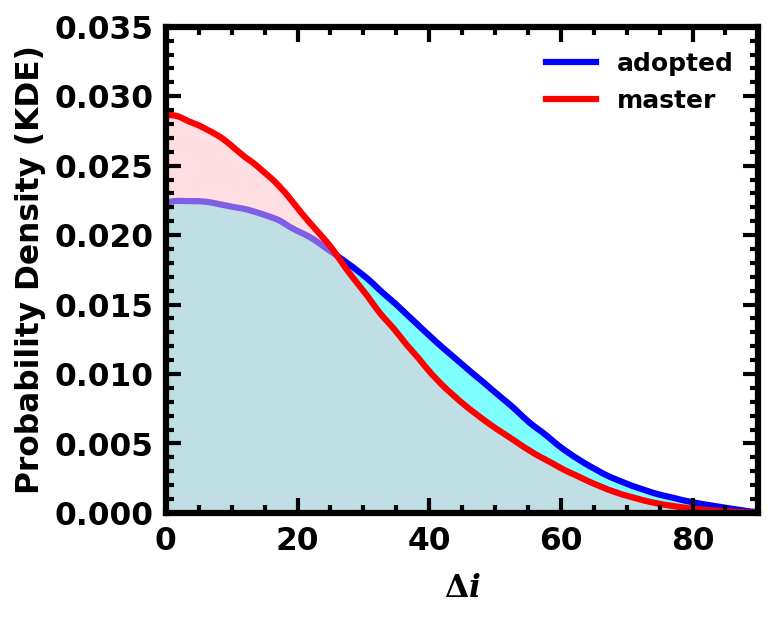

In [726]:
if do_master_disks_test == True:
    fig = plt.figure(figsize=(5, 4), dpi=150)
    ax = fig.add_subplot(111)
    ax.minorticks_on()

    ax.set_xlabel(r'$\Delta i$', fontsize=Delta_i_hist_fontsize, labelpad=8)
    ax.set_ylabel('Probability Density (KDE)', fontsize=Delta_i_hist_fontsize)

    ax.fill_between(x_grid_plot, i_diff_dist_from_kde_adopted, color='cyan', alpha=0.5, zorder=-2)
    ax.plot(x_grid_plot, i_diff_dist_from_kde_adopted, color='blue', lw=3, label='adopted', zorder=-2)

    ax.fill_between(x_grid_plot, i_diff_dist_from_kde_master, color='pink', alpha=0.5, zorder=-2)
    ax.plot(x_grid_plot, i_diff_dist_from_kde_master, color='red', lw=3, label='master', zorder=-2)

    ax.tick_params(which='minor', length=4, width=2, labelsize=Delta_i_hist_fontsize)
    ax.tick_params(which='major', length=7, width=2, labelsize=Delta_i_hist_fontsize)

    ax.legend(loc='upper right', prop={'size': 12}, ncol=1)

    ax.set_xlim(0, 90)
    ax.set_ylim(0, 0.035)
    fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

    plt.show()
    plt.close()

In [727]:
df_adopted.columns

Index(['Target', 'Simbad Name', 'RA', 'DEC', 'SpType', 'SpType Unc',
       'SpType Letter', 'SpType Letter Unc', 'i disk (deg)', 'i disk Unc',
       'Rstar (Rsun)', 'Rstar Unc', 'Mstar (Msun)', 'Mstar Unc', 'Prot (d)',
       'Prot Unc', 'vsini (km/s)', 'vsini Unc', 'Teff (K)', 'Teff Unc',
       'Age (Myr)', 'Age Unc', 'Lstar (Lsun)', 'Lstar Unc', 'i star (deg)',
       'i star +Unc', 'i star -Unc', 'disk diff', 'disk diff +Unc',
       'disk diff -Unc', 'Veq', 'Veq Unc'],
      dtype='object')

# Physical vs Nonphysical Checks

In [728]:
if (skip_only_stassun != True) and (skip_no_stassun != True):

    discrepant_veq_minus_vsini_list = []
    no_TIC_available_list = []

    TIC_radii_of_discrepant_targets = []
    TIC_radii_err_of_discrepant_targets = []
    vsini_of_discrepant_targets = []
    vsini_err_of_discrepant_targets = []
    Prot_of_discrepant_targets = []
    Prot_err_of_discrepant_targets = []

    TIC_radii_of_NONdiscrepant_targets = []
    TIC_radii_err_of_NONdiscrepant_targets = []
    vsini_of_NONdiscrepant_targets = []
    vsini_err_of_NONdiscrepant_targets = []
    Prot_of_NONdiscrepant_targets = []
    Prot_err_of_NONdiscrepant_targets = []

    discrepant_dict = {'Target': [],
                    'Rstar TIC' : [],
                    'Rstar TIC Unc' : [],
                    'Rstar non-TIC' : [],
                    'Rstar non-TIC Unc' : [],
                    'Rstar TIC/non-TIC' : [],
                    'Veq' : [],
                    'Veq Unc' : [],
                    'vsini (km/s)' : [],
                    'vsini Unc' : [],
                    'Prot (d)' : [],
                    'Prot Unc' : [],
                    }
    non_discrepant_dict = {'Target': [],
                    'Rstar TIC' : [],
                    'Rstar TIC Unc' : [],
                    'Rstar non-TIC' : [],
                    'Rstar non-TIC Unc' : [],
                    'Rstar TIC/non-TIC' : [],
                    'Veq' : [],
                    'Veq Unc' : [],
                    'vsini (km/s)' : [],
                    'vsini Unc' : [],
                    'Prot (d)' : [],
                    'Prot Unc' : [],
                    }

    for target_name_i, target_name in enumerate(df_adopted['Simbad Name'].values):

        if target_name in df_stassun_only['Simbad Name'].values:

            temp_df_stassun_only = df_stassun_only[df_stassun_only['Simbad Name'] == target_name]
            temp_df_no_stassun = df_no_stassun[df_no_stassun['Simbad Name'] == target_name]
            
            veq_minus_vsini = temp_df_stassun_only['Veq'].values[0] - temp_df_stassun_only['vsini (km/s)'].values[0]
            veqs_minus_vsinis_err = np.sqrt(temp_df_stassun_only['Veq Unc'].values[0]**2 + temp_df_stassun_only['vsini Unc'].values[0]**2)


            if veq_minus_vsini + veqs_minus_vsinis_err < 0:
                discrepant_dict['Target'].append(target_name)
                discrepant_dict['Rstar TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0])
                discrepant_dict['Rstar TIC Unc'].append(temp_df_stassun_only['Rstar Unc'].values[0])
                discrepant_dict['Rstar non-TIC'].append(temp_df_no_stassun['Rstar (Rsun)'].values[0])
                discrepant_dict['Rstar non-TIC Unc'].append(temp_df_no_stassun['Rstar Unc'].values[0])
                discrepant_dict['Rstar TIC/non-TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0]/temp_df_no_stassun['Rstar (Rsun)'].values[0])
                discrepant_dict['Veq'].append(temp_df_stassun_only['Veq'].values[0])
                discrepant_dict['Veq Unc'].append(temp_df_stassun_only['Veq Unc'].values[0])
                discrepant_dict['vsini (km/s)'].append(temp_df_stassun_only['vsini (km/s)'].values[0])
                discrepant_dict['vsini Unc'].append(temp_df_stassun_only['vsini Unc'].values[0])
                discrepant_dict['Prot (d)'].append(temp_df_stassun_only['Prot (d)'].values[0])
                discrepant_dict['Prot Unc'].append(temp_df_stassun_only['Prot Unc'].values[0])
            else:
                non_discrepant_dict['Target'].append(target_name)
                non_discrepant_dict['Rstar TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0])
                non_discrepant_dict['Rstar TIC Unc'].append(temp_df_stassun_only['Rstar Unc'].values[0])
                non_discrepant_dict['Rstar non-TIC'].append(temp_df_no_stassun['Rstar (Rsun)'].values[0])
                non_discrepant_dict['Rstar non-TIC Unc'].append(temp_df_no_stassun['Rstar Unc'].values[0])
                non_discrepant_dict['Rstar TIC/non-TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0]/temp_df_no_stassun['Rstar (Rsun)'].values[0])
                non_discrepant_dict['Veq'].append(temp_df_stassun_only['Veq'].values[0])
                non_discrepant_dict['Veq Unc'].append(temp_df_stassun_only['Veq Unc'].values[0])
                non_discrepant_dict['vsini (km/s)'].append(temp_df_stassun_only['vsini (km/s)'].values[0])
                non_discrepant_dict['vsini Unc'].append(temp_df_stassun_only['vsini Unc'].values[0])
                non_discrepant_dict['Prot (d)'].append(temp_df_stassun_only['Prot (d)'].values[0])
                non_discrepant_dict['Prot Unc'].append(temp_df_stassun_only['Prot Unc'].values[0])
        else:
            no_TIC_available_list.append(target_name)

    discrepant_df = pd.DataFrame(discrepant_dict)
    non_discrepant_df = pd.DataFrame(non_discrepant_dict)
    print('Targets with discrepant veq - vsini: ')
    print(discrepant_df['Target'].values, '\n')
    print('Targets with no TIC radius available: ')
    print(no_TIC_available_list, '\n')

    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    print('Average Discrepant Rstar TIC/non-TIC: {:.3f}'.format(np.mean(discrepant_df['Rstar TIC/non-TIC'].values)))
    print('Average Non-discrepant Rstar TIC/non-TIC: {:.3f}'.format(np.mean(non_discrepant_df['Rstar TIC/non-TIC'].values)))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    discrepant_percentage_offset = 100 * (1 - np.mean(discrepant_df['Rstar TIC/non-TIC'].values))
    non_discrepant_percentage_offset = 100 * (1 - np.mean(non_discrepant_df['Rstar TIC/non-TIC'].values))
    print('The TIC radii of the stars in this subset are on average {:.1f}[percent] lower than the mean of all non-TIC radii compiled for these same stars,'.format(discrepant_percentage_offset))
    print('whereas the rest of the objects in the sample that do not yield discrepant [veq] and [vsini] values are on average only {:.1f}[percent] lower than the mean of their non-TIC counterparts.'.format(non_discrepant_percentage_offset))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    discrepant_average_period, discrepant_average_period_err = np.mean(discrepant_df['Prot (d)'].values), np.std(discrepant_df['Prot (d)'].values, ddof=1)
    non_discrepant_average_period, non_discrepant_average_period_err = np.mean(non_discrepant_df['Prot (d)'].values), np.std(non_discrepant_df['Prot (d)'].values, ddof=1)
    print('Average Discrepant Prot: {:.2f} +/- {:.2f}'.format(discrepant_average_period, discrepant_average_period_err))
    print('Average Non-discrepant Prot: {:.2f} +/- {:.2f}'.format(non_discrepant_average_period, non_discrepant_average_period_err))
    print('Average Discrepant/Non-discrepant Prot: {:.2f}'.format(discrepant_average_period/non_discrepant_average_period))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    discrepant_average_vsini, discrepant_average_vsini_err = np.mean(discrepant_df['vsini (km/s)'].values[discrepant_df['vsini Unc'].values > 0]), np.std(discrepant_df['vsini (km/s)'].values[discrepant_df['vsini Unc'].values > 0], ddof=1)
    non_discrepant_average_vsini, non_discrepant_average_vsini_err = np.mean(non_discrepant_df['vsini (km/s)'].values[non_discrepant_df['vsini Unc'].values > 0]), np.std(non_discrepant_df['vsini (km/s)'].values[non_discrepant_df['vsini Unc'].values > 0], ddof=1)
    print('Average Discrepant vsini: {:.2f} +/- {:.2f}'.format(discrepant_average_vsini, discrepant_average_vsini_err))
    print('Average Non-discrepant vsini: {:.2f} +/- {:.2f}'.format(non_discrepant_average_vsini, non_discrepant_average_vsini_err))
    print('Average Discrepant/Non-discrepant vsini: {:.2f}'.format(discrepant_average_vsini/non_discrepant_average_vsini))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')


Targets with discrepant veq - vsini: 
['2MASS J04202555+2700355' '2MASS J04360131+1726120' 'AA Tau' 'DoAr 25'
 'FT Tau' 'IQ Tau' 'MHO 6' 'Sz 73' 'T Cha' 'WSB 52'] 

Targets with no TIC radius available: 
['2MASS J04334465+2615005', 'Elias 2-24', 'WSB 63'] 

©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©
Average Discrepant Rstar TIC/non-TIC: 0.646
Average Non-discrepant Rstar TIC/non-TIC: 0.961
©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©
The TIC radii of the stars in this subset are on average 35.4[percent] lower than the mean of all non-TIC radii compiled for these same stars,
whereas the rest of the objects in the sample that do not yield discrepant [veq] and [vsini] values are on average only 3.9[percent] lower than the mean of their non-TIC counterparts.
©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©
Average Discrepant Prot: 4.73 +/- 2.70
Average Non-discrepant Prot: 4.67 +/- 2.03
Average Discrepant/Non-discrepant Prot: 1.01
©©©©©©©©©©©©©©©©©©©

# HBM Results and Computing the KDE

In [729]:
# HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-March-6/Final_HBM_Files/'
# HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-June-10/Final_HBM_Files/'
# HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-Aug-20/Final_HBM_Files/'
HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-Nov-10/Final_HBM_Files/'


Delta_i_Rayleigh_logUniformPrior_file = HBM_directory + 'Delta_inclination_rayleigh_log-uniform.h5'
Delta_i_Rayleigh_gaussianPrior_file = HBM_directory + 'Delta_inclination_rayleigh_gaussian.h5'
Delta_i_Gaussian_logUniformPrior_file = HBM_directory + 'Delta_inclination_gaussian_log-uniform.h5'
Delta_i_Gaussian_gaussianPrior_file = HBM_directory + 'Delta_inclination_gaussian_gaussian.h5'
Delta_i_Truncated_Gaussian_UniformPrior_file = HBM_directory + 'Delta_inclination_truncated_gaussian-uniform.h5'

R_lU_label = r'Rayleigh (log-U Pr)'
R_G_label = r'Rayleigh (TG Pr)'
G_lU_label = r'Gaussian (log-U Pr)'
G_G_label = r'Gaussian (TG Pr)'
TG_U_label = r'Truncated Gaussian (U Pr)'

Delta_i_HBM_files = {R_lU_label: {'File Path': Delta_i_Rayleigh_logUniformPrior_file,
                                },
                    R_G_label: {'File Path': Delta_i_Rayleigh_gaussianPrior_file,
                                },
                    G_lU_label: {'File Path': Delta_i_Gaussian_logUniformPrior_file,
                                },
                    G_G_label: {'File Path': Delta_i_Gaussian_gaussianPrior_file,
                                },
                    TG_U_label: {'File Path': Delta_i_Truncated_Gaussian_UniformPrior_file,
                                },
                    }

In [730]:
def list_datasets(hdf5_file):
    def traverse_datasets(hdf_object):
        """Traverse HDF5 structure and print datasets."""
        if isinstance(hdf_object, h5py.Dataset):
            datasets.append(hdf_object.name)

        elif isinstance(hdf_object, h5py.Group):
            for key in hdf_object:
                traverse_datasets(hdf_object[key])

    datasets = []
    with h5py.File(hdf5_file, 'r') as file:
        traverse_datasets(file)
    return datasets

all_datasets = list_datasets(Delta_i_Rayleigh_logUniformPrior_file)
all_datasets

['/mcmc/accepted', '/mcmc/chain', '/mcmc/log_prob']

(100,)
(500, 100, 2)
(500, 100)
[297. 311. 319. 293. 340. 341. 321. 300. 350. 337. 343. 320. 318. 336.
 323. 335. 315. 325. 312. 324. 329. 318. 336. 343. 330. 324. 338. 346.
 319. 325. 319. 315. 347. 304. 314. 341. 325. 306. 353. 331. 328. 343.
 303. 320. 347. 336. 333. 312. 324. 323. 332. 294. 317. 299. 321. 321.
 319. 329. 328. 317. 350. 352. 333. 312. 293. 310. 306. 336. 306. 339.
 348. 325. 328. 314. 344. 321. 335. 308. 337. 307. 328. 330. 323. 310.
 352. 358. 298. 317. 339. 339. 320. 360. 328. 321. 333. 337. 298. 339.
 310. 323.]
 


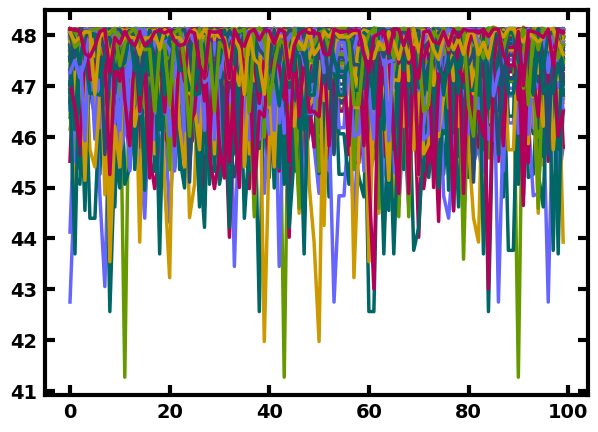

In [731]:
with h5py.File(Delta_i_Truncated_Gaussian_UniformPrior_file, 'r') as file:
    data_accepted = file['/mcmc/accepted'][()]
    data_chain = file['/mcmc/chain'][()]
    data_logprob = file['/mcmc/log_prob'][()]
    # data_mcmc = file['/mcmc']


# import scipy
# help(data_mcmc)
# data_mcmc['accepted']
print(data_accepted.shape)
print(data_chain.shape)
print(data_logprob.shape)
print(data_accepted)
print(' ')
data_accepted = [int(bep) for bep in data_accepted]
plt.plot(data_logprob[data_accepted])
plt.show()
# print(data_chain[data_accepted, :, 0][0])

In [732]:
# ------------------ DETERMINE X_GRID ------------------ #
Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
posterior_i_values = Posteriors['i (deg)'].values
x_grid = np.array(posterior_i_values).reshape(-1, 1)

reverse_posterior_i_values = -posterior_i_values[::-1][:-1]
all_posterior_i_values = np.concatenate((np.array(reverse_posterior_i_values), np.array(posterior_i_values)))
x_grid_all = np.array(all_posterior_i_values).reshape(-1, 1)

x_grid_plot = np.copy(posterior_i_values)
ivals = np.arange(0, 90 + 0.1, 0.1)
x_model = ivals/90.

HBM_Samples = {}

for HBM_key in list(Delta_i_HBM_files.keys()):
    print(HBM_key)
    
    with h5py.File(Delta_i_HBM_files[HBM_key]['File Path'], 'r') as file:
        data_accepted = file['/mcmc/accepted'][()]
        data_chain = file['/mcmc/chain'][()]
        data_logprob = file['/mcmc/log_prob'][()]
    
    data_accepted = [int(bep) for bep in data_accepted]

    accepted_models = []

    if 'Rayleigh ' in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        accepted_chains = data_chain[data_accepted, :, 0]
        for chain_i in range(len(accepted_chains)):
            R_mean_par_1 = np.mean(accepted_chains[chain_i])
            model_profile = x_model/(np.mean(accepted_chains[chain_i])**2) * np.exp((-x_model**2)/(2*np.mean(accepted_chains[chain_i])**2))
            model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
            for beep_i in range(len(model_profile)):
                accepted_models.append(model_profile)

    # if 'Gaussian ' in HBM_key:
    #     print('Data Chain Shape: ', data_chain.shape)
    #     accepted_chains_mu = data_chain[data_accepted, :, 0]
    #     accepted_chains_sigma = data_chain[data_accepted, :, 1]
    #     for chain_j in range(len(accepted_chains_mu)):
    #         model_profile = norm.pdf(x=x_model, loc=np.mean(accepted_chains_mu[chain_j]), scale=np.mean(accepted_chains_sigma[chain_j]))
    #         model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
    #         for beep_i in range(len(model_profile)):
    #             accepted_models.append(model_profile)


    if 'Gaussian ' in HBM_key and 'Truncated' not in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        random_chains_mu = data_chain[data_accepted, :, 0]
        random_chains_sigma = data_chain[data_accepted, :, 1]
        for chain_j in range(len(random_chains_mu)):
            random_draw_mu = np.mean(random_chains_mu[chain_j])
            random_draw_sigma = np.mean(random_chains_sigma[chain_j])
            model_profile = norm.pdf(x=x_model, loc=random_draw_mu, scale=random_draw_sigma)
            model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
            accepted_models.append(model_profile)


    if 'Gaussian ' in HBM_key and 'Truncated' in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        random_chains_mu = data_chain[data_accepted, :, 0]
        print(random_chains_mu)
        random_chains_sigma = data_chain[data_accepted, :, 1]
        print(random_chains_sigma)
        for chain_j in range(len(random_chains_mu)):
            # random_draw_mu = np.mean(random_chains_mu[chain_j])
            # random_draw_sigma = np.mean(random_chains_sigma[chain_j])
            random_draw_mu = -615
            random_draw_sigma = 9.5
            # mu = -615
            # sigma = 9.5
            lower_bound =( 0 - random_draw_mu ) / random_draw_sigma
            upper_bound = (1 - random_draw_mu ) / random_draw_sigma
            model_profile = truncnorm.pdf(x=x_model, a=lower_bound, b=upper_bound, loc=random_draw_mu, scale=random_draw_sigma)
            model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
            accepted_models.append(model_profile)

    # rayleighs_transposed = np.transpose(accepted_models)
    # mean_profile = []
    # profile_16 = []
    # profile_84 = []
    # for ral_i in range(len(rayleighs_transposed)):
    #     mean_profile.append(np.mean(rayleighs_transposed[ral_i]))
    #     profile_16.append(np.percentile(rayleighs_transposed[ral_i], 16))
    #     profile_84.append(np.percentile(rayleighs_transposed[ral_i], 84))

    profile_16 = np.percentile(accepted_models, 16, axis=0)
    mean_profile = np.percentile(accepted_models, 50, axis=0)
    profile_84 = np.percentile(accepted_models, 84, axis=0)
    
    Delta_i_HBM_files[HBM_key]['Model Profile'] = mean_profile
    Delta_i_HBM_files[HBM_key]['Model Profile 16'] = profile_16
    Delta_i_HBM_files[HBM_key]['Model Profile 84'] = profile_84

    if 'lU Prior' in HBM_key:
        model_linestyle = '-'
    if 'G Prior' in HBM_key:
        model_linestyle = '--'

    # plt.plot(ivals, mean_profile, linestyle=model_linestyle, label=HBM_key + ' Mean')
    # plt.plot(ivals, profile_16, linestyle=model_linestyle, label=HBM_key + ' 16%')
    # plt.plot(ivals, profile_84, linestyle=model_linestyle, label=HBM_key + ' 84%')
    # plt.legend(loc='upper right')
    # plt.show()

    total_area_trapz = np.trapz(mean_profile, ivals)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), 'Close enough to 1: ', closeness_trapz)

# plt.legend(loc='upper right')
# plt.show()

Rayleigh (log-U Pr)
Data Chain Shape:  (60000, 80, 1)
Area under KDE (Trapz):  1.0 Close enough to 1:  True
Rayleigh (TG Pr)
Data Chain Shape:  (60000, 80, 1)
Area under KDE (Trapz):  1.0 Close enough to 1:  True
Gaussian (log-U Pr)
Data Chain Shape:  (60000, 80, 2)
Area under KDE (Trapz):  0.9985 Close enough to 1:  True
Gaussian (TG Pr)
Data Chain Shape:  (30000, 80, 2)
Area under KDE (Trapz):  0.9998 Close enough to 1:  True
Truncated Gaussian (U Pr)
Data Chain Shape:  (500, 100, 2)
[[-878.36232012 -165.86262632 -311.03174187 ... -399.32849736
  -930.43145396 -960.93887371]
 [-253.54893887 -267.83457771 -246.26976247 ... -577.96816813
  -898.36564747 -943.74738113]
 [-436.30433254  -55.05049942 -394.59589448 ... -475.45036849
  -940.93783552 -883.29408223]
 ...
 [-810.56827398 -159.92079483 -939.80360196 ... -416.49644174
  -246.88764368 -888.47354998]
 [-253.54893887 -217.37397479 -246.26976247 ... -568.07650321
  -898.36564747 -943.74738113]
 [-255.71463826  -55.05049942 -386.2046

In [733]:
# ------------------ DETERMINE X_GRID ------------------ #
Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
posterior_i_values = Posteriors['i (deg)'].values
x_grid = np.array(posterior_i_values).reshape(-1, 1)

reverse_posterior_i_values = -posterior_i_values[::-1][:-1]
all_posterior_i_values = np.concatenate((np.array(reverse_posterior_i_values), np.array(posterior_i_values)))
x_grid_all = np.array(all_posterior_i_values).reshape(-1, 1)

x_grid_plot = np.copy(posterior_i_values)



compute_new_KDE = True
KDE_filepath_stassun = primordial_disks_sample_directory + 'KDE_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_' + date_str + '.csv'
KDE_filepath_all = primordial_disks_sample_directory + 'KDE_' + resolution_text + '_' + Rshift_text + '_' + Pshift_text + '_all_' + date_str + '.csv'
band_width_MAPs = 5.2

do_mirror = True

# iDisk_filtered_bandwidth = round(2 * np.median(iDisk_filtered_errs), 2)

track_posteriors = []

if compute_new_KDE == True:

    kde_n_draws = int(5e2)
    do_scotts_rule = False

    # ------------------ COMPUTE KDE FROM DRAWS ------------------ #
    data_for_kde = []
    for targetnum in range(len(df_adopted['Simbad Name'].values)):

        target_str = df_adopted['Simbad Name'].values[targetnum].replace(' ', '')
        # target_str = df_adopted.loc[targetnum, 'Simbad Name'].replace(' ', '')
        if '/' in df_adopted['Simbad Name'].values[targetnum]:
            target_str = target_str.replace('/', '-')

        Posteriors = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
        P_Delta_i_target = np.array(Posteriors['P(Delta i | d)'].values)

        track_posteriors.append(P_Delta_i_target)

        data_for_kde.extend(choices(posterior_i_values, P_Delta_i_target, k=kde_n_draws))
        
    data_for_kde_MAPs = np.array(df_adopted['disk diff'].values).reshape(-1, 1)


    mean_Deltai = (df_adopted['disk diff +Unc'].values + df_adopted['disk diff -Unc'].values) / 2.
    deviation_Deltai = abs(df_adopted['disk diff +Unc'].values - mean_Deltai)
    band_width = np.mean(deviation_Deltai)  # iDisk_filtered_bandwidth
    print('KDE Bandwidth = ', band_width)

    data_for_kde = np.array(data_for_kde).reshape(-1, 1)

    kde = KernelDensity(kernel='gaussian', bandwidth=band_width).fit(data_for_kde)
    kde_MAPs = KernelDensity(kernel='gaussian', bandwidth=band_width_MAPs).fit(data_for_kde_MAPs)
    log_density = kde.score_samples(x_grid_all)
    log_density_MAPs = kde_MAPs.score_samples(x_grid_all)

    density_estimation = np.array(np.exp(log_density))
    density_estimation_MAPs = np.array(np.exp(log_density_MAPs))

    density_estimation_mirrored = density_estimation[::-1]
    density_estimation_mirrored_MAPs = density_estimation_MAPs[::-1]

    if do_mirror == True:
        density_estimation_total = density_estimation + density_estimation_mirrored
        density_estimation_total_MAPs = density_estimation_MAPs + density_estimation_mirrored_MAPs
    else:
        density_estimation_total = density_estimation
        density_estimation_total_MAPs = density_estimation_MAPs

    KDE_dict = {'all_posterior_i_values': all_posterior_i_values,
                'density_estimation': density_estimation,
                'density_estimation_mirrored': density_estimation_mirrored,
                'density_estimation_total': density_estimation_total,
                'kde_n_draws': [kde_n_draws]*len(density_estimation),
                'band_width': [band_width]*len(density_estimation),
                }
    KDE_df = pd.DataFrame(KDE_dict)
    KDE_df.to_csv(KDE_filepath_stassun, index=False)
else:
    # ------------------ READ IN KDE FROM DRAWS ------------------ #
    KDE_df = pd.read_csv(KDE_filepath_stassun)
    density_estimation = KDE_df['density_estimation'].values
    # density_estimation_mirrored = KDE_df['density_estimation_mirrored'].values
    density_estimation_total = KDE_df['density_estimation_total'].values
    kde_n_draws = KDE_df['kde_n_draws'].values[0]
    band_width = KDE_df['band_width'].values[0]
    print('KDE Bandwidth = ', band_width)

    # ------------------ COMPUTE KDE FOR MAP VALUES ------------------ #
    data_for_kde_MAPs = np.array(df_adopted['disk diff'].values).reshape(-1, 1)
    kde_MAPs = KernelDensity(kernel='gaussian', bandwidth=band_width_MAPs).fit(data_for_kde_MAPs)
    log_density_MAPs = kde_MAPs.score_samples(x_grid_all)
    density_estimation_MAPs = np.array(np.exp(log_density_MAPs))
    density_estimation_mirrored_MAPs = density_estimation_MAPs[::-1]
    density_estimation_total_MAPs = density_estimation_MAPs + density_estimation_mirrored_MAPs



density_estimation_total_positive_x = density_estimation_total[all_posterior_i_values >= 0]
density_estimation_total_positive_x_MAPs = density_estimation_total_MAPs[all_posterior_i_values >= 0]


dx = np.diff(x_grid_plot)[0]

print('dx: ', dx)

smooth_on = False
if smooth_on == True:
    smooth_over_deg = 1
    print('smooth over: ', smooth_over_deg, 'deg')
    smooth_over_points = int(smooth_over_deg/dx)
    if np.mod(smooth_over_points, 2) != 0:
        smooth_over_points += 1
    smooth_vals_i_diff = gaussian_filter1d(density_estimation_total_positive_x, smooth_over_points)  # , mode='nearest')
    density_estimation_total_positive_x = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * dx)
else:
    density_estimation_total_positive_x = density_estimation_total_positive_x / (sum(density_estimation_total_positive_x) * dx)

KDE Bandwidth =  5.619895615550753
dx:  0.1


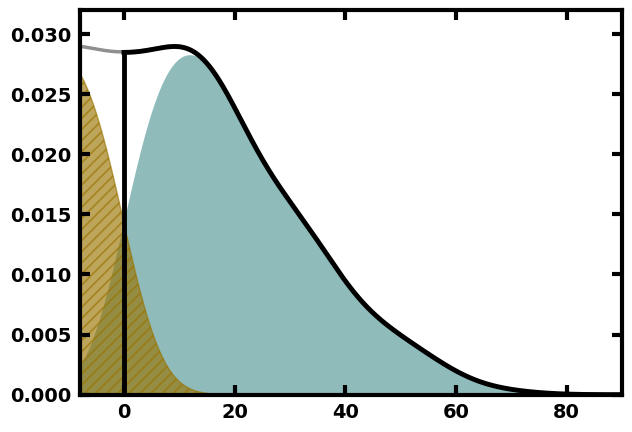

Area under KDE (Trapz):  0.9986 ,  Close enough to 1:  True


In [734]:
density_estimation_uncorrected = density_estimation[all_posterior_i_values >= 0]
density_estimation_uncorrected = density_estimation_uncorrected / (sum(density_estimation_uncorrected) * dx)

plot_mirror_test = True
if plot_mirror_test == True:

    plt.fill_between(all_posterior_i_values, density_estimation, alpha=0.44, zorder=0)
    plt.fill_between(all_posterior_i_values[::-1], density_estimation, color='#997300', hatch='///', alpha=0.64, zorder=0)
    plt.plot(all_posterior_i_values, density_estimation_total, color='#000000', lw=2.5, alpha=0.44, zorder=1)
    plt.plot(posterior_i_values, density_estimation_total_positive_x, color='#000000', lw=3.5, alpha=1, zorder=1)
    plt.plot([0, 0], [0, density_estimation_total_positive_x[0]], color='#000000', lw=3.5, alpha=1, zorder=1)
    # plt.xlim(min(all_posterior_i_values), max(all_posterior_i_values))
    # plt.xlim(-5, 5)
    plt.xlim(-8, max(all_posterior_i_values))
    plt.ylim(0, 0.032)
    plt.show()
    plt.close()

    total_area_trapz = np.trapz(density_estimation_total_positive_x, posterior_i_values)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), ',  Close enough to 1: ', closeness_trapz)


0.1
0.1
Area under Rayleigh (log-U Pr) (Trapz):  1.0 ,  Close enough to 1:  True
Area under Rayleigh (TG Pr) (Trapz):  1.0 ,  Close enough to 1:  True
Area under Gaussian (log-U Pr) (Trapz):  0.9985 ,  Close enough to 1:  True
Area under Gaussian (TG Pr) (Trapz):  0.9998 ,  Close enough to 1:  True
Area under Truncated Gaussian (U Pr) (Trapz):  0.9962 ,  Close enough to 1:  True


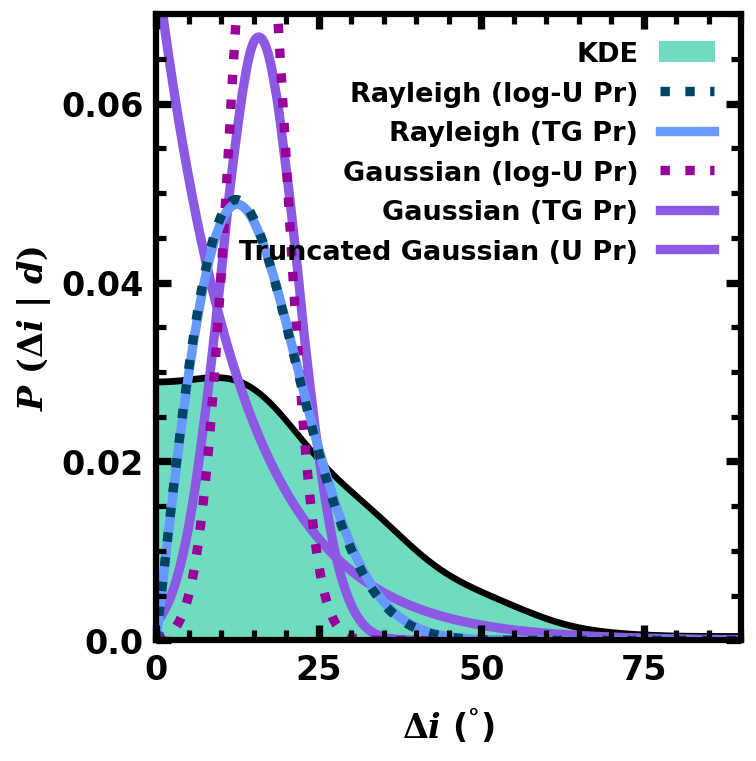

In [735]:

fig = plt.figure(figsize=(5, 5), dpi=150)
ax = fig.add_subplot(111)

ax.minorticks_on()

Delta_i_hist_fontsize = 16

ax.set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=Delta_i_hist_fontsize, labelpad=10)
ax.set_ylabel(r'$P$ $(\Delta i$ | $d)$', fontsize=Delta_i_hist_fontsize)

zorder_shift = 10

kde_color = '#6fdcc1'

kde_line_color = '#000000'  # '#6fdcc1'
ax.plot(x_grid_plot, density_estimation_total_positive_x, color=kde_line_color, lw=7, zorder=-zorder_shift)
ax.fill_between(x_grid_plot, density_estimation_total_positive_x, color=kde_color, alpha=1.0, label='KDE', zorder=1-zorder_shift)

# ax.plot(x_grid_plot, i_diff_dist_from_kde,lw=4, linestyle='-', color='magenta', alpha=0.3, label=r'$\Delta i$ drawn from KDEs', zorder=model_zorder)

print(np.diff(ivals)[0])
print(np.diff(x_grid_plot)[0])

include_HBM_models = True
if include_HBM_models == True:
    for HBM_key in list(Delta_i_HBM_files.keys()):
        model_profile = Delta_i_HBM_files[HBM_key]['Model Profile']
        if HBM_key == R_lU_label:
            model_linestyle = ':'
            model_color = '#004466'
            model_zorder = 6
        if HBM_key == R_G_label:
            model_linestyle = '-'
            model_color = '#6699ff'
            model_zorder = 5
        if HBM_key == G_lU_label:
            model_linestyle = ':'
            model_color = '#990099'
            model_zorder = 4
        if HBM_key == G_G_label:
            model_linestyle = '-'
            model_color = '#8c59e4'
            model_zorder = 3

        model_profile_interp = np.interp(x_grid_plot, xp=ivals, fp=model_profile)
        # model_profile_interp = model_profile_interp / (sum(model_profile_interp) * np.diff(x_grid_plot)[0])

        ax.plot(x_grid_plot, model_profile_interp, lw=4.5, linestyle=model_linestyle, color=model_color, label=HBM_key, zorder=model_zorder-zorder_shift)

        total_area_trapz = np.trapz(model_profile_interp, x_grid_plot)
        closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
        print('Area under ' + HBM_key + ' (Trapz): ', round(total_area_trapz, 4), ',  Close enough to 1: ', closeness_trapz)



xticks_major = [0, 25, 50, 75]
ax.set_xticks(xticks_major, which='major')
ax.set_xticklabels(xticks_major, fontsize=Delta_i_hist_fontsize)
# ax.set_xticklabels(xticks_hist_minor, fontsize=Delta_i_hist_fontsize)
# minor_locator = AutoMinorLocator(3)
# ax.xaxis.set_minor_locator(minor_locator)
ax.set_xlim(0, 90)

yticks_hist = np.arange(0, 0.07 + 0.02, 0.02)
ax.set_yticks(yticks_hist)
ax.set_yticklabels(yticks_hist)
ax.set_ylim(0, 0.07)

ax.legend(loc='upper right', prop={'size': 13}, ncol=1, markerfirst=False)  # , bbox_to_anchor=(0.24, 0.90, 0.5, 0.10))

for spine in ax.spines.values():
    spine.set_zorder(100)

ax.tick_params(which='minor', length=5, width=2.5, labelsize=Delta_i_hist_fontsize)
ax.tick_params(which='major', length=7, width=3.5, labelsize=Delta_i_hist_fontsize)

fig.subplots_adjust(left=0.19, bottom=0.145, right=0.97, top=0.98, wspace=0.12, hspace=0.35)


save_hist_string = 'HBM_distribution_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.pdf'

if plot_transparent == True:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=True)
else:
    fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=False)

plt.show()
plt.close()


# vsini - veq plot

-3.16499561298086 1.289753695493057 -2.453953513791578


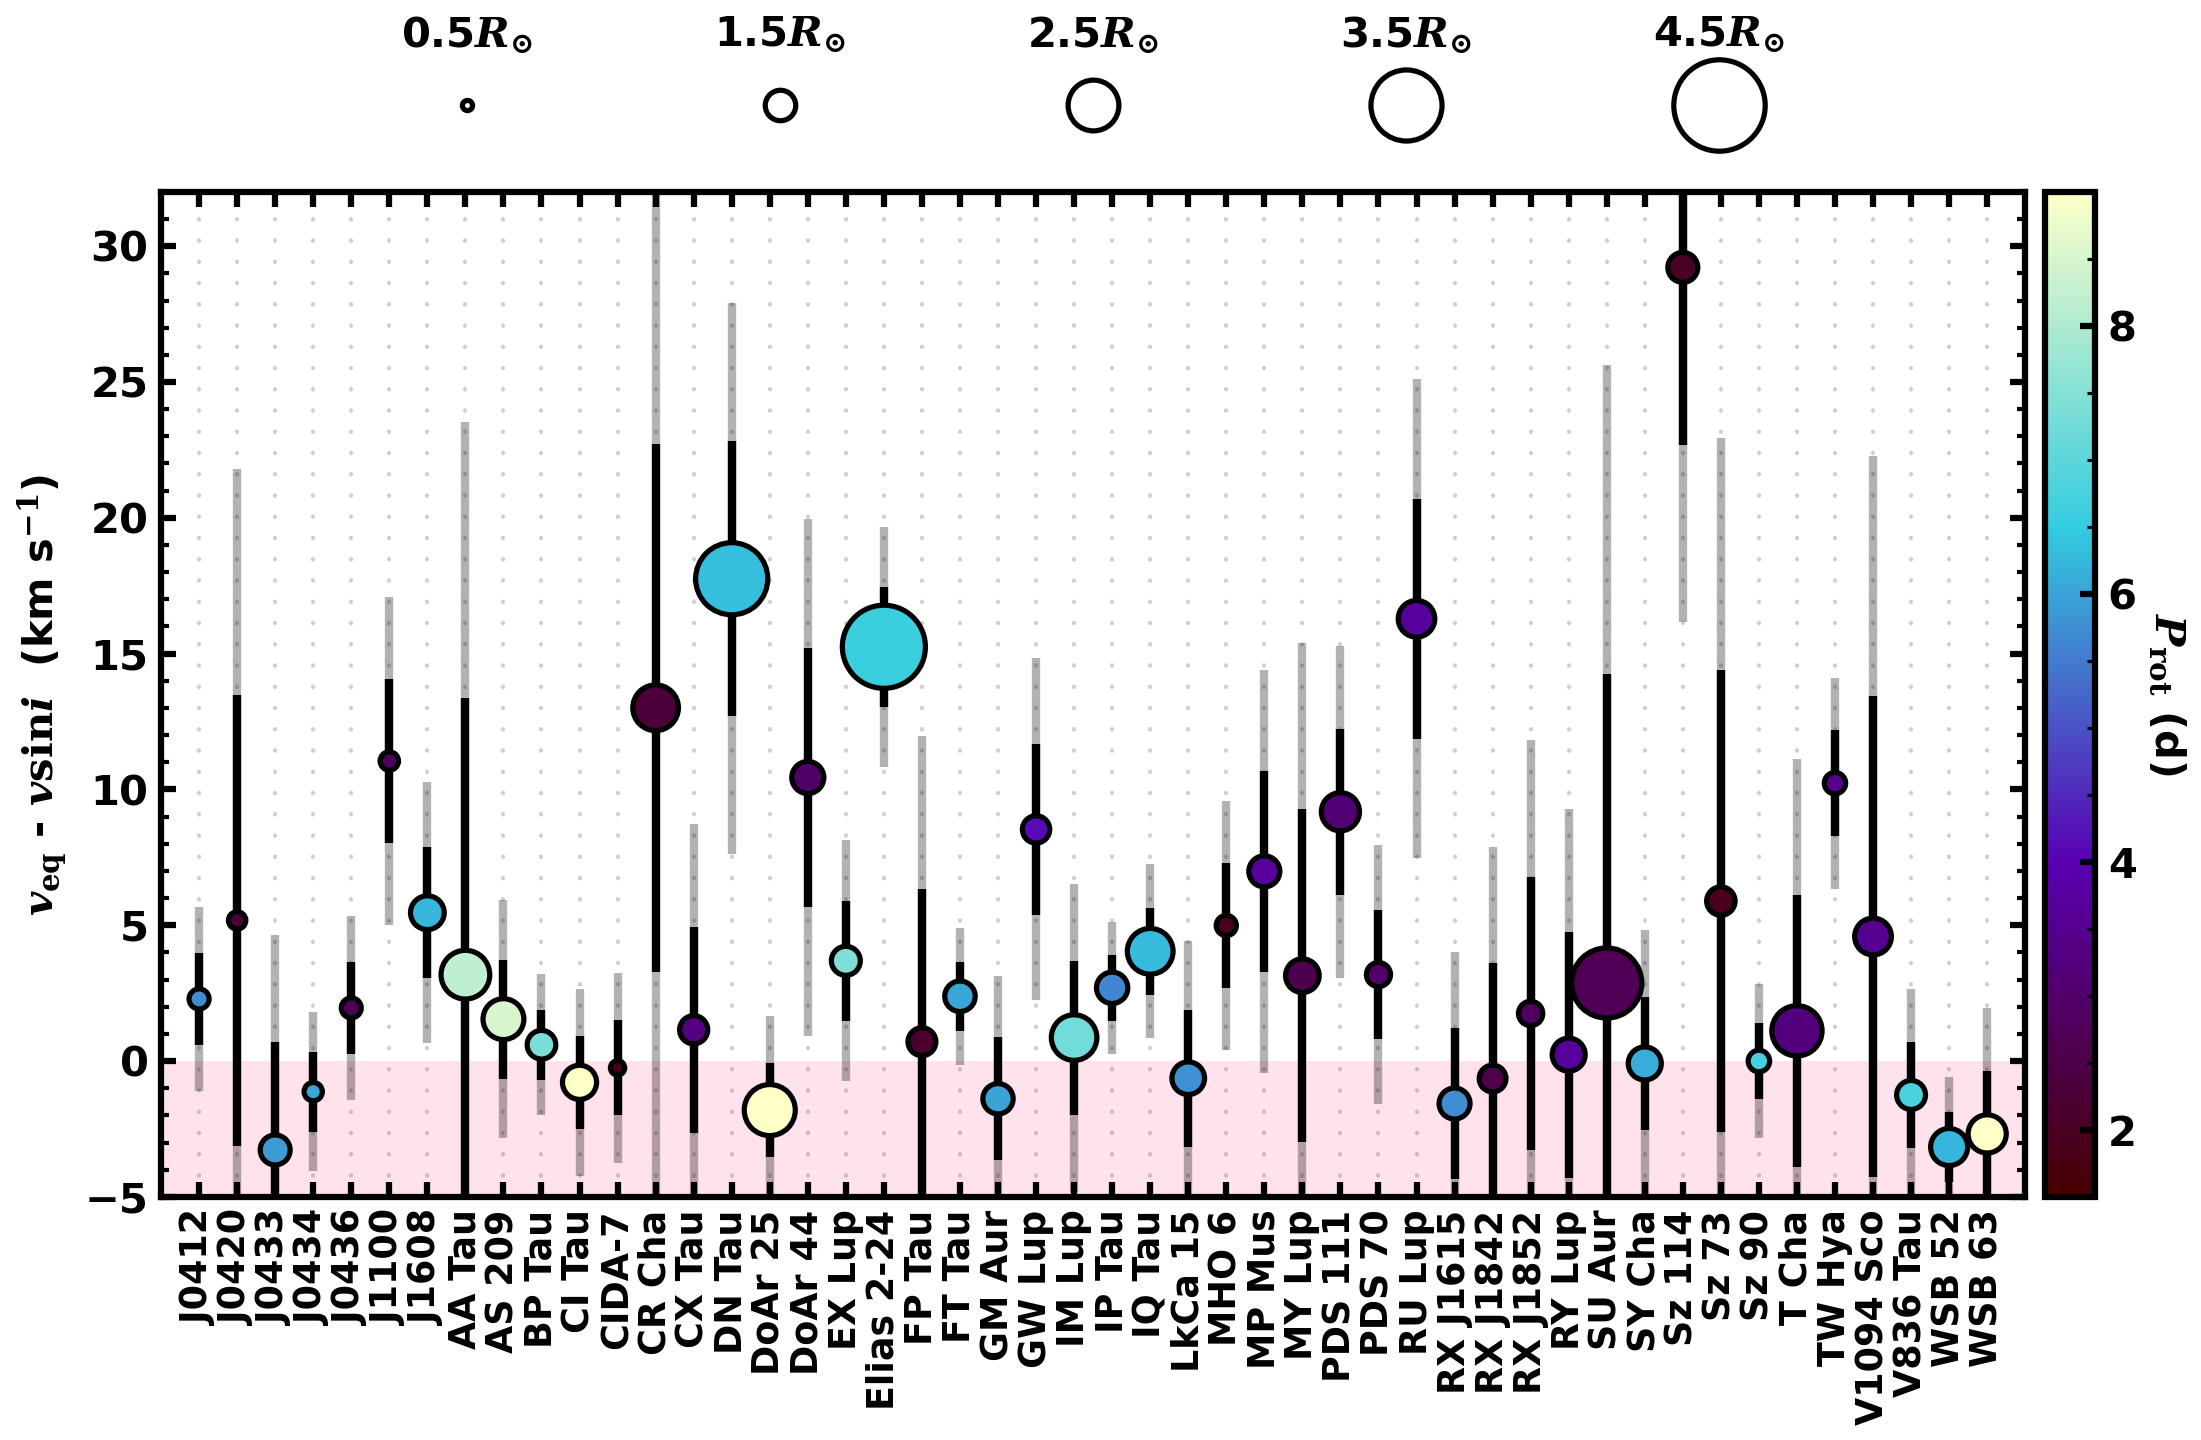

In [736]:
x_spacing = 1

point_size = 8
veq_vsini_fontsize = 20

ymin, ymax = -5, 32 
# ymin, ymax = -20, 32 
# ymin, ymax = -70, 70

z_axis = 'Prot (d)'  # 'Rstar (Rsun)'  # 'disk diff'

if z_axis == 'disk diff':
    z_min, z_max = 0, 60 
    z_label = r'$\Delta i$ ($^\degree$)'
    cbar_ticks = [0, 10, 20, 30, 40, 50, 60]
    cbar_extend = 'neither'
if z_axis == 'Rstar (Rsun)':
    z_min, z_max = 0.50, 2.5
    z_label = r'$R_{*}$ ($R_{\odot}$)'
    cbar_ticks = [0.5, 1.0, 1.5, 2.0, 2.5]
    cbar_extend = 'max'
if z_axis == 'Prot (d)':
    z_min, z_max = 1.5, 9  # 10
    z_label = r'$P_{\mathrm{rot}}$ (d)'
    if z_max < 10:
        cbar_ticks = [2, 4, 6, 8]
    else:
        cbar_ticks = [2, 4, 6, 8, 10]
    cbar_extend = 'neither'

parameter_z_norm = plt.Normalize(z_min, z_max)


# s_axis = 'None'
s_axis = 'Rstar (Rsun)'
if s_axis == 'Rstar (Rsun)':
    point_sizes = []
    for Rstar_i in range(len(df_adopted[s_axis].values)):
        Rstar = df_adopted[s_axis].values[Rstar_i]
        point_sizes.append(np.pi*(5.5 * Rstar)**2)
    # print(point_sizes)


benchmark_radii = np.arange(0.5, 5.5, 1.0)
benchmark_sizes = np.pi*(5.5 * benchmark_radii)**2



# veq_vsini_figwidth, veq_vsini_figheight = 12, 8.5

veq_vsini_figwidth, veq_vsini_figheight = 14.5, 10



# ------------------------- STASSUN RADII -------------------------- # 

vsinis_stassun = np.array(df_adopted['vsini (km/s)'].values)
vsini_errs_stassun = np.array(df_adopted['vsini Unc'].values)
veqs_stassun = np.array(df_adopted['Veq'].values)
veq_errs_stassun = np.array(df_adopted['Veq Unc'].values)
masses_stassun = np.array(df_adopted['Mstar (Msun)'].values)
masses_err_stassun = np.array(df_adopted['Mstar Unc'].values)
radii_stassun = np.array(df_adopted['Rstar (Rsun)'].values)
radii_err_stassun = np.array(df_adopted['Rstar Unc'].values)
Prots_stassun = np.array(df_adopted['Prot (d)'].values)
Prots_err_stassun = np.array(df_adopted['Prot (d)'].values)

vlimit_stassun = np.sqrt((6.674e-20 * masses_stassun * 1.989e30) / (radii_stassun * 6.96e5))

veqs_minus_vsinis_stassun = veqs_stassun - vsinis_stassun
veqs_minus_vsinis_err_stassun_1sig = []
veqs_minus_vsinis_err_stassun_2sig = []
for vsini_err_i in range(len(vsinis_stassun)):
    veqs_minus_vsinis_err_stassun_1sig.append(np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))
    veqs_minus_vsinis_err_stassun_2sig.append(2*np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))

# print(veqs_stassun)

x_array = np.arange(0, x_spacing*len(veqs_minus_vsinis_stassun), x_spacing)
benchmark_x_array = np.linspace(0.15*x_array[-1], 0.85*x_array[-1], len(benchmark_radii))

if len(vsinis_stassun) > 1:

    # colormap = choose_cmap('cyber grape', reverse_cmap=False)
    colormap = choose_cmap('raspberry punch2', reverse_cmap=False)
    point_colors = [colormap(parameter_z_norm(bep)) for bep in df_adopted[z_axis].values]


    fig4 = plt.figure(figsize=(veq_vsini_figwidth, veq_vsini_figheight), dpi=150)
    ax = fig4.add_subplot(111)
    ax.set_ylabel(r'$v_{\mathrm{eq}}$ - $v\mathrm{sin}i$  (km s$^{-1}$)', fontsize=veq_vsini_fontsize, labelpad=8)

    where_ymin = np.where(veqs_minus_vsinis_stassun == min(veqs_minus_vsinis_stassun))[0]
    where_ymax = np.where(veqs_minus_vsinis_stassun == max(veqs_minus_vsinis_stassun))[0]

    xmin, xmax = min(x_array) - x_spacing, max(x_array) + x_spacing
    # ymin, ymax =  min(veqs_minus_vsinis_stassun) - 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun)), max(veqs_minus_vsinis_stassun) + 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun))
    



    vsini_fill_color = '#ffd7e5'  # '#ece6ff'  # '#ffd7cb'  # '#ccffee'  # '#ffd7e5'
    # ax.plot([xmin, xmax], [0, 0], linestyle=':', color=zeroline_color, lw=4, alpha=1., zorder=-3)
    ax.fill_between([xmin, xmax], [ymin, ymin], color=vsini_fill_color, alpha=0.7, lw=0, zorder=-100)
    if s_axis != 'None':
         ax.scatter(x_array, veqs_minus_vsinis_stassun, edgecolors='#000000', linewidth=2.5, s=point_sizes, color=point_colors, linestyle='None')
    else:
        ax.scatter(x_array, veqs_minus_vsinis_stassun, edgecolors='#000000', linewidth=2.5, s=np.pi*point_size**2, color=point_colors, linestyle='None')
    ax.errorbar(x_array, veqs_minus_vsinis_stassun, yerr=veqs_minus_vsinis_err_stassun_1sig, elinewidth=4, linewidth=0, capsize=0, ecolor='#000000', capthick=12, zorder=-1)
    ax.errorbar(x_array, veqs_minus_vsinis_stassun, yerr=veqs_minus_vsinis_err_stassun_2sig, elinewidth=4, linewidth=0, capsize=0, ecolor='#000000', capthick=12, alpha=0.3, zorder=-2)



    # benchmark_edge_color = '#b3b3ff'
    # benchmark_color = '#ffffff'

    for benchmark_i in range(len(benchmark_x_array)):
        ax.scatter([benchmark_x_array[benchmark_i]], [1.10*ymax], color='#ffffff', edgecolors='#000000', s=benchmark_sizes[benchmark_i], linewidth=2.5, clip_on=False, zorder=100)
        ax.text(benchmark_x_array[benchmark_i], 1.18*ymax, str(round(benchmark_radii[benchmark_i], 2)) + r'$R_{\odot}$', horizontalalignment='center', fontsize=veq_vsini_fontsize, verticalalignment='center', clip_on=False,)




    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), ax=ax, use_gridspec=True, shrink=1., fraction=0.05, pad=0.01, extend=cbar_extend)  # location='top', 
    cbar.set_label(z_label, labelpad=24, rotation=270, fontsize=veq_vsini_fontsize, weight='bold')
    # cbar_ticks = cbar.get_ticks()  # np.arange(0, 105, 15)
    cbar.set_ticks(cbar_ticks)
    cbar_ticklabels = [str(cbar_tick) for cbar_tick in cbar_ticks]
    cbar.set_ticklabels(cbar_ticklabels, fontsize=veq_vsini_fontsize)
    cbar.minorticks_on()

    ax.minorticks_on()
    ax.tick_params(axis='y', which='minor', length=4, width=2)
    ax.tick_params(axis='x', which='minor', length=0, width=0)
    ax.tick_params(which='major', length=7, width=3, labelsize=veq_vsini_fontsize)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax) 

    ax.set_xticks(x_array)
    xlabels = []
    xlabels_temp1 = df_adopted['Simbad Name'].values  # [targ_label.replace('2MASS ', '') for targ_label in df_adopted['Simbad Name'].values]
    for xlabel_i in range(len(df_adopted['Simbad Name'].values)):
        if '2MASS' in df_adopted['Simbad Name'].values[xlabel_i]:
            xlabel_name = df_adopted['Simbad Name'].values[xlabel_i].split(' ')[-1][0:5]
        elif 'RX ' in df_adopted['Simbad Name'].values[xlabel_i]:
            xlabel_name = df_adopted['Simbad Name'].values[xlabel_i].split('-')[0][0:8]
        else:
            xlabel_name = df_adopted['Simbad Name'].values[xlabel_i]
        xlabels.append(xlabel_name)
        if df_adopted['Simbad Name'].values[xlabel_i] == 'WSB 52':
            print(veqs_minus_vsinis_stassun[xlabel_i], veqs_minus_vsinis_err_stassun_1sig[xlabel_i], veqs_minus_vsinis_stassun[xlabel_i]/veqs_minus_vsinis_err_stassun_1sig[xlabel_i])
    xticklabels = ax.set_xticklabels(xlabels, fontsize=veq_vsini_fontsize - 2.5, rotation=90)


    for tick in x_array:
        ax.plot([tick, tick], [ymin, ymax], color=zeroline_color, linestyle='-', dashes=(0.1, 5), dash_capstyle='round', linewidth=2, alpha=0.25, zorder=-50)


    ax.set_rasterized(True)

    fig4.subplots_adjust(left=0.0662, bottom=0.17, right=0.978, top=0.84, wspace=0.025, hspace=0)

    save_veq_vsini_string = 'veq_vsini_' + resolution_text + '_' +  light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.pdf'

    if plot_transparent == True:
        fig4.savefig(test_figures_directory + save_veq_vsini_string, dpi=300, transparent=True)
    else:
        fig4.savefig(test_figures_directory + save_veq_vsini_string, dpi=300, transparent=False)


    plt.show()
    plt.close()


# Scatter grid

In [737]:
hists_to_create['SpType']

{'Title': 'SpType',
 'Label': 'Spectral Type',
 'Save Text': 'SpType',
 'Bin Width': 0.24,
 'Bin Range': [3.0, 5.75]}

#99004d
SpType : 48
#990099
Mstar (Msun) : 48
#5031be
Teff (K) : 48
#4973da
Rstar (Rsun) : 48
#3aa8d7
Prot (d) : 48
#68d9da
vsini (km/s) : 48
#d1f4cd
i disk (deg) : 48
#fdfec7
i star (deg) : 48


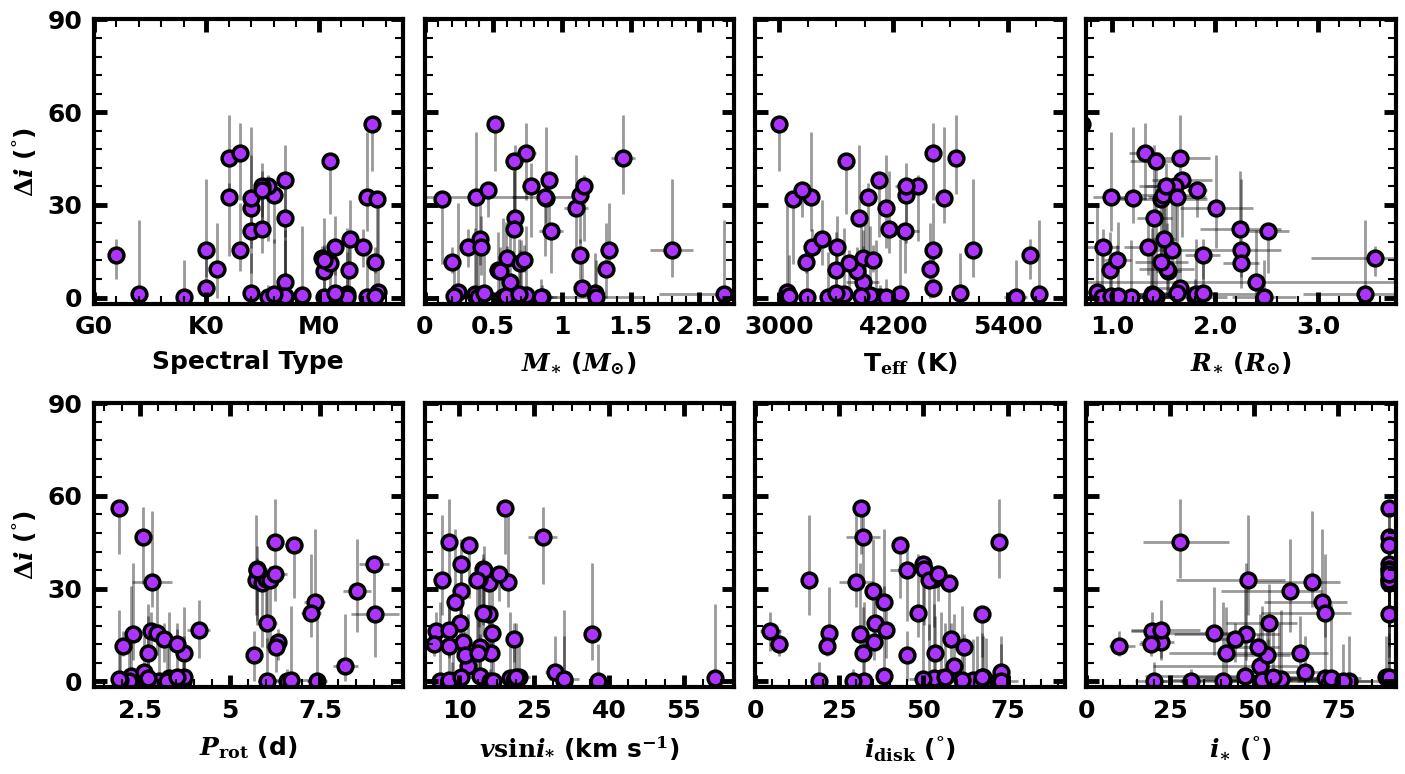

In [738]:
parplot_fontsize = 17
parplot_title_fontsize = 17

target_labels_on = False

save_figs = True


# if z_colors_on == False:
#     fig_width = 6
# else:
#     fig_width = 7
# fig_height = 6



colormap = choose_cmap('cyber grape', reverse_cmap=False)



x_variations = ['SpT', 'mass','Teff', 'radius', 'Prot', 'vsini', 'disk inclination', 'star inclination']
y_variable = 'disk diff'
z_variable = 'star inclination'
z_variable = 'Age'



grid_width = 4
grid_width_cbar = grid_width + 1
grid_height = 2

do_cbar = False
if do_cbar == True:
    cell_width_ratios = [1, 1, 1, 1, 0.10]
    gs = gridspec.GridSpec(grid_height, grid_width_cbar, width_ratios=cell_width_ratios)
    fig_width = 12
    fig_height = 6.5
else:
    cell_width_ratios = [1, 1, 1, 1]
    gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=cell_width_ratios)
    fig_width = 14
    fig_height = 8



fig = plt.figure(figsize=(fig_width, fig_height))
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width_cbar - 1)]
ax_keys = list(hists_to_create.keys())

# panel_colors = ['#2eb8b8', '#006699', '#008ae6', '#99ccff', '#9999ff', '#cc66ff', '#ff66ff', '#b30086']
panel_colors = ['#99004d', '#990099', '#5031be', '#4973da', '#3aa8d7', '#68d9da', '#d1f4cd', '#fdfec7']

for ax_i, ax in enumerate(axes):

    ax.minorticks_on()

    x_variable = x_variations[ax_i]

    plot_variables = [x_variable, y_variable, z_variable]

    if 'star inclination' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'star inclination' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'i star (deg)'
            x_column_err_p = 'i star -Unc'
            x_column_err_m = 'i star +Unc'
            x_label = r'$i_{\ast}$ ($^\degree$)'
            x_text = 'i_Star'
            xlims = [0, 92]
        if axis_bool == 1:
            y_column = 'i star (deg)'
            y_column_err_p = 'i star -Unc'
            y_column_err_m = 'i star +Unc'
            y_label = r'$i_{\ast}$ ($^\degree$)'
            ylims = [0, 92]
            y_text = 'i_Star'
        if axis_bool == 2:
            z_column = 'i star (deg)'
            z_column_err_p = 'i star -Unc'
            z_column_err_m = 'i star +Unc'
            z_label = r'$i_{\ast}$ ($^\degree$)'
            zlims = [0, 90]
            z_text = 'i_Star'
    if 'disk inclination' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'disk inclination' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'i disk (deg)'
            x_column_err_p = 'i disk Unc'
            x_column_err_m = 'i disk Unc'
            x_label = r'$i_{\mathrm{disk}}$ ($^\degree$)'
            xlims = [0, 92]
            x_text = 'i_Disk'
        if axis_bool == 1:
            y_column = 'i disk (deg)'
            y_column_err_p = 'i disk Unc'
            y_column_err_m = 'i disk Unc'
            y_label = r'$i_{\mathrm{disk}}$ ($^\degree$)'
            ylims = [0, 92]
            y_text = 'i_Disk'
        if axis_bool == 2:
            z_column = 'i disk (deg)'
            z_column_err_p = 'i disk Unc'
            z_column_err_m = 'i disk Unc'
            z_label = r'$i_{\mathrm{disk}}$ ($^\degree$)'
            zlims = [0, 90]
            z_text = 'i_Disk'
    if 'mass' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'mass' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Mstar (Msun)'
            x_column_err_p = 'Mstar Unc'
            x_column_err_m = 'Mstar Unc'
            x_label = r'$M_{\ast}$ ($M_{\odot}$)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Mstar'
        if axis_bool == 1:
            y_column = 'Mstar (Msun)'
            y_column_err_p = 'Mstar Unc'
            y_column_err_m = 'Mstar Unc'
            y_label = r'$M_{\ast}$ ($M_{\odot}$)'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'Mstar'
        if axis_bool == 2:
            z_column = 'Mstar (Msun)'
            z_column_err_p = 'Mstar Unc'
            z_column_err_m = 'Mstar Unc'
            z_label = r'$M_{\ast}$ ($M_{\odot}$)'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'Mstar'
    if 'radius' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'radius' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Rstar (Rsun)'
            x_column_err_p = 'Rstar Unc'
            x_column_err_m = 'Rstar Unc'
            x_label = r'$R_{\ast}$ ($R_{\odot}$)'
            xlims = [0.75, 3.75]
            x_text = 'Rstar'
        if axis_bool == 1:
            y_column = 'Rstar (Rsun)'
            y_column_err_p = 'Rstar Unc'
            y_column_err_m = 'Rstar Unc'
            y_label = r'$R_{\ast}$ ($R_{\odot}$)'
            ylims = [0.75, 3.75]
            y_text = 'Rstar'
        if axis_bool == 2:
            z_column = 'Rstar (Rsun)'
            z_column_err_p = 'Rstar Unc'
            z_column_err_m = 'Rstar Unc'
            z_label = r'$R_{\ast}$ ($R_{\odot}$)'
            zlims = [0.75, 3.75]
            z_text = 'Rstar'
    if 'vsini' in plot_variables:
        vsinis = np.array(df_adopted['vsini (km/s)'].values)
        vsini_errs = np.array(df_adopted['vsini Unc'].values)
        veqs = np.array(df_adopted['Veq'].values)
        veq_errs = np.array(df_adopted['Veq Unc'].values)

        test_targs = df_adopted['Target'].values
        
        axis_bool = [index for index in range(len(plot_variables)) if 'vsini' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'vsini (km/s)'
            x_column_err_p = 'vsini Unc'
            x_column_err_m = 'vsini Unc'
            x_label = r'$v\mathrm{sin}i_{*}$ (km s$^{-1}$)'
            xlims = [3, 65]
            x_text = 'vsini'
        if axis_bool == 1:
            y_column = 'vsini (km/s)'
            y_column_err_p = 'vsini Unc'
            y_column_err_m = 'vsini Unc'
            y_label = r'$v\mathrm{sin}i_{*}$ (km s$^{-1}$)'
            xlims = [3, 65]
            y_text = 'vsini'
        if axis_bool == 2:
            z_column = 'vsini (km/s)'
            z_column_err_p = 'vsini Unc'
            z_column_err_m = 'vsini Unc'
            z_label = r'$v\mathrm{sin}i_{*}$ (km s$^{-1}$)'
            xlims = [3, 65]
            z_text = 'vsini'
    if 'Prot' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Prot' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Prot (d)'
            x_column_err_p = 'Prot Unc'
            x_column_err_m = 'Prot Unc'
            x_label = r'$P_{\mathrm{rot}}$ (d)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Prot'
        if axis_bool == 1:
            y_column = 'Prot (d)'
            y_column_err_p = 'Prot Unc'
            y_column_err_m = 'Prot Unc'
            y_label = r'$P_{\mathrm{rot}}$ (d)'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'Prot'
        if axis_bool == 2:
            z_column = 'Prot (d)'
            z_column_err_p = 'Prot Unc'
            z_column_err_m = 'Prot Unc'
            z_label = r'$P_{\mathrm{rot}}$ (d)'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'Prot'
    if 'Teff' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Teff' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Teff (K)'
            x_column_err_p = 'Teff Unc'
            x_column_err_m = 'Teff Unc'
            x_label = r'T$_{\mathrm{eff}}$ (K)'
            xlims = hists_to_create[x_column]['Bin Range']  # [2900, 5100]
            x_text = 'Teff'
        if axis_bool == 1:
            y_column = 'Teff (K)'
            y_column_err_p = 'Teff Unc'
            y_column_err_m = 'Teff Unc'
            y_label = r'T$_{\mathrm{eff}}$ (K)'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'Teff'
        if axis_bool == 2:
            z_column = 'Teff (K)'
            z_column_err_p = 'Teff Unc'
            z_column_err_m = 'Teff Unc'
            z_label = r'T$_{\mathrm{eff}}$ (K)'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'Teff'

    if 'SpT' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'SpT' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'SpType'
            x_column_err_p = 'SpType Unc'
            x_column_err_m = 'SpType Unc'
            x_label = 'Spectral Type'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'SpT'
        if axis_bool == 1:
            y_column = 'SpType'
            y_column_err_p = 'SpType Unc'
            y_column_err_m = 'SpType Unc'
            y_label = 'Spectral Type'
            ylims = hists_to_create[x_column]['Bin Range']
            y_text = 'SpT'
        if axis_bool == 2:
            z_column = 'SpType'
            z_column_err_p = 'SpType Unc'
            z_column_err_m = 'SpType Unc'
            z_label = 'Spectral Type'
            zlims = hists_to_create[x_column]['Bin Range']
            z_text = 'SpT'
    if 'disk diff' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'disk diff' in plot_variables[index]]
        for axis_num in axis_bool:
            if axis_num == 0:
                x_column = 'disk diff'
                x_column_err_p = 'disk diff +Unc'
                x_column_err_m = 'disk diff -Unc'
                x_label = r'$\Delta i$ ($^\degree$)'
                xlims = [-2, 90]
                x_text = 'Delta_i'
            if axis_num == 1:
                y_column = 'disk diff'
                y_column_err_p = 'disk diff +Unc'
                y_column_err_m = 'disk diff -Unc'
                y_label = r'$\Delta i$ ($^\degree$)'
                ylims = [-2, 90]
                y_text = 'Delta_i'
            if axis_num == 2:
                z_column = 'disk diff'
                z_column_err_p = 'disk diff +Unc'
                z_column_err_m = 'disk diff -Unc'
                z_label = r'$\Delta i$ ($^\degree$)'
                zlims = [0, 90]
                z_text = 'Delta_i'
    if 'Age' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Age' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Age (Myr)'
            x_column_err_p = 'Age Unc'
            x_column_err_m = 'Age Unc'
            x_label = 'Age (Myr)'
            xlims = [0, 6]
            x_text = 'Age'
        if axis_bool == 1:
            y_column = 'Age (Myr)'
            y_column_err_p = 'Age Unc'
            y_column_err_m = 'Age Unc'
            y_label = 'Age (Myr)'
            ylims = [0, 16]
            y_text = 'Age'
        if axis_bool == 2:
            z_column = 'Age (Myr)'
            z_column_err_p = 'Age Unc'
            z_column_err_m = 'Age Unc'
            z_label = 'Age (Myr)'
            zlims = [0, 6]   # [0, 10]  # np.ceil(np.nanmax(df_adopted[z_column].values))]
            z_text = 'Age'

    map_min = zlims[0]
    map_max = zlims[1]
    parameter_z_norm = plt.Normalize(map_min, map_max)

    # -------------------------- STASSUN RADII PARAMETERS -------------------------- #

    parameter_x_stassun = np.array(df_adopted[x_column].values)
    parameter_x_err_p_stassun = np.array(df_adopted[x_column_err_p].values)
    parameter_x_err_m_stassun = np.array(df_adopted[x_column_err_m].values)
    parameter_y_stassun = np.array(df_adopted[y_column].values)
    parameter_y_err_p_stassun = np.array(df_adopted[y_column_err_p].values)
    parameter_y_err_m_stassun = np.array(df_adopted[y_column_err_m].values)
    parameter_z_stassun = np.array(df_adopted[z_column].values)
    parameter_z_err_p_stassun = np.array(df_adopted[z_column_err_p].values)
    parameter_z_err_m_stassun = np.array(df_adopted[z_column_err_m].values)
    targets_list_stassun = np.array(df_adopted['Simbad Name'].values)

    parameter_x_err_stassun = [parameter_x_err_m_stassun, parameter_x_err_p_stassun]
    parameter_y_err_stassun = [parameter_y_err_m_stassun, parameter_y_err_p_stassun]
    parameter_z_err_stassun = [parameter_z_err_m_stassun, parameter_z_err_p_stassun]


    if do_cbar == True:
        point_size = 5.4
        point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z_stassun]
        # point_edgecolors = [edge_color]*len(point_colors)
        point_edgecolors = ['#000000']*len(point_colors)
        inner_edgecolors = ['#b366ff']*len(point_colors)
        edge_width = 2.5
    else:
        point_size = 6.0
        # point_colors = ['#781a88']*len(point_colors)
        # point_colors = ['#9999ff']*len(point_colors)
        # point_colors = [panel_colors[ax_i]]*len(parameter_y_stassun)
        point_colors = ['#ad33ff']*len(parameter_y_stassun)
        print(panel_colors[ax_i])
        # point_edgecolors = ['#330033']*len(point_colors)
        point_edgecolors = ['#000000']*len(point_colors)
        inner_edgecolors = ['#260099']*len(point_colors)
        edge_width = 2.5


    print(x_column, ':', len(parameter_x_stassun))


    for par_i in range(len(parameter_y_stassun)):
        ax.scatter([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], color=point_colors[par_i], edgecolors=point_edgecolors[par_i], s=np.pi*point_size**2, linewidth=edge_width, linestyle='None', zorder=-1)
        ax.errorbar([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], xerr=[[parameter_x_err_stassun[0][par_i]],[parameter_x_err_stassun[1][par_i]]], yerr=[[parameter_y_err_stassun[0][par_i]], [parameter_y_err_stassun[1][par_i]]],
                    elinewidth=2, linewidth=0, capsize=0, ecolor=point_edgecolors[par_i], capthick=2, alpha=0.4, zorder=-2)

    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

    ax.tick_params(which='minor', length=6, width=1.5, labelsize=hist_fontsize)
    ax.tick_params(which='major', length=9, width=3.5, labelsize=hist_fontsize, pad=8)




    if x_column == 'SpType':
        sptype_designations = {'3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,0.5) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=hist_fontsize)

    if (y_column == 'disk diff') or (y_column == 'i star (deg)') or (y_column == 'i disk (deg)'):
        # ytickvals = np.arange(0, 105, 15)
        ytickvals = np.arange(0, 90 + 30, 30)
        yticks = [int(ytick) for ytick in ytickvals]
        ax.set_yticks(yticks)
        yticklabels = ax.set_yticklabels(yticks, fontsize=hist_fontsize)
        Number_of_minor_ticks_between_major_ticks = 3
        
        minor_locator = AutoMinorLocator(5)
        ax.yaxis.set_minor_locator(minor_locator)

    if x_column == 'SpType':
        sptype_designations = {'3.00': 'G0',
                               '3.25': 'G2.5',
                               '3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,1) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=hist_fontsize)

    if x_column == 'Mstar (Msun)':
        xtickvals = [0, 0.5, 1, 1.5, 2.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if x_column == 'Rstar (Rsun)':
        xtickvals = [1.0, 2.0, 3.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if x_column == 'Prot (d)':
        xtickvals = [2.5, 5, 7.5]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if (x_column == 'i disk (deg)') or (x_column == 'i star (deg)'):
        # xtickvals = [0, 30, 60]
        xtickvals = [0, 25, 50, 75]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)
        

    if x_column == 'vsini (km/s)':
        # xtickvals = [0, 15, 30, 45, 60]
        xtickvals = [10, 25, 40, 55]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)

    if x_column == 'Teff (K)':
        xtickvals = [3000, 4200, 5400]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=hist_fontsize)



    ax.set_xlabel(x_label, fontsize=hist_fontsize, labelpad=8)
    if np.mod(ax_i, grid_width_cbar-1) == 0:
        ax.set_ylabel(y_label, fontsize=hist_fontsize, labelpad=6)
    else:
        ax.set_ylabel(' ')
        ax.set_yticklabels([])


if do_cbar == True:
    # Add a single colorbar
    cbar_ax = fig.add_subplot(gs[:, -1])
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), cax=cbar_ax) # , use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
    cbar.set_label(z_label, labelpad=30, rotation=270, fontsize=hist_fontsize, weight='bold')
    cbar_ticks_floats = cbar.get_ticks()
    cbar_ticks = [int(cbar_tick) for cbar_tick in cbar_ticks_floats]
    cbar.set_ticklabels(cbar_ticks, fontsize=hist_fontsize)



if target_labels_on == True:
    labels_text = 'labeled'
else:
    labels_text = 'unlabeled'

if do_cbar == True:
    fig.subplots_adjust(left=0.07, bottom=0.10, right=0.93, top=0.975, wspace=0.10, hspace=0.35)
else:
    fig.subplots_adjust(left=0.06, bottom=0.11, right=0.99, top=0.945, wspace=0.07, hspace=0.35)

# SAVE THE FIGURE
if save_figs == True:

    save_par_vs_Delta_i_string = 'Scatter_Grid_' + light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.pdf'
    if plot_transparent == True:
        fig.savefig(test_figures_directory + save_par_vs_Delta_i_string, dpi=300, transparent=True)
    else:
        fig.savefig(test_figures_directory + save_par_vs_Delta_i_string, dpi=300, transparent=False)

plt.show()
plt.close()





# Main Scatter Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


48


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


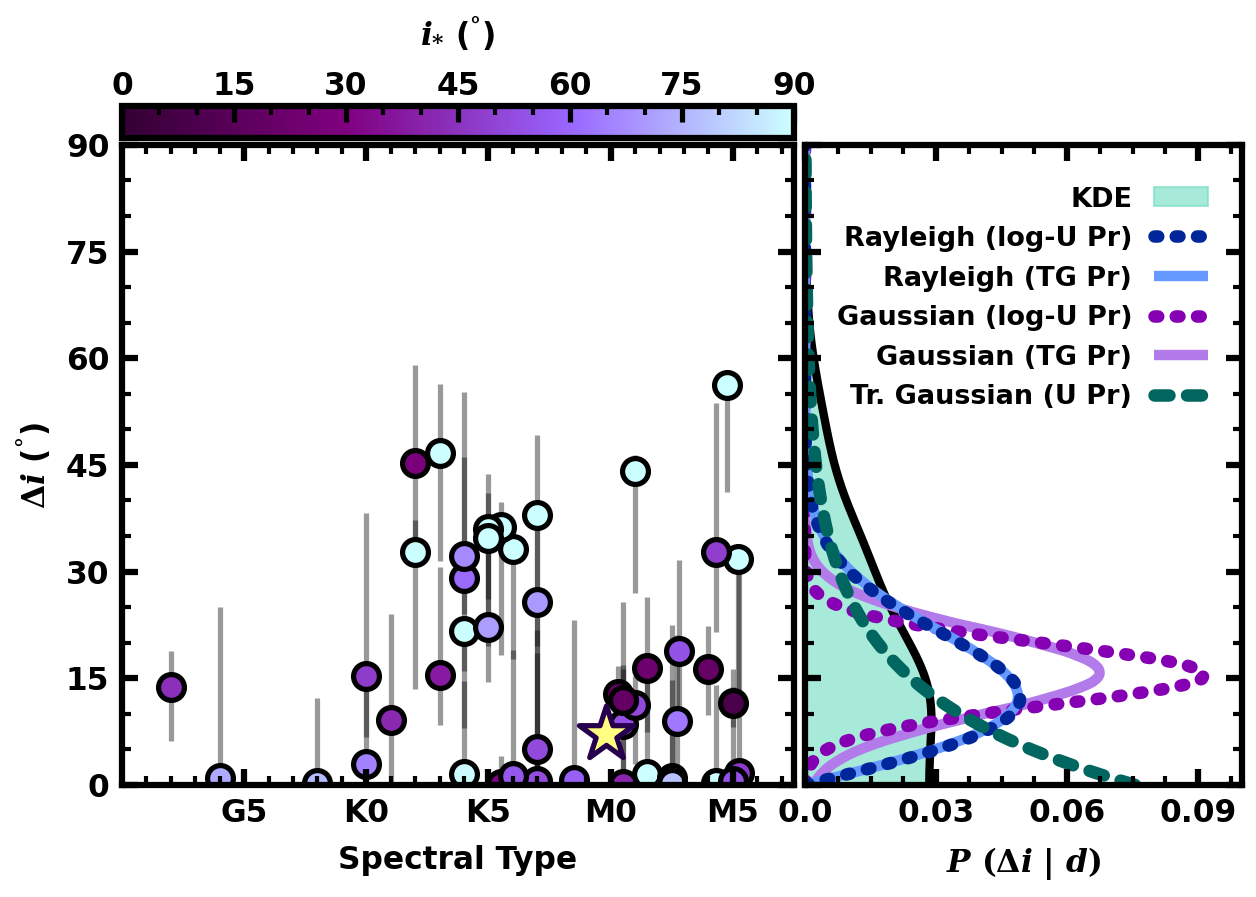

In [739]:

x_column = 'SpType'
x_column_err_p = 'SpType Unc'
x_column_err_m = 'SpType Unc'
x_label = 'Spectral Type'
xlims = [3.0, 5.75]
x_text = 'SpT'

y_column = 'disk diff'
y_column_err_p = 'disk diff +Unc'
y_column_err_m = 'disk diff -Unc'
y_label = r'$\Delta i$ ($^\degree$)'
ylims = [-2, 90]
y_text = 'Delta_i'

z_column = 'i star (deg)'
z_column_err_p = 'i star -Unc'
z_column_err_m = 'i star +Unc'
z_label = r'$i_{*}$ ($^\degree$)'
zlims = [0, 90]
z_text = 'i_Star'

parameter_z_norm = plt.Normalize(zlims[0], zlims[1])

parameter_x_stassun = np.array(df_adopted[x_column].values)
parameter_x_err_p_stassun = np.array(df_adopted[x_column_err_p].values)
parameter_x_err_m_stassun = np.array(df_adopted[x_column_err_m].values)
parameter_y_stassun = np.array(df_adopted[y_column].values)
parameter_y_err_p_stassun = np.array(df_adopted[y_column_err_p].values)
parameter_y_err_m_stassun = np.array(df_adopted[y_column_err_m].values)
parameter_z_stassun = np.array(df_adopted[z_column].values)
parameter_z_err_p_stassun = np.array(df_adopted[z_column_err_p].values)
parameter_z_err_m_stassun = np.array(df_adopted[z_column_err_m].values)
targets_list_stassun = np.array(df_adopted['Simbad Name'].values)

parameter_x_err_stassun = [parameter_x_err_m_stassun, parameter_x_err_p_stassun]
parameter_y_err_stassun = [parameter_y_err_m_stassun, parameter_y_err_p_stassun]
parameter_z_err_stassun = [parameter_z_err_m_stassun, parameter_z_err_p_stassun]




grid_height = 2
grid_width = 2

original_fig_width = 8
original_fig_height = 6.5

original_width_ratios = [1, 0.40]
original_height_ratios = [0.05, 1]


fig_width = 8.25
fig_height = 5.80

try_width_ratios = [1, 0.65]
try_height_ratios = [0.05, 1]


single_parplot_fontsize = 15

target_labels_on = False

point_size = 7

z_colors_on = True

include_HBM_models = True


fig = plt.figure(figsize=(fig_width, fig_height), dpi=150)
gs = gridspec.GridSpec(grid_height , grid_width , width_ratios=try_width_ratios, height_ratios=try_height_ratios)
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width)]
cbar_ax = axes[0]
blank_ax = axes[1]
ax1 = axes[2]
ax2 = axes[3]


# MAKE INVISIBLE AXES SPINES INVISIBRU
for spine in blank_ax.spines.values():
    spine.set_edgecolor('#ffffff')
blank_ax.set_xticklabels([])
blank_ax.set_yticklabels([])
blank_ax.tick_params(axis='both', which='both', color='#ffffff')



ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_xlabel(x_label, fontsize=single_parplot_fontsize, labelpad=8)
ax1.set_ylabel(r'$\Delta i$ ($^\degree$)', fontsize=single_parplot_fontsize, labelpad=6)
ax2.set_xlabel(r'$P$ $(\Delta i$ | $d)$', fontsize=single_parplot_fontsize, labelpad=8)

point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z_stassun]
point_edgecolors = [edge_color]*len(point_colors)
if z_colors_on == True:
    point_colors = [colormap(parameter_z_norm(bep)) for bep in parameter_z_stassun]
else:
    point_colors = [point_color_no_z]*len(point_colors)

print(len(parameter_y_stassun))

# edgecolors=point_edgecolors[par_i]

# -------------------------------------- THE SAMPLE ---------------------------------------  #
for par_i in range(len(parameter_y_stassun)):
    if parameter_z_stassun[par_i] == 90.0:
        zord = -4
    if parameter_z_stassun[par_i] < 90:
        zord = -1
    ax1.scatter([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], color=point_colors[par_i], edgecolors='#000000', linewidth=2.5, s=np.pi*point_size**2, linestyle='None', zorder=zord)
    ax1.errorbar([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], xerr=[[parameter_x_err_stassun[0][par_i]],[parameter_x_err_stassun[1][par_i]]], yerr=[[parameter_y_err_stassun[0][par_i]], [parameter_y_err_stassun[1][par_i]]],
                elinewidth=2.5, linewidth=0, capsize=0, ecolor='#000000', capthick=0, alpha=0.4, zorder=-5)
# ---------------------------------------------------------------------------------------- #

# --------------------------------------- COLORBAR --------------------------------------- #
if z_colors_on == True:
    # Add a single colorbar
    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), cax=cbar_ax, orientation='horizontal') # , use_gridspec=True, shrink=1., fraction=0.05, pad=0.02)  # location='top', 
    cbar.set_label(z_label, labelpad=12, fontsize=single_parplot_fontsize, weight='bold')  # rotation=270
    cbar_ticks = np.arange(0, 105, 15)
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticks, fontsize=single_parplot_fontsize)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    Number_of_minor_ticks_between_major_ticks_cbar = 3
    yticks_minor_cbar = AutoMinorLocator(Number_of_minor_ticks_between_major_ticks_cbar)
    cbar.minorticks_on()
    cbar.ax.xaxis.set_minor_locator(yticks_minor_cbar)
    cbar.ax.tick_params(which='minor', length=4.5, width=2)
    cbar.ax.tick_params(which='major', length=7.5, width=2.5, pad=2)
# ---------------------------------------------------------------------------------------- #





# ------------------------------ KERNEL DENSITY ESTIMATION ------------------------------- #
kde_color = '#6fdcc1'  # '#6fddbe'  # '#6fdcc1'  # #6fdcdc
ax2.plot(density_estimation_total_positive_x, x_grid_plot, color='#000000', lw=4, zorder=2-zorder_shift)
ax2.fill_between(density_estimation_total_positive_x, x_grid_plot, color=kde_color, alpha=0.6, label='KDE', zorder=1-zorder_shift)
# ax2.plot(density_estimation_uncorrected, x_grid_plot, color='#ff9900', lw=5, zorder=2-zorder_shift)
# ax2.fill_between(density_estimation_uncorrected, x_grid_plot, facecolor='None', edgecolor='#ff9900', hatch='///', lw=2, alpha=1, label='uncorrected KDE', zorder=1-zorder_shift)
# ---------------------------------------------------------------------------------------- #





# -------------------------------------- HBM MODELS -------------------------------------- #
if include_HBM_models == True:
    for HBM_key in list(Delta_i_HBM_files.keys()):
        model_profile = Delta_i_HBM_files[HBM_key]['Model Profile']
        model_profile_16 = Delta_i_HBM_files[HBM_key]['Model Profile 16']
        model_profile_84 = Delta_i_HBM_files[HBM_key]['Model Profile 84']
        if HBM_key == R_lU_label:
            model_linewidth = 6
            model_linestyle = '-'
            model_dashes = (0.3, 1.4)  # (0.85, 0.75)  # (0.05, 1.5)
            model_capstyle = 'round'
            model_color = '#002699'  # '#004466'  # '#002b80'
            model_zorder = 6
        if HBM_key == R_G_label:
            model_linewidth = 5
            model_linestyle = '-'
            model_dashes = (1, 0)
            model_capstyle = 'butt'
            model_color = '#6699ff'  # '#33cccc'  # '#0099cc'
            model_zorder = 5
        if HBM_key == G_lU_label:
            model_linewidth = 6
            model_linestyle = '-'
            model_dashes = (0.3, 1.4)  # (0.85, 0.75)  # (0.05, 1.5)
            model_capstyle = 'round'  # 'round'
            model_color = '#8600b3'  # '#b30059'  # '#660066'  # '#990099'
            model_zorder = 4
        if HBM_key == G_G_label:
            model_linewidth = 5
            model_linestyle = '-'
            model_dashes = (1, 0)
            model_capstyle = 'butt'
            model_color = '#b37bea'  # '#8c59e4'  # '#bf00ff'
            model_zorder = 3
        if HBM_key == TG_U_label:
            model_linewidth = 6
            model_linestyle = '-'
            model_dashes = (1.2, 1.4)
            model_capstyle = 'round'
            model_color = '#00665f'  # '#008060'  # '#608000'  # '#99004d'  # '#739900' 
            model_zorder = 7
            HBM_key = 'Tr. Gaussian (U Pr)'
        # ax1.plot([], [], lw=4, linestyle=model_linestyle, color=model_color, label=HBM_key, zorder=model_zorder)
        ax2.plot(model_profile, ivals, lw=model_linewidth, linestyle=model_linestyle, dashes=model_dashes, dash_capstyle=model_capstyle, color=model_color, label=HBM_key, zorder=model_zorder-zorder_shift)
        # ax2.fill_betweenx(ivals, model_profile_84, model_profile_16, lw=0, label=HBM_key, color=model_color, alpha=1, zorder=model_zorder-zorder_shift)
# ---------------------------------------------------------------------------------------- #

# ---------------------------------------- THE SUN ---------------------------------------  #
Solar_SpType = 4.98  # 4.6
Solar_SpType_err = 0.1
Solar_obliquity = 7.155
Solar_obliquity_err = 0.002
Solar_point_size = 750

sun_color = '#ffff80'  # '#ace600'
sun_edgecolor = '#26004d'  # '#001a33'
ax1.scatter([Solar_SpType], [Solar_obliquity], marker='*', color=sun_color, edgecolors=sun_edgecolor, linewidth=2.5, s=Solar_point_size, linestyle='None')  # , label='The Pre-main Sequence Sun')
# ax1.errorbar([Solar_SpType], [Solar_obliquity], xerr=[Solar_SpType_err], yerr=[Solar_obliquity_err], elinewidth=3, linewidth=0, capsize=0, ecolor='#001a33', capthick=0, zorder=-1)   
# ---------------------------------------------------------------------------------------- #

for spine in ax2.spines.values():
    spine.set_zorder(100)


sptype_designations = {'0': 'B',
                    '0.5': 'B5',
                    '1': 'A0',
                    '1.5': 'A5',
                    '2': 'F0',
                    '2.5': 'F5',
                    '3': 'G0',
                    '3.5': 'G5',
                    '4': 'K0',
                    '4.5': 'K5',
                    '5': 'M0',
                    '5.5': 'M5',
                    }

xtickvals = [3.5, 4, 4.5, 5, 5.5]  # np.arange(xlims[0], xlims[1]+0.25, 0.25)
xticklabs = []
xticks = []
for xtick in xtickvals:
    if xtick < xlims[1]:
        if (np.mod(xtick,1) == 0) and (xtick >= xlims[0]):
            xticks.append(xtick)
            xticklabs.append(sptype_designations[str(int(xtick))])
        elif (np.mod(xtick,0.5) == 0) and (xtick >= xlims[0]):
            xticks.append(xtick)
            xticklabs.append(sptype_designations['{:.1f}'.format(xtick)])
ax1.set_xticks(xticks)
xticklabels = ax1.set_xticklabels(xticklabs, fontsize=single_parplot_fontsize)

if include_HBM_models == True:
    dx2 = 0.03
    x2lim = 0.10
if include_HBM_models == False:
    dx2 = 0.01
    x2lim = 0.035
ax2_xtickvals = np.arange(0.0, x2lim + dx2, dx2)
ax2.set_xticks(ax2_xtickvals)
ax2.set_xticklabels(ax2_xtickvals, fontsize=single_parplot_fontsize)




ytickvals_major = np.arange(0, 105, 15)
yticks_major = [int(ytick) for ytick in ytickvals_major]
ax1.set_yticks(yticks_major, which='major')
ax2.set_yticks(yticks_major, which='major')
yticklabels = ax1.set_yticklabels(yticks_major, fontsize=single_parplot_fontsize)
ax2.set_yticklabels([])

Number_of_minor_ticks_between_major_ticks = 3
yticks_minor = AutoMinorLocator(Number_of_minor_ticks_between_major_ticks) 
ax1.yaxis.set_minor_locator(yticks_minor)
ax2.yaxis.set_minor_locator(yticks_minor)


ax1.set_xlim(xlims)
ax1.set_ylim(0, 90)
ax2.set_ylim(0, 90)
ax2.set_xlim(0, x2lim)

ax1.set_rasterized(True)

ax1.tick_params(which='minor', length=4.5, width=2)
ax1.tick_params(which='major', length=7.5, width=3, pad=6)

ax2.tick_params(labelsize=single_parplot_fontsize)

ax2.tick_params(which='minor', length=4.5, width=2)
ax2.tick_params(which='major', length=7.5, width=3, pad=6)

if include_HBM_models == True:
    leg2 = ax2.legend(loc='upper left', prop={'size': 12}, ncol=1, bbox_to_anchor=(-1.65, 0.90, 0.5, 0.1), markerfirst=False) # , rotation=90)  # , bbox_to_anchor=(0., 0.5, 0.5, 0.35))
    leg1 = ax1.legend(loc='upper right', prop={'size': single_parplot_fontsize-2}, markerfirst=False, bbox_to_anchor=(0, 0, 0.985, 0.9625))  # , frameon=True, fancybox=False, edgecolor='#000000', framealpha=1) # , ncol=2, bbox_to_anchor=(0, 0, 1, 0.96))
    leg2 = ax2.legend(loc='upper right', prop={'size': single_parplot_fontsize-2}, markerfirst=False, bbox_to_anchor=(0, 0, 0.985, 0.9775))


# ax1.text(0.04, 0.93, 'A', horizontalalignment='left', verticalalignment='center', fontsize=single_parplot_fontsize*1.25, transform=ax1.transAxes)
# ax2.text(0.06, 0.93, 'B', horizontalalignment='left', verticalalignment='center', fontsize=single_parplot_fontsize*1.25, transform=ax2.transAxes)



# fig.subplots_adjust(left=0.085, bottom=0.10, right=0.99, top=0.89, wspace=0.02, hspace=0.02)
fig.subplots_adjust(left=0.085, bottom=0.11, right=0.99, top=0.89, wspace=0.02, hspace=0.02)
labels_text = 'bep'


# SAVE THE FIGURE
if len(parameter_x_stassun) > 1:
    save_par_vs_Delta_i_HBM_string = 'Deltai_Scatter_' + light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.pdf'
    save_par_vs_Delta_i_HBM_string = 'Deltai_Scatter_' + light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.eps'

if plot_transparent == True:
    fig.savefig(test_figures_directory + save_par_vs_Delta_i_HBM_string, dpi=300, transparent=True)
else:
    fig.savefig(test_figures_directory + save_par_vs_Delta_i_HBM_string, dpi=300, transparent=False)

plt.show()
plt.close()

In [740]:
weighted_mean([53.20,53.29], [0.01, 0.03])


(53.209, 0.009486832980505138)

In [741]:

kde_MAP, sig1_kde_m, sig1_kde_p, fraction_values, posterior_kde_fractions = mode_pm_highest_density_interval(x=x_grid_plot, pdf_y=density_estimation_total_positive_x, sigma=0.6826, return_pdf=True)
print('KDE MAP AND 1sigma Confidence: {:.2f} +{:.2f} -{:.2f}'.format(kde_MAP, sig1_kde_p, sig1_kde_m))

average_Deltai = np.mean(df_adopted['disk diff'].values)
print('Average Deltai measurement: ', np.round(average_Deltai, 2))

KDE MAP AND 1sigma Confidence: 9.10 +16.69 -9.10
Average Deltai measurement:  16.41


In [743]:
# df_adopted[['Rstar (Rsun)', 'Rstar Unc', 'i star (deg)', 'i star +Unc', 'i star -Unc', 'disk diff', 'disk diff +Unc', 'disk diff -Unc']]  # [df_adopted['Simbad Name'] == 'DE Tau']

In [744]:
def determine_misalignment(param_x, pdf_y, threshold):

    param_x_above = param_x[param_x > threshold]
    pdf_y_above = pdf_y[param_x > threshold]

    area_under_above = np.trapz(y=pdf_y_above, x=param_x_above)
    area_under_full = np.trapz(y=pdf_y, x=param_x)

    # print('AREA BEYOND THRESHOLD: ', area_under_above)
    # print('SANITY CHECK: ', area_under_full)

    return area_under_above



In [745]:
show_test_fig = False
if show_test_fig == True:
    fig = plt.figure(figsize=(7.5, 10), dpi=150)
    axes = fig.subplot_mosaic(
        """
        adg
        beh
        cfi
        ...
        jmp
        knq
        lor
        """,
        gridspec_kw={'height_ratios': [1, 1, 1, 0.5, 1, 1, 1], 'width_ratios': [1, 1, 1], "bottom": 0.08, "top": 0.93, "left": 0.10, "right": 0.98, "wspace": 0.2, "hspace": 0.3,}
    )
    counter = 1
    for ax in axes.keys():
        axes[ax].text(0.5, 0.5, str(counter), color='red', horizontalalignment='center', verticalalignment='center', fontsize=16)  # , transform=ax.transAxes)
        counter += 1
    plt.show()
    plt.close()


In [746]:
#00c7c7  #0099cc #00aacc

# Plot Posterior and Probability Distributions

48


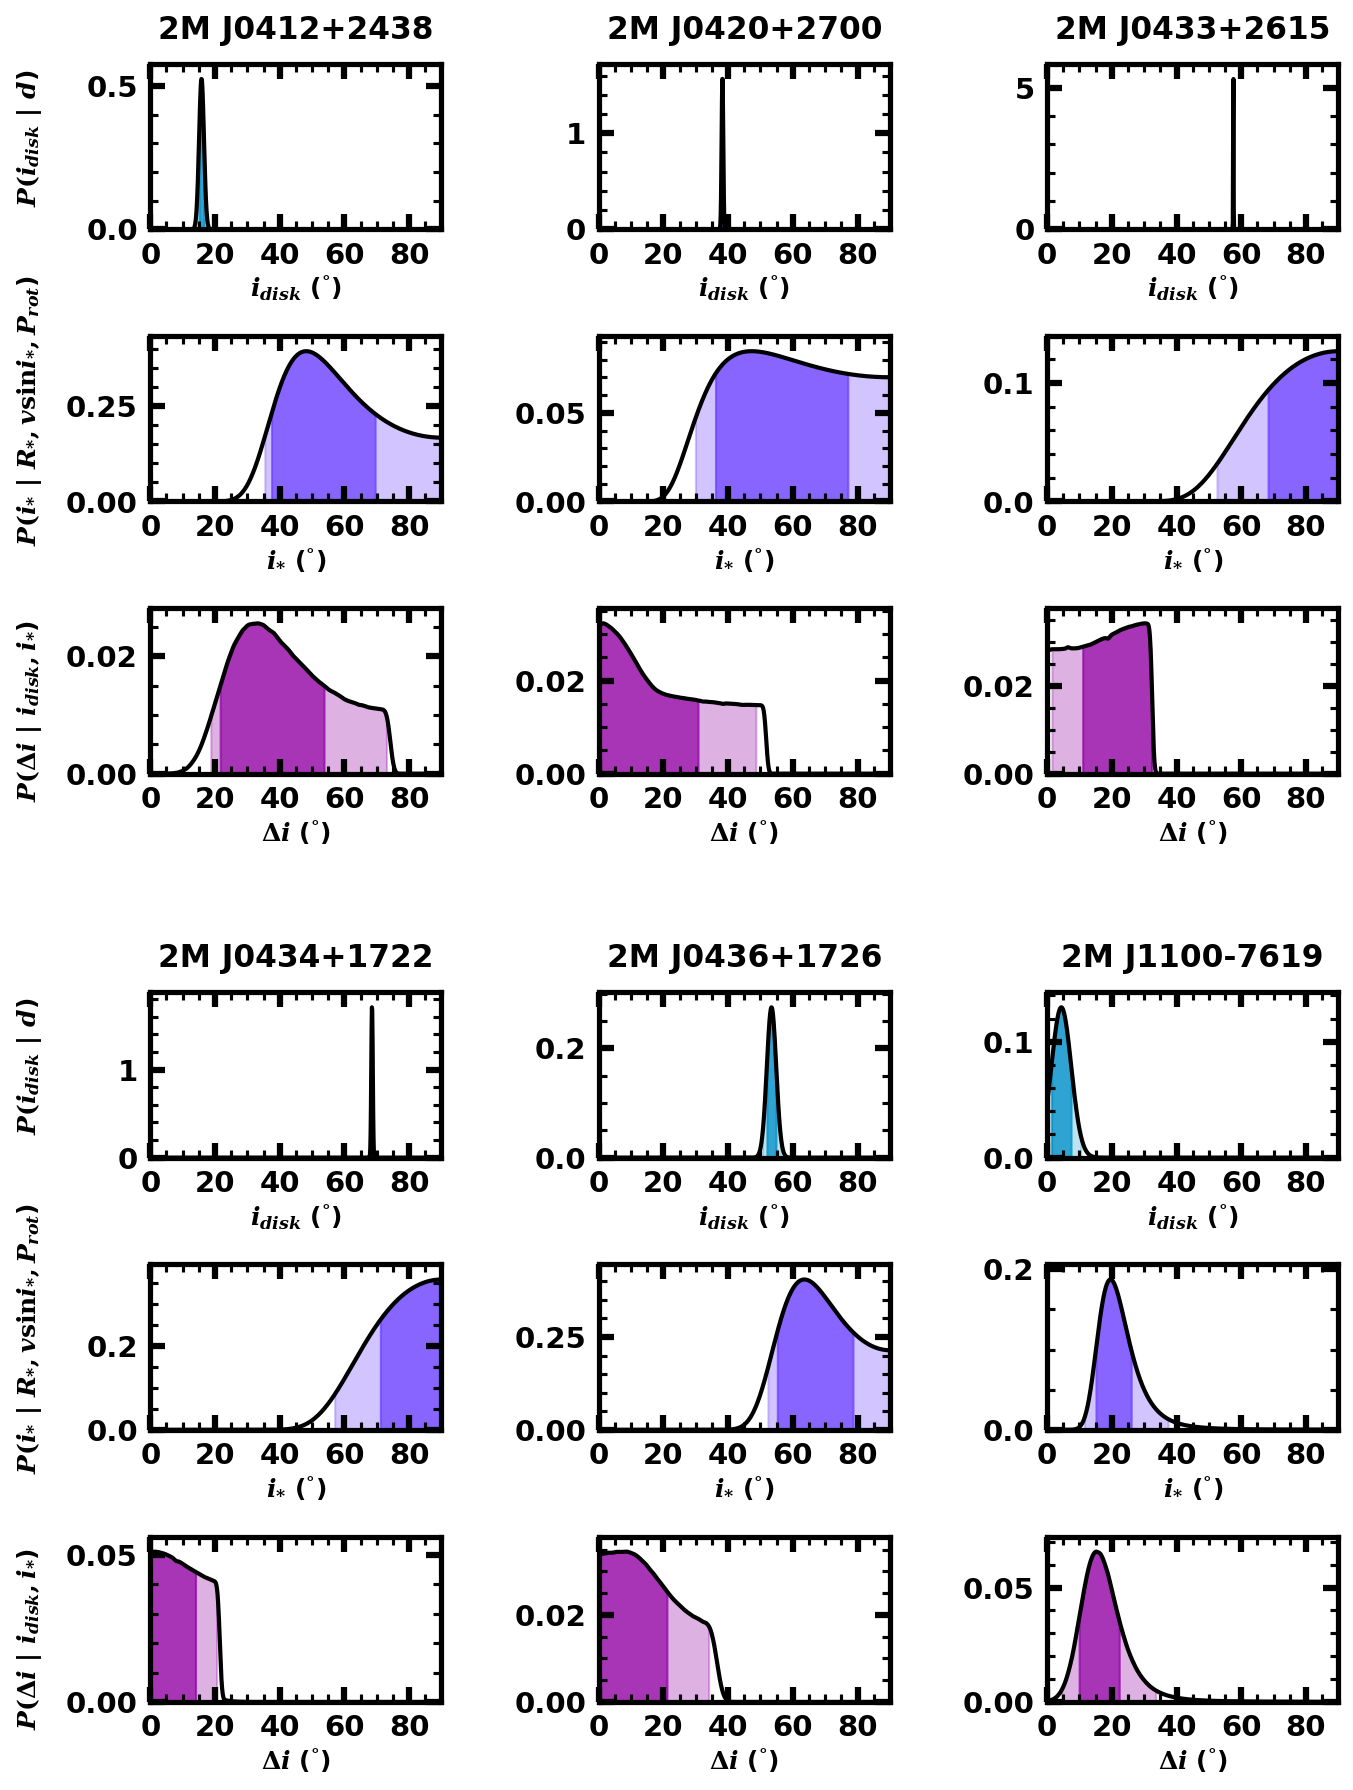

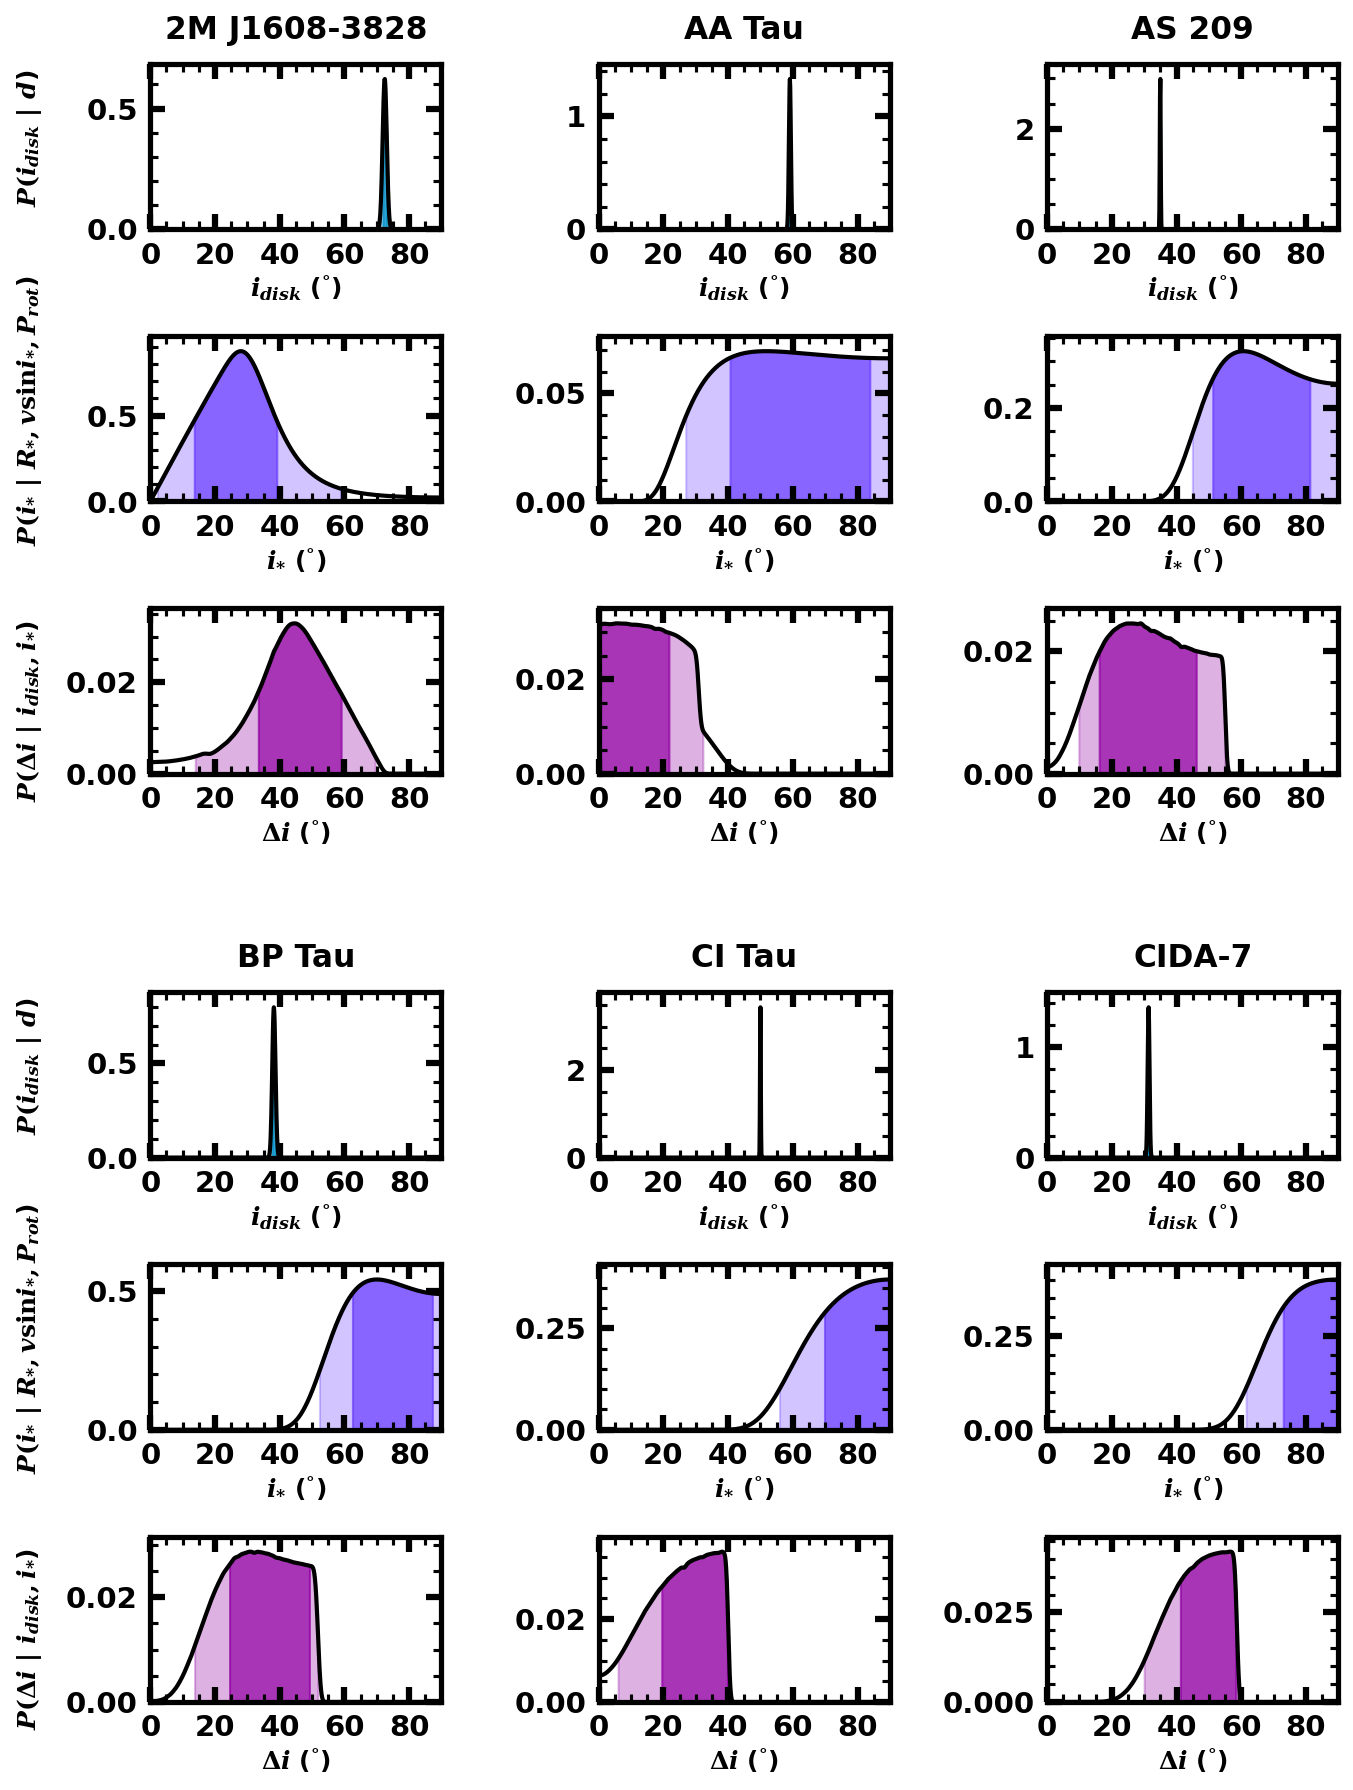

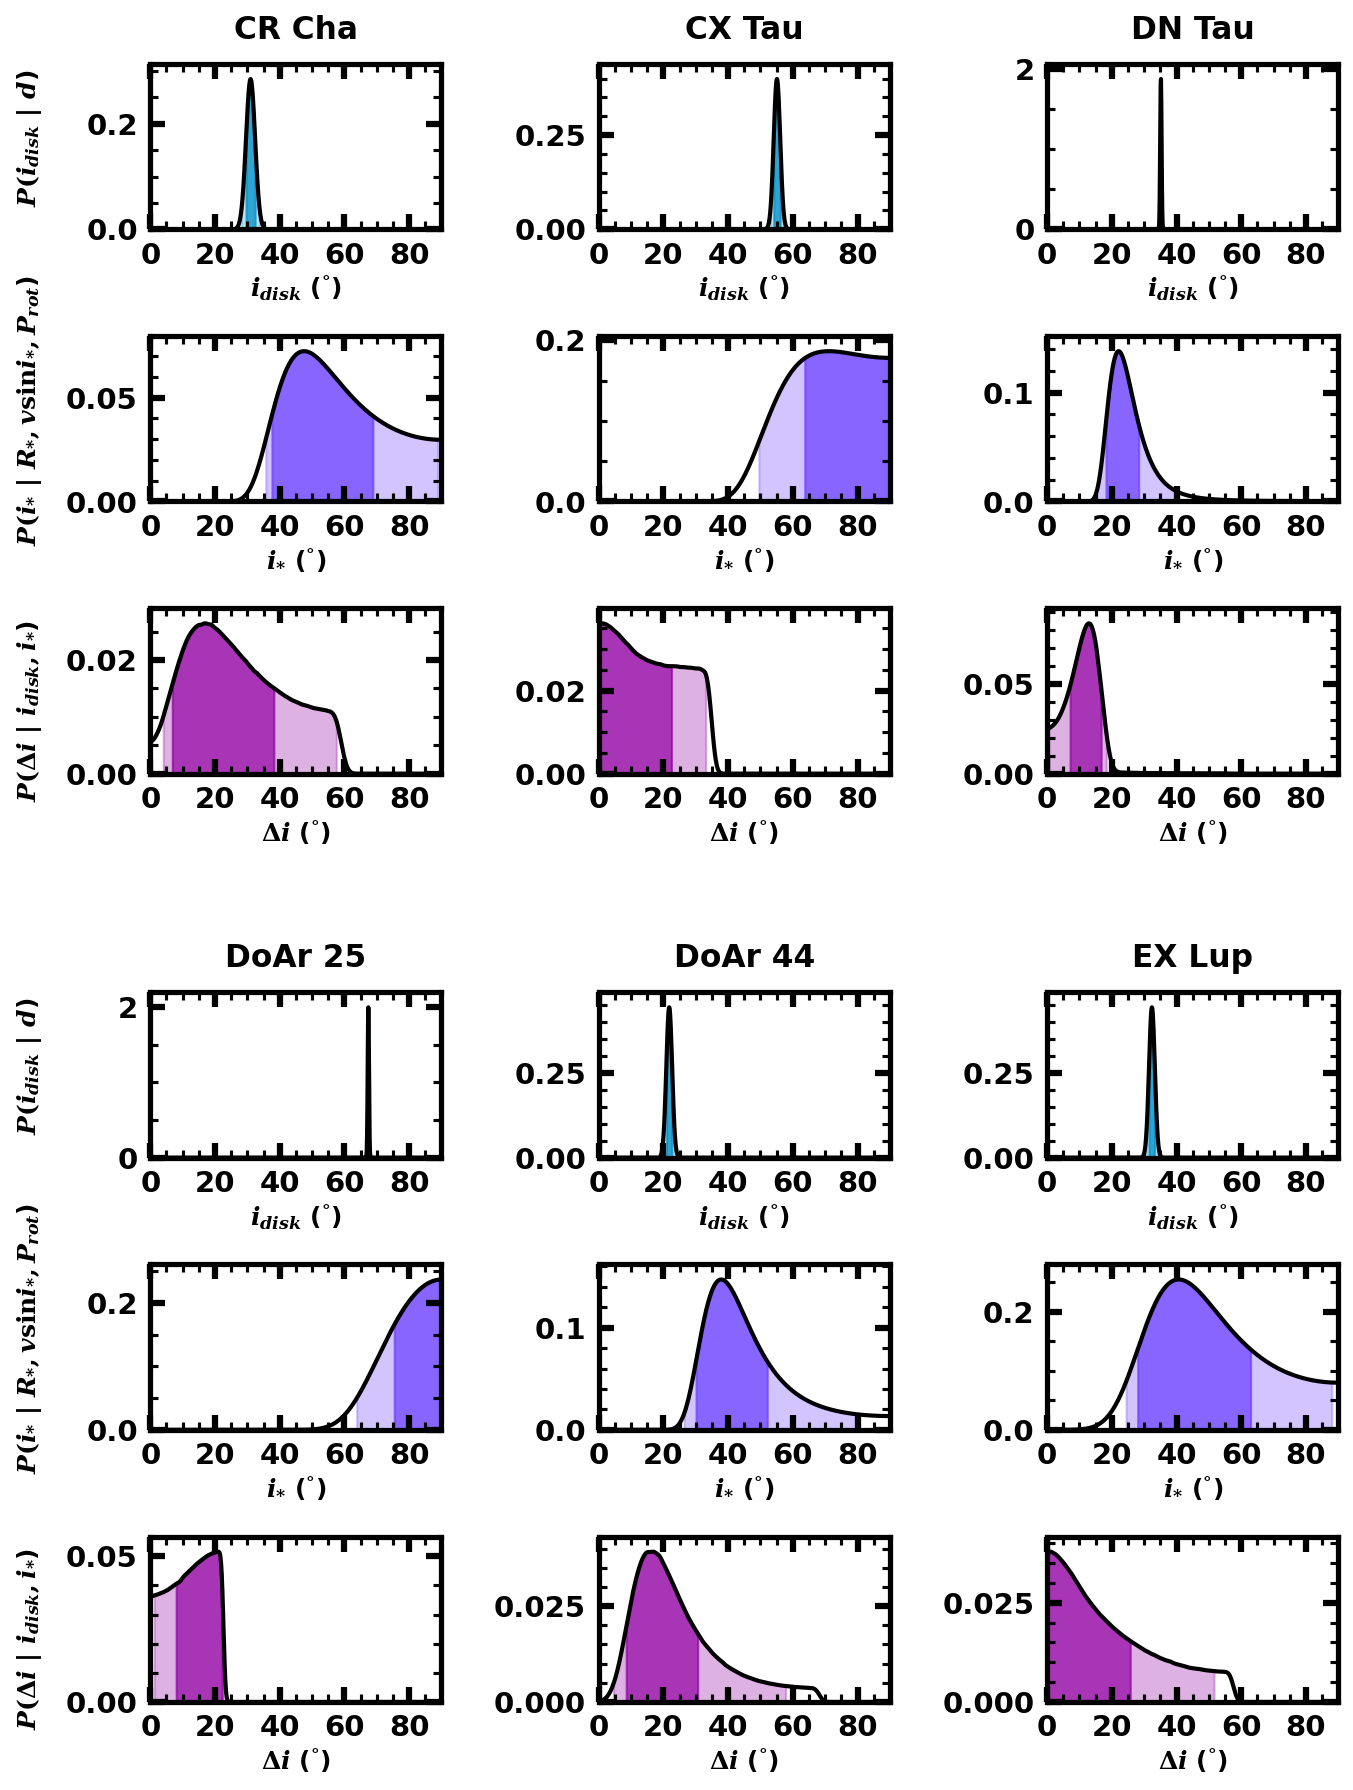

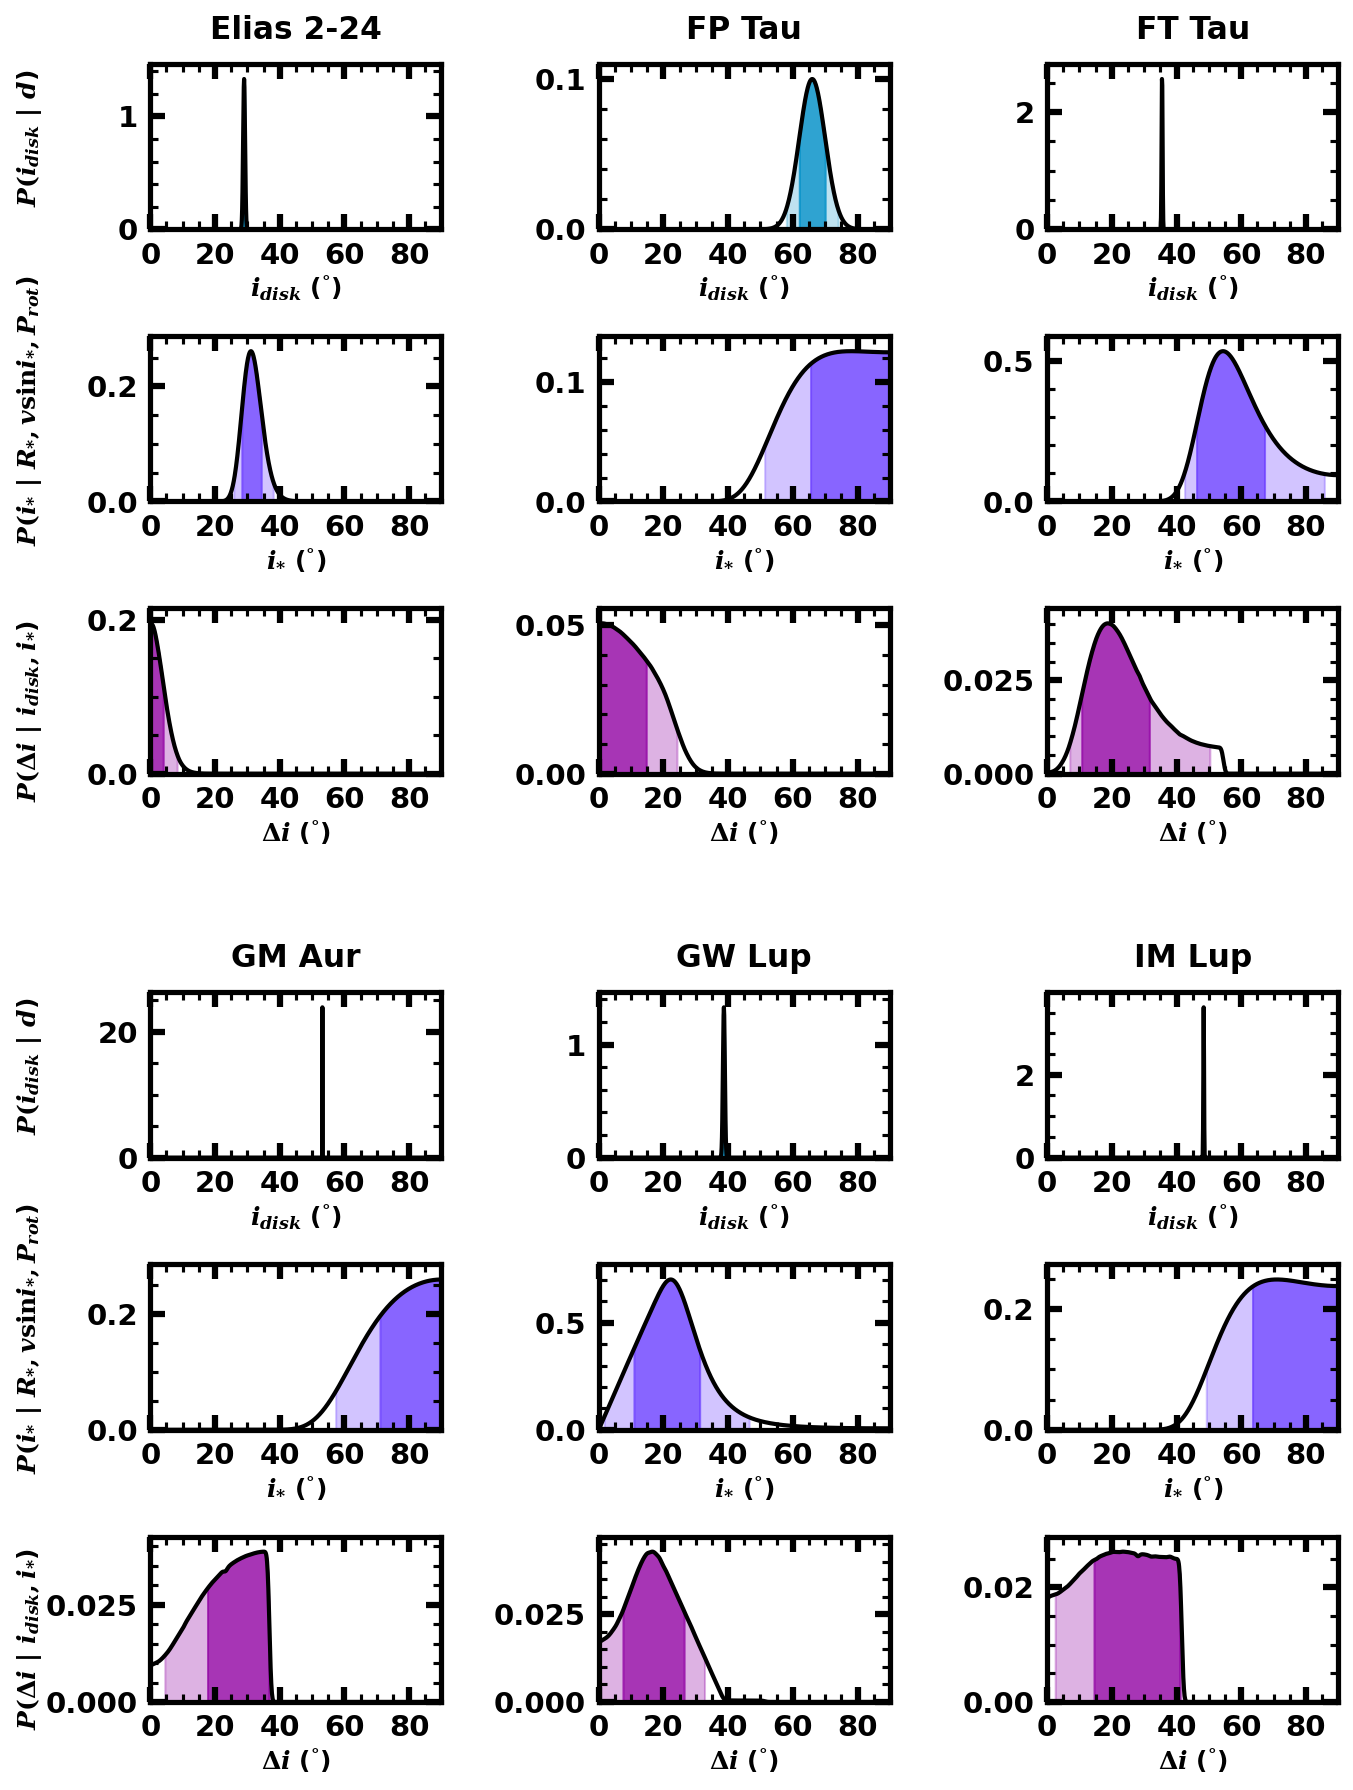

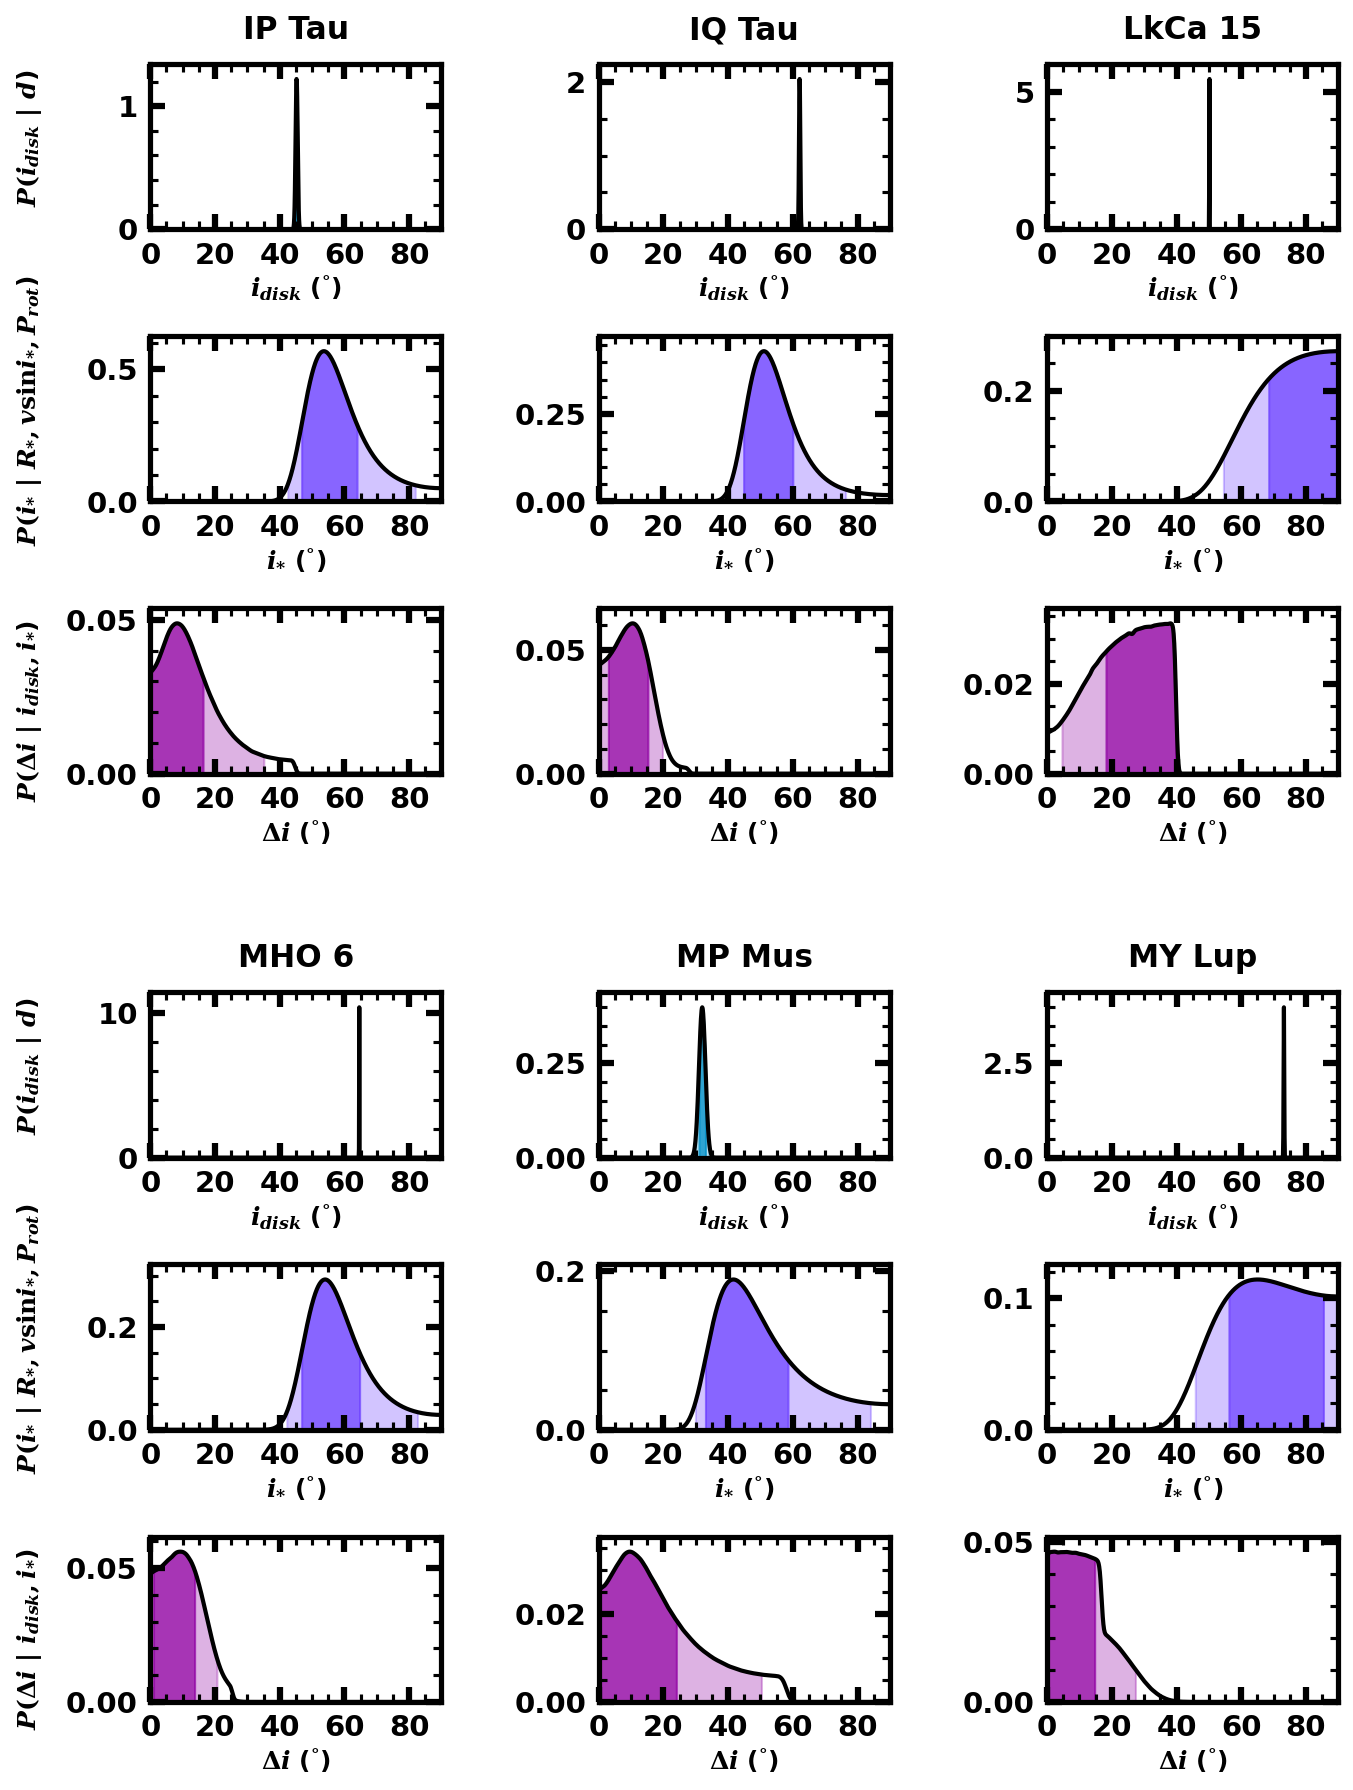

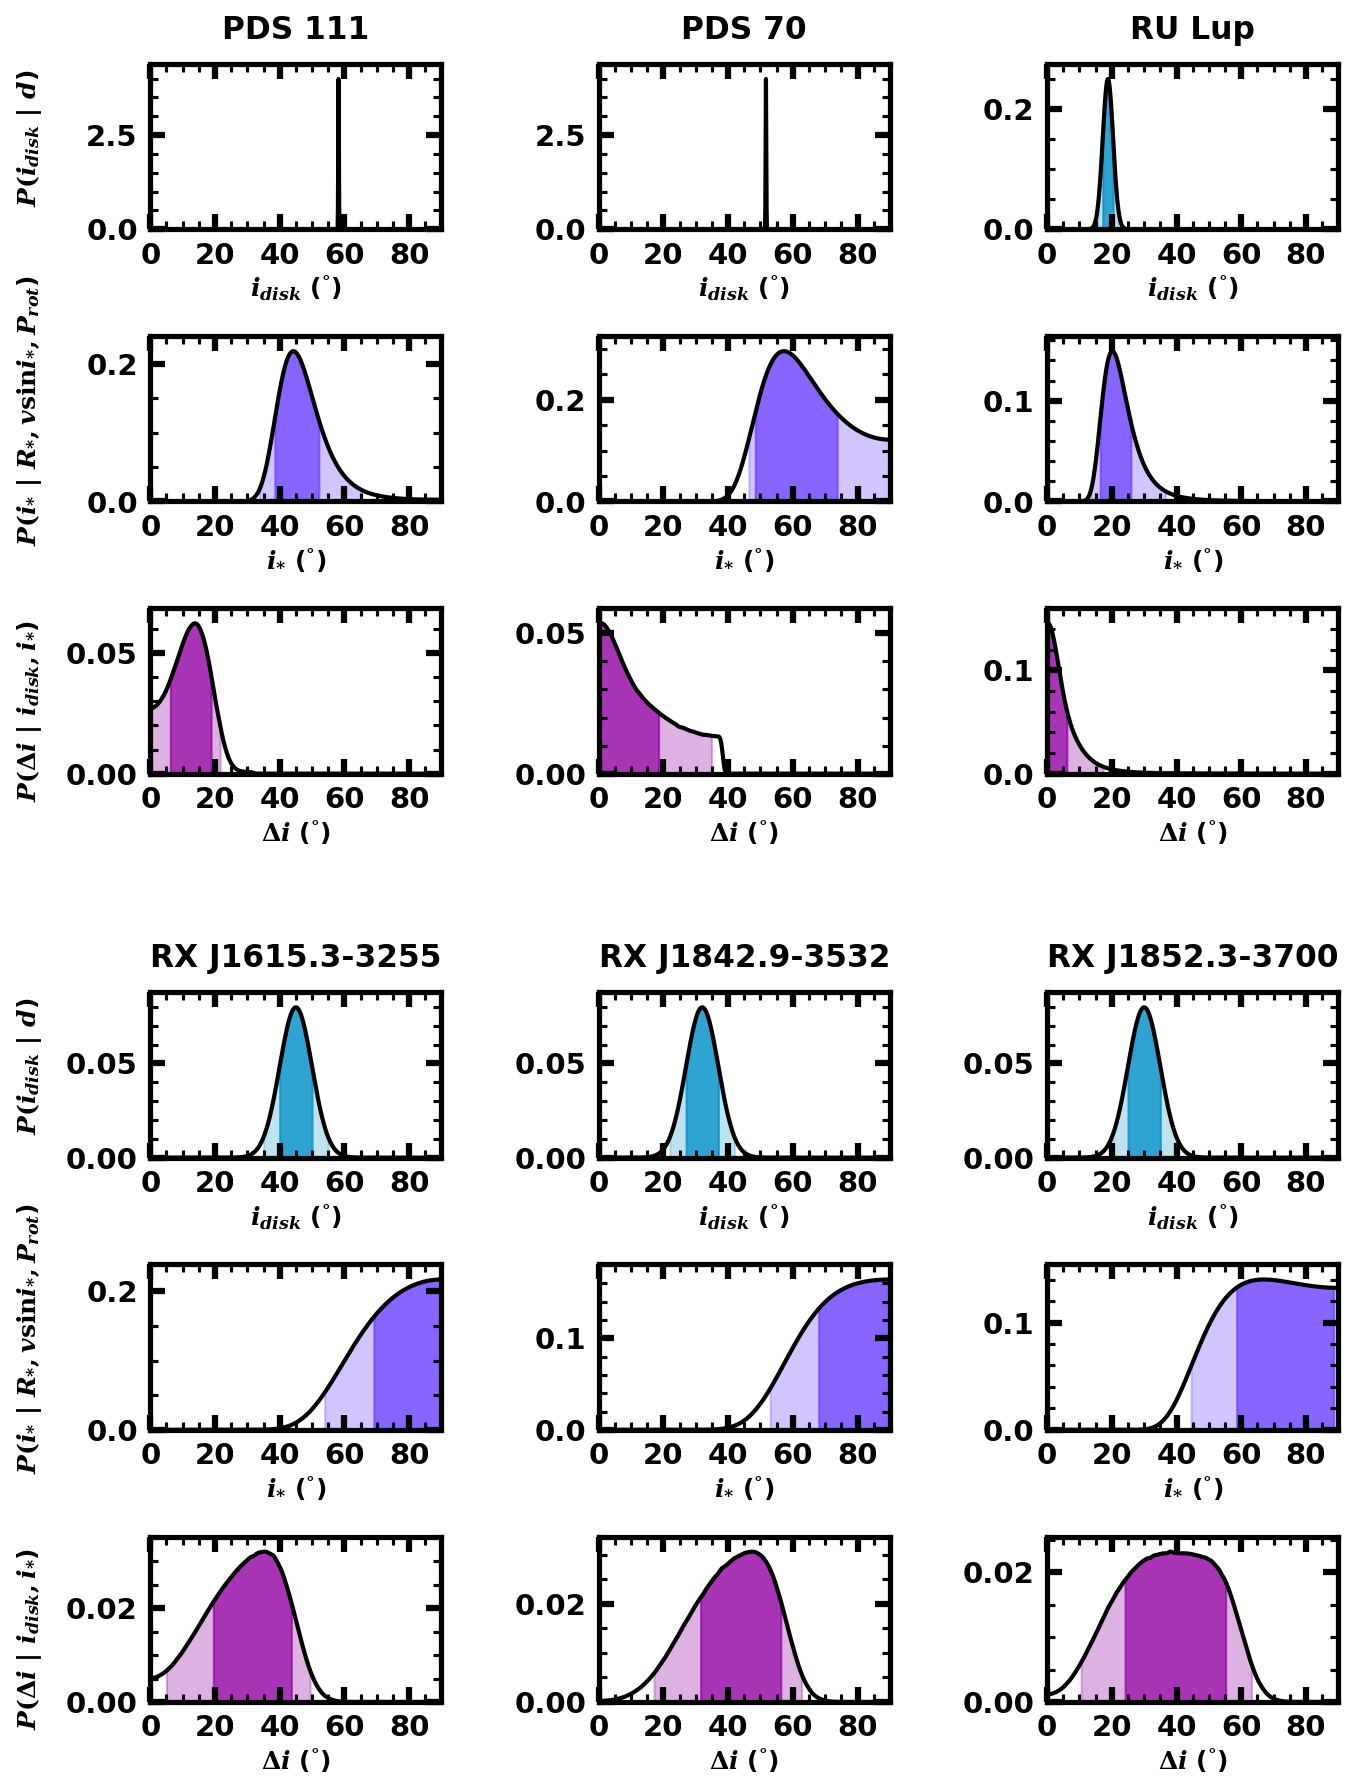

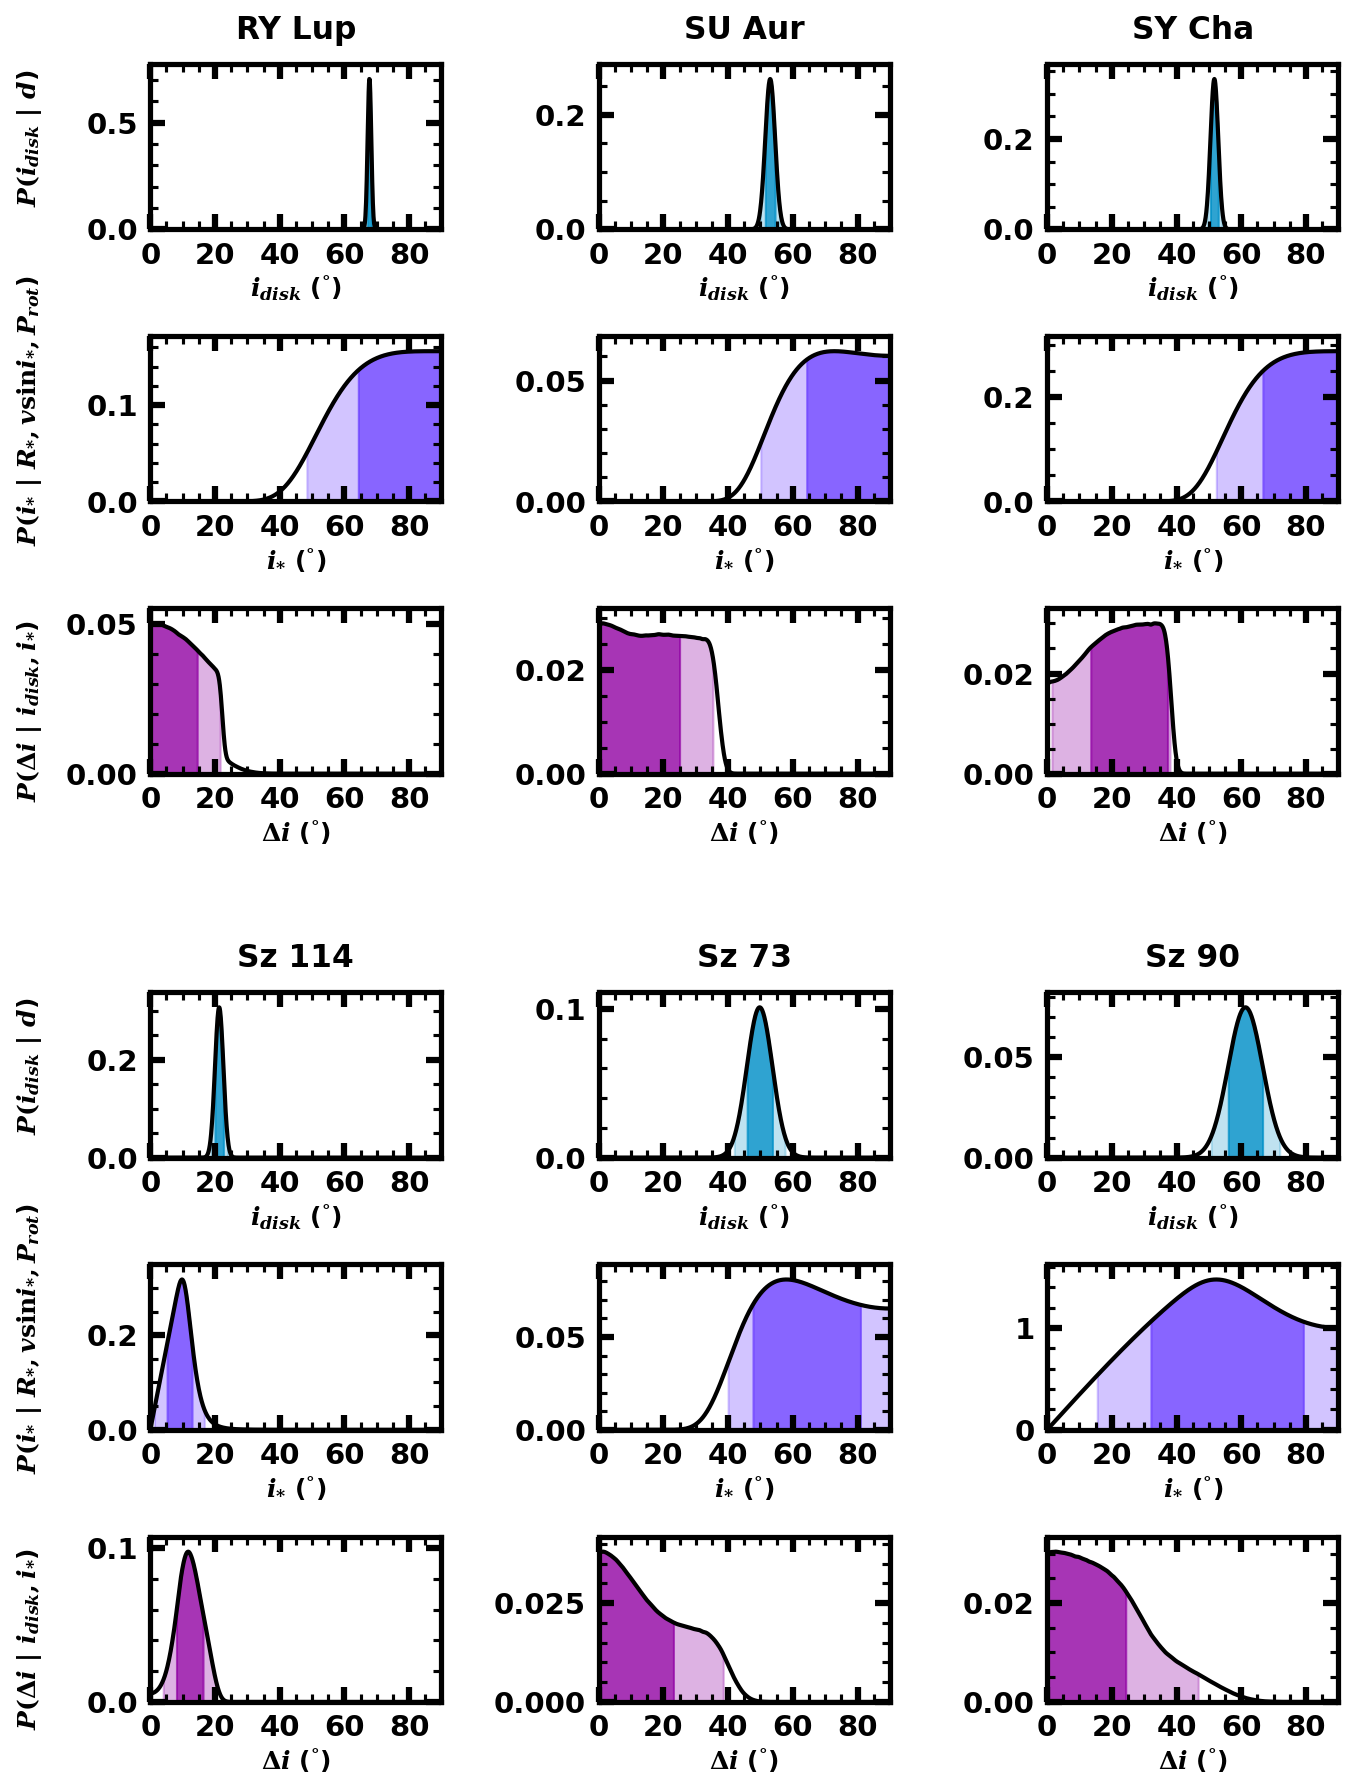

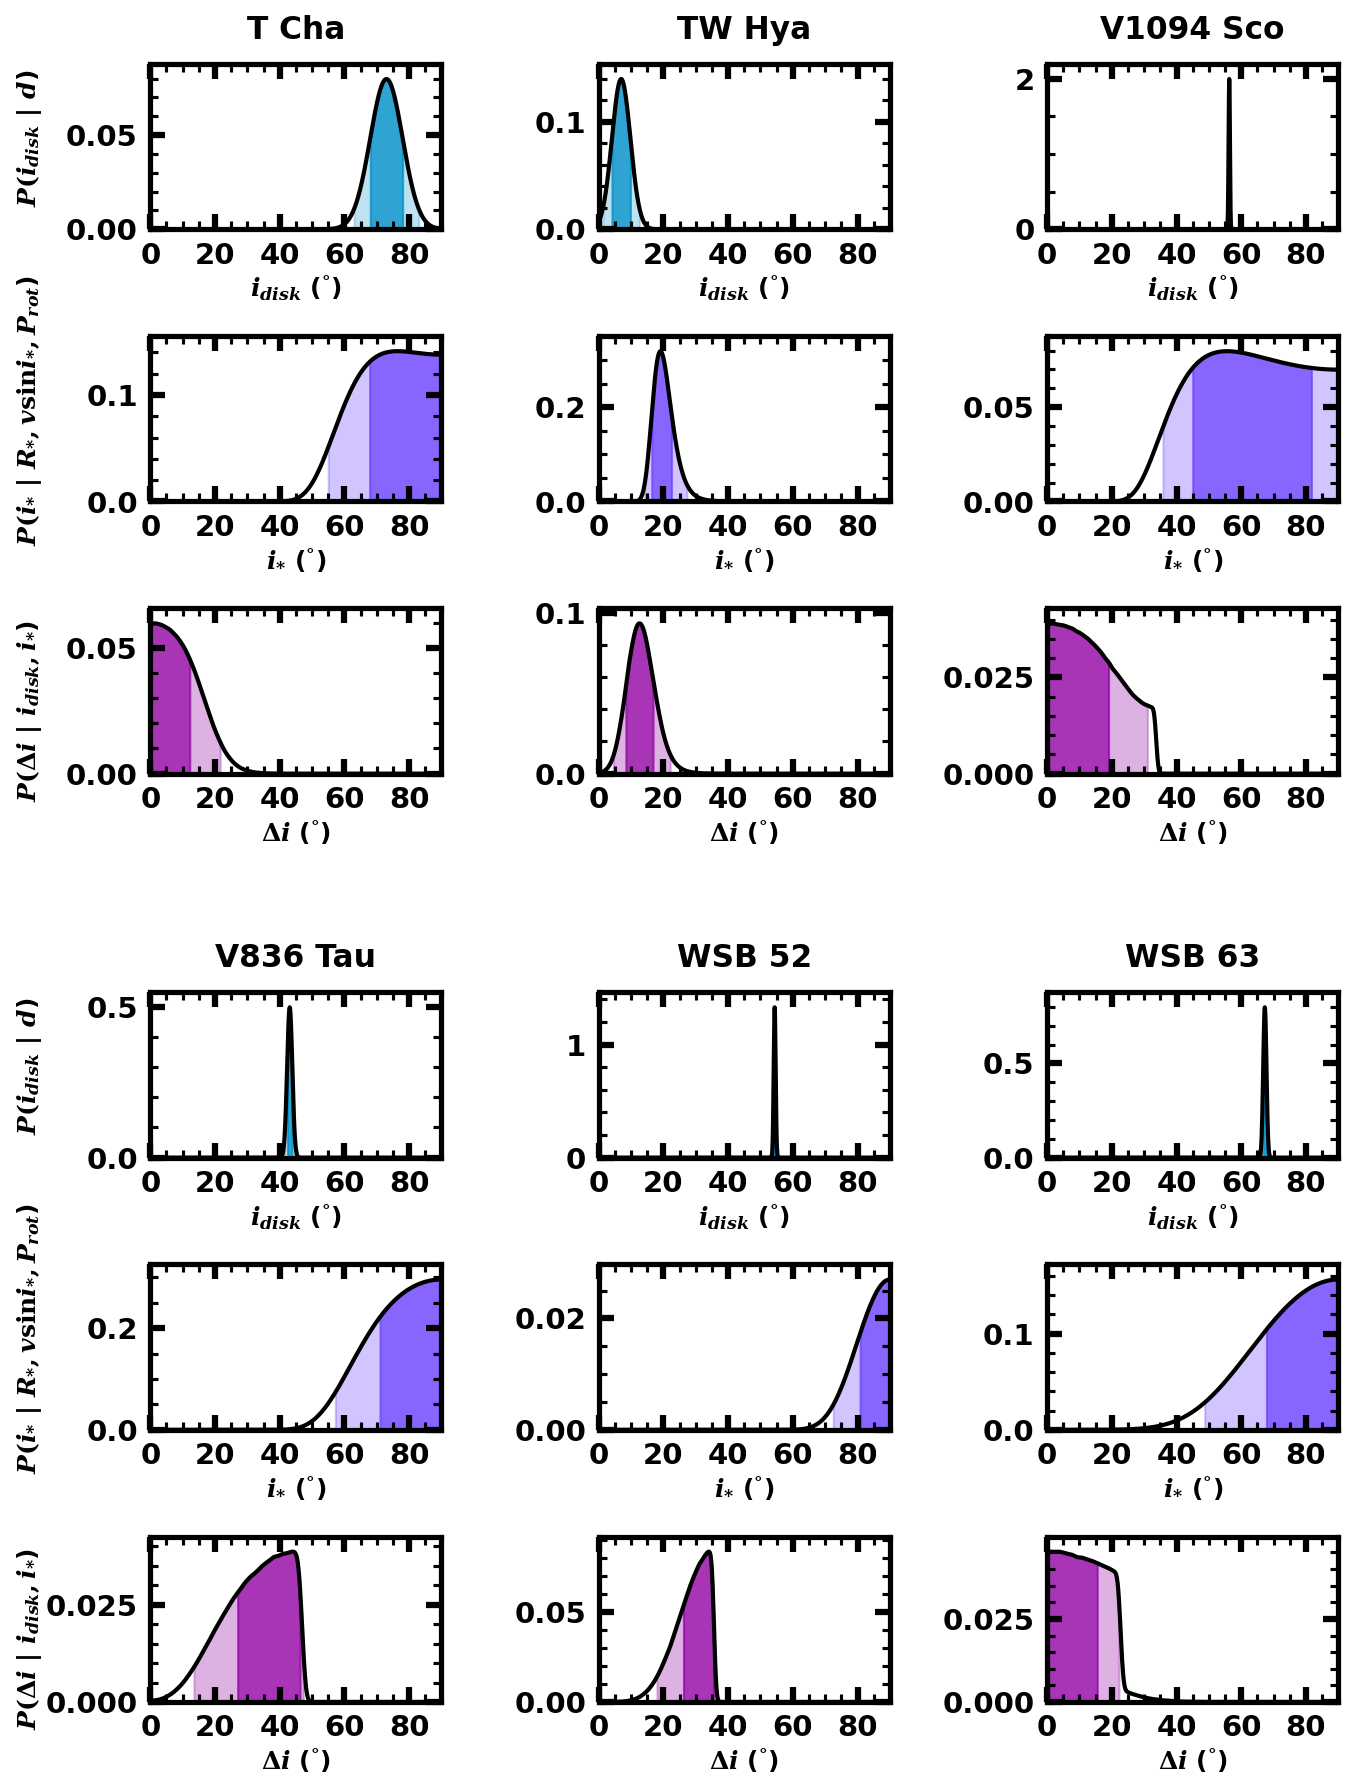

In [747]:
title_fontsize = 15 
label_fontsize = 12
tick_fontsize = 11
targetlabel_fontsize = 12

title_weight = 'semibold'

title_pad = 12  # 4
label_pad = 1.5  # 4

ccombonum = 11

if ccombonum == 1:
    ccombo = ['#29a366', '#003366', '#007399']
elif ccombonum == 2:
    ccombo = ['#2eb8b8', '#aa80ff', '#660066']
elif ccombonum == 3:
    ccombo = ['#6d931f', '#4d0019', '#007399']
elif ccombonum == 4:
    ccombo = ['#6699ff', '#aa80ff', '#660066']
elif ccombonum == 5:
    ccombo = ['#00b3b3', '#7300e6', '#b30059']
elif ccombonum == 6:
    ccombo = ['#00dec4', '#7800cc', '#990033']
elif ccombonum == 7:
    ccombo = ['#004080', '#7800cc', '#a9007b'] 
elif ccombonum == 8:
    ccombo = ['#004080', '#351fff', '#7800cc'] 
elif ccombonum == 9:
    ccombo = ['#004080', '#5a57ff', '#7800cc'] 
elif ccombonum == 10:
    ccombo = ['#0094f0', '#5a57ff', '#ad0071'] 
elif ccombonum == 11:
    ccombo = ['#008fc7', '#6a3dff', '#9000a3'] 

i_disk_fill_color = ccombo[0]
i_star_fill_color = ccombo[1]
Delta_i_fill_color = ccombo[2]




setnum = 0


frame_numbers_on = False


sig1_widths = []

misaligned10_90percent_confidence = []
misaligned10_80percent_confidence = []

misaligned20_90percent_confidence = []
misaligned20_80percent_confidence = []


fig_height = 12
fig_width = 9.0

distribution_linewidths = 2

target_list = df_adopted['Simbad Name'].values
print(len(target_list))

target_sets = []
set_len = 6
trgt_i = 0
while trgt_i < len(target_list):
    if trgt_i + set_len < len(target_list):
        target_set = target_list[trgt_i:trgt_i + set_len]
    else:
        target_set = target_list[trgt_i::]
    target_sets.append(target_set)
    trgt_i += 6

# print(target_sets)

set_col_axes = [['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i'],
                ['j', 'k', 'l'], ['m', 'n', 'o'], ['p', 'q', 'r']]

for targ_set_i in range(len(target_sets)):
# for targ_set_i in range(1):

    targ_set = target_sets[targ_set_i]

    targ_titles = []
    for set_element in targ_set:
        if '2MASS' in set_element:
            if '+' in set_element[5:]:
                split1 = set_element[5:].split('+')[0].replace(' ', '')[0:5]
                split2 = '+' + set_element[5:].split('+')[1].replace(' ', '')[0:4]
            if '-' in set_element[5:]:
                split1 = set_element[5:].split('-')[0].replace(' ', '')[0:5]
                split2 = '-' + set_element[5:].split('-')[1].replace(' ', '')[0:4]
            targ_titles.append('2M ' + split1 + split2)
        else:
            targ_titles.append(set_element)

    fig = plt.figure(figsize=(fig_width, fig_height), dpi=150)
    axes = fig.subplot_mosaic(
        """
        adg
        beh
        cfi
        ...
        jmp
        knq
        lor
        """,
        gridspec_kw={'height_ratios': [1, 1, 1, 0.03, 1, 1, 1], 'width_ratios': [1, 1, 1], "bottom": 0.05, "top": 0.96, "left": 0.11, "right": 0.99, "wspace": 0.54, "hspace": 0.75,}
    )

    for ax in axes.keys():
        axes[ax].minorticks_on()
        axes[ax].set_rasterized(True)

        for spine in axes[ax].spines.values():
            spine.set_linewidth(2.5)

        # SPECIFY THE X TICKS
        xticks = [0, 20, 40, 60, 80]
        xticklabels = [str(int(xtick)) for xtick in xticks]
        axes[ax].set_xticks(xticks)
        axes[ax].set_xticklabels(xticklabels)
        axes[ax].set_xlim(0, 90)

    axes['a'].set_ylabel(r'$P(i_{disk}$ | $d$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['b'].set_ylabel(r'$P(i_{*}$ | $R_{*}, v\mathrm{sin}i_{*}, P_{rot}$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['c'].set_ylabel(r'$P(\Delta i$ | $i_{disk}, i_{*}$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['j'].set_ylabel(r'$P(i_{disk}$ | $d$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['k'].set_ylabel(r'$P(i_{*}$ | $R_{*}, v\mathrm{sin}i_{*}, P_{rot}$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['l'].set_ylabel(r'$P(\Delta i$ | $i_{disk}, i_{*}$)', fontsize=label_fontsize, labelpad=label_pad)

    axes['a'].yaxis.set_label_coords(-0.365, 0.55)
    axes['b'].yaxis.set_label_coords(-0.365, 0.55)
    axes['c'].yaxis.set_label_coords(-0.365, 0.38)
    axes['j'].yaxis.set_label_coords(-0.365, 0.55)
    axes['k'].yaxis.set_label_coords(-0.365, 0.55)
    axes['l'].yaxis.set_label_coords(-0.365, 0.38)

    axes['a'].set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['d'].set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['g'].set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['j'].set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['m'].set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['p'].set_xlabel(r'$i_{disk}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)

    axes['b'].set_xlabel(r'$i_{*}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['e'].set_xlabel(r'$i_{*}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['h'].set_xlabel(r'$i_{*}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['k'].set_xlabel(r'$i_{*}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['n'].set_xlabel(r'$i_{*}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['q'].set_xlabel(r'$i_{*}$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)

    axes['c'].set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['f'].set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['i'].set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['l'].set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['o'].set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)
    axes['r'].set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=label_fontsize, labelpad=label_pad)

    if len(targ_titles) == 6:
        axes['a'].set_title(targ_titles[0], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['d'].set_title(targ_titles[1], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['g'].set_title(targ_titles[2], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['j'].set_title(targ_titles[3], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['m'].set_title(targ_titles[4], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['p'].set_title(targ_titles[5], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
    elif len(targ_titles) == 5:
        axes['a'].set_title(targ_titles[0], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['d'].set_title(targ_titles[1], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['g'].set_title(targ_titles[2], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['j'].set_title(targ_titles[3], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['m'].set_title(targ_titles[4], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
    elif len(targ_titles) == 4:
        axes['a'].set_title(targ_titles[0], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['d'].set_title(targ_titles[1], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['g'].set_title(targ_titles[2], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['j'].set_title(targ_titles[3], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
    elif len(targ_titles) == 3:
        axes['a'].set_title(targ_titles[0], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['d'].set_title(targ_titles[1], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['g'].set_title(targ_titles[2], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
    elif len(targ_titles) == 2:
        axes['a'].set_title(targ_titles[0], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
        axes['d'].set_title(targ_titles[1], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)
    elif len(targ_titles) == 1:
        axes['a'].set_title(targ_titles[0], fontsize=title_fontsize, pad=title_pad, fontweight=title_weight)




    for set_element_i in range(len(targ_set)):

        simbad_name = targ_set[set_element_i]

        target_str = targ_set[set_element_i].replace(' ', '')
        if '/' in targ_set[set_element_i]:
            target_str = target_str.replace('/', '-')
        

        Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
        i_values = Pdensity['i (deg)'].values

        P_i_disk = Pdensity['P(i Disk | d)'].values
        MAP_i_disk = Pdensity['i Disk MAP'].values[0]
        sig1_m_i_disk = Pdensity['i Disk -Unc1'].values[0]
        sig1_p_i_disk = Pdensity['i Disk +Unc1'].values[0]
        sig2_m_i_disk = Pdensity['i Disk -Unc2'].values[0]
        sig2_p_i_disk = Pdensity['i Disk +Unc2'].values[0]

        P_i_star = Pdensity['P(i Star | d)'].values
        MAP_i_star = Pdensity['i Star MAP'].values[0]
        sig1_m_i_star = Pdensity['i Star -Unc1'].values[0]
        sig1_p_i_star = Pdensity['i Star +Unc1'].values[0]
        sig2_m_i_star = Pdensity['i Star -Unc2'].values[0]
        sig2_p_i_star = Pdensity['i Star +Unc2'].values[0]

        P_Delta_i = Pdensity['P(Delta i | d)'].values
        MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
        sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
        sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
        sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
        sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]


        set_col_ax = set_col_axes[set_element_i]

        alpha_sig2 = 0.25
        alpha_sig1 = 1 - alpha_sig2

        axes[set_col_ax[0]].plot(i_values, P_i_disk, color='#000000', lw=distribution_linewidths, zorder=4)
        where_sig1 = np.where((i_values >= MAP_i_disk - sig1_m_i_disk) & (i_values <= MAP_i_disk + sig1_p_i_disk))[0]
        where_sig2 = np.where((i_values >= MAP_i_disk - sig2_m_i_disk) & (i_values <= MAP_i_disk + sig2_p_i_disk))[0]
        axes[set_col_ax[0]].fill_between(x=i_values[where_sig1], y1=P_i_disk[where_sig1], color=i_disk_fill_color, alpha=alpha_sig1, zorder=-1)
        axes[set_col_ax[0]].fill_between(x=i_values[where_sig2], y1=P_i_disk[where_sig2], color=i_disk_fill_color, alpha=alpha_sig2, zorder=-1)
        axes[set_col_ax[0]].set_ylim(0, 1.10*max(P_i_disk))

        alpha_sig2 = 0.3
        alpha_sig1 = 1 - alpha_sig2

        axes[set_col_ax[1]].plot(i_values, P_i_star, color='#000000', lw=distribution_linewidths, zorder=4)
        where_sig1 = np.where((i_values >= MAP_i_star - sig1_m_i_star) & (i_values <= MAP_i_star + sig1_p_i_star))[0]
        where_sig2 = np.where((i_values >= MAP_i_star - sig2_m_i_star) & (i_values <= MAP_i_star + sig2_p_i_star))[0]
        axes[set_col_ax[1]].fill_between(x=i_values[where_sig1], y1=P_i_star[where_sig1], color=i_star_fill_color, alpha=alpha_sig1, zorder=-1)
        axes[set_col_ax[1]].fill_between(x=i_values[where_sig2], y1=P_i_star[where_sig2], color=i_star_fill_color, alpha=alpha_sig2, zorder=-1)
        axes[set_col_ax[1]].set_ylim(0, 1.10*max(P_i_star))

        alpha_sig2 = 0.3
        alpha_sig1 = 1 - alpha_sig2

        axes[set_col_ax[2]].plot(i_values, P_Delta_i, color='#000000', lw=distribution_linewidths, zorder=4)
        where_sig1 = np.where((i_values >= MAP_Delta_i - sig1_m_Delta_i) & (i_values <= MAP_Delta_i + sig1_p_Delta_i))[0]
        where_sig2 = np.where((i_values >= MAP_Delta_i - sig2_m_Delta_i) & (i_values <= MAP_Delta_i + sig2_p_Delta_i))[0]
        i_MAP = i_values[P_Delta_i == max(P_Delta_i)]
        axes[set_col_ax[2]].fill_between(x=i_values[where_sig1], y1=P_Delta_i[where_sig1], color=Delta_i_fill_color, alpha=alpha_sig1, zorder=-1)
        axes[set_col_ax[2]].fill_between(x=i_values[where_sig2], y1=P_Delta_i[where_sig2], color=Delta_i_fill_color, alpha=alpha_sig2, zorder=-1)
        axes[set_col_ax[2]].set_ylim(0, 1.10*max(P_Delta_i))


    fig.savefig(test_figures_directory + 'Posteriors' + str(targ_set_i+1) + '.pdf', dpi=300, transparent=False)
    plt.show()
    plt.close()


# Final Statistics

2     2MASS J04334465+2615005
3     2MASS J04343128+1722201
10                     CI Tau
11                     CIDA-7
15                    DoAr 25
21                     GM Aur
26                    LkCa 15
33            RX J1615.3-3255
34            RX J1842.9-3532
36                     RY Lup
38                     SY Cha
45                   V836 Tau
46                     WSB 52
47                     WSB 63
Name: Simbad Name, dtype: object


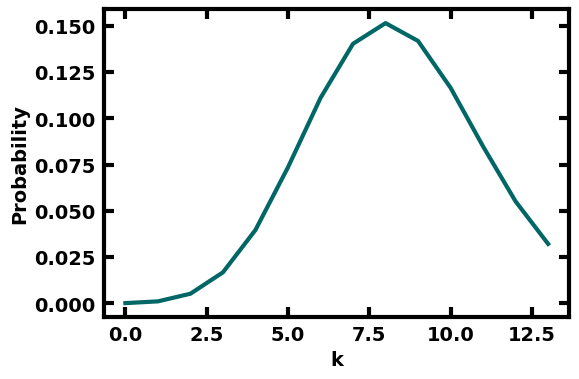

number of high incl stars:  14
fraction of sample: 14/48 = 0.292
expectation value for random orientations: 0.174 * 48 = 8.352
k =  14
N =  48
Probability =  0.047


In [748]:
high_inclination_stars = df_adopted[df_adopted['i star (deg)'] > 80]
num_istars_gt_80 = len(high_inclination_stars)
num_istars = len(df_adopted)

print(high_inclination_stars['Simbad Name'])

k_values = np.arange(0, (num_istars_gt_80 - 1) + 1, 1)
p = 0.174
n = num_istars


Prob_k_given_p_and_n = []
for k_i, k in enumerate(k_values):
    Prob_k = (factorial(n) / (factorial(k) * factorial(n - k))) * p**k * (1. - p)**(n - k)
    Prob_k_given_p_and_n.append(Prob_k)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)

ax.plot(k_values, np.array(Prob_k_given_p_and_n), lw=3)

plt.show()
plt.close()

sum_of_Prob_k_given_p_and_n = np.trapz(y=Prob_k_given_p_and_n, x=k_values)

Prob = round(1. - sum_of_Prob_k_given_p_and_n, 3)

print('number of high incl stars: ', num_istars_gt_80)
print('fraction of sample: {:d}/{:d} = {:.3f}'.format(num_istars_gt_80, num_istars, num_istars_gt_80/num_istars))
print('expectation value for random orientations: 0.174 * {:d} = {:.3f}'.format(num_istars, 0.174*(num_istars)))

print('k = ', num_istars_gt_80)
print('N = ', num_istars)
print('Probability = ', Prob)



In [749]:
def determine_misalignment(param_x, pdf_y, threshold):

    param_x_above = param_x[param_x >= threshold]
    pdf_y_above = pdf_y[param_x >= threshold]

    area_under_above = np.trapz(y=pdf_y_above, x=param_x_above)
    area_under_full = np.trapz(y=pdf_y, x=param_x)

    # print('AREA BEYOND THRESHOLD: ', area_under_above)
    # print('SANITY CHECK: ', area_under_full)

    return area_under_above/area_under_full

def determine_alignment(param_x, pdf_y, threshold):

    param_x_below = param_x[param_x < threshold]
    pdf_y_below = pdf_y[param_x < threshold]

    area_under_below = np.trapz(y=pdf_y_below, x=param_x_below)
    area_under_full = np.trapz(y=pdf_y, x=param_x)

    # print('AREA BEYOND THRESHOLD: ', area_under_below)
    # print('SANITY CHECK: ', area_under_full)

    return area_under_below/area_under_full



In [750]:
misaligned10_90percent_confidence = []
misaligned10_80percent_confidence = []

misaligned15_90percent_confidence = []
misaligned15_80percent_confidence = []

misaligned20_90percent_confidence = []
misaligned20_80percent_confidence = []


test_df = df_adopted
sample_size = len(test_df['Simbad Name'].values)


for target_i in range(sample_size):

    target_str = test_df['Simbad Name'].values[target_i].replace(' ', '')
    if '/' in test_df['Simbad Name'].values[target_i]:
        target_str = target_str.replace('/', '-')


    Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
    i_values = Pdensity['i (deg)'].values

    P_Delta_i = Pdensity['P(Delta i | d)'].values
    MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
    sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
    sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
    sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
    sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]


    P_Delta_i = P_Delta_i/(sum(P_Delta_i)*np.diff(i_values)[0])

    # print('\n', target_str)
    # print('MAP VALUE:  ', MAP_Delta_i)

    if MAP_Delta_i >= 10:
        confidence_level_gt_10 = determine_misalignment(param_x=i_values, pdf_y=P_Delta_i, threshold=10)

        if confidence_level_gt_10 >= 0.90:
            if target_str not in misaligned10_90percent_confidence:
                misaligned10_90percent_confidence.append(target_str)
        if (confidence_level_gt_10 >= 0.80):  #  and (confidence_level_gt_10 < 0.90):
            if target_str not in misaligned10_80percent_confidence:
                misaligned10_80percent_confidence.append(target_str)

        if MAP_Delta_i >= 15:
            confidence_level_gt_15 = determine_misalignment(param_x=i_values, pdf_y=P_Delta_i, threshold=15)
            if confidence_level_gt_15 >= 0.90:
                if target_str not in misaligned15_90percent_confidence:
                    misaligned15_90percent_confidence.append(target_str)
            if (confidence_level_gt_15 >= 0.80):  #  and (confidence_level_gt_15 < 0.90):
                if target_str not in misaligned15_80percent_confidence:
                    misaligned15_80percent_confidence.append(target_str)

        if MAP_Delta_i >= 20:
            confidence_level_gt_20 = determine_misalignment(param_x=i_values, pdf_y=P_Delta_i, threshold=20)

            if confidence_level_gt_20 >= 0.90:
                if target_str not in misaligned20_90percent_confidence:
                    misaligned20_90percent_confidence.append(target_str)
            if (confidence_level_gt_20 >= 0.80):  #  and (confidence_level_gt_20 < 0.90):
                if target_str not in misaligned20_80percent_confidence:
                    misaligned20_80percent_confidence.append(target_str)

In [751]:

misaligned10_90percent_confidence_fraction = round(len(misaligned10_90percent_confidence)/sample_size, 2)
misaligned10_80percent_confidence_fraction = round(len(misaligned10_80percent_confidence)/sample_size, 2)

misaligned15_90percent_confidence_fraction = round(len(misaligned15_90percent_confidence)/sample_size, 2)
misaligned15_80percent_confidence_fraction = round(len(misaligned15_80percent_confidence)/sample_size, 2)

misaligned20_90percent_confidence_fraction = round(len(misaligned20_90percent_confidence)/sample_size, 2)
misaligned20_80percent_confidence_fraction = round(len(misaligned20_80percent_confidence)/sample_size, 2)


# print('TEST: ', test)
print(' ')
print(r'MISALIGNED >= 10 deg, 80% confidence:  ', misaligned10_80percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned10_80percent_confidence), sample_size))
print(r'MISALIGNED >= 15 deg, 80% confidence:  ', misaligned15_80percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned15_80percent_confidence), sample_size))
print(r'MISALIGNED >= 20 deg, 80% confidence:  ', misaligned20_80percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned20_80percent_confidence), sample_size))
print(' ')
print(r'MISALIGNED >= 10 deg, 90% confidence:  ', misaligned10_90percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned10_90percent_confidence), sample_size))
print(r'MISALIGNED >= 15 deg, 90% confidence:  ', misaligned15_90percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned15_90percent_confidence), sample_size))
print(r'MISALIGNED >= 20 deg, 90% confidence:  ', misaligned20_90percent_confidence_fraction, '{:d}/{:d}'.format(len(misaligned20_90percent_confidence), sample_size))
print(' ')
# print(misaligned10_90percent_confidence)
# print(misaligned10_80percent_confidence)

 
MISALIGNED >= 10 deg, 80% confidence:   0.4 19/48
MISALIGNED >= 15 deg, 80% confidence:   0.25 12/48
MISALIGNED >= 20 deg, 80% confidence:   0.17 8/48
 
MISALIGNED >= 10 deg, 90% confidence:   0.27 13/48
MISALIGNED >= 15 deg, 90% confidence:   0.17 8/48
MISALIGNED >= 20 deg, 90% confidence:   0.1 5/48
 


In [752]:
# target_nums = choices(np.arange(len(df_adopted['Simbad Name'].values)), k=1)[0]
# target_nums

df_adopted[['i disk (deg)', 'i disk Unc']]

i disk (deg)  i disk Unc
0         15.840       0.760
1         38.250       0.250
2         57.565       0.065
3         68.540       0.230
4         53.420       1.450
5          4.395       3.075
6         72.460       0.640
7         59.100       0.300
8         34.970       0.130
9         38.200       0.500
10        49.985       0.115
11        31.360       0.290
12        31.000       1.400
13        55.100       1.000
14        35.170       0.210
15        67.400       0.200
16        21.800       0.900
18        32.400       0.900
17        29.000       0.300
19        66.000       4.000
20        35.540       0.150
21        53.210       0.009
22        38.700       0.300
23        48.400       0.110
24        45.235       0.325
25        62.115       0.195
26        50.160       0.030
27        64.585       0.035
28        32.000       1.000
29        73.200       0.100
30        58.200       0.100
31        51.700       0.100
32        18.800       1.600
33        45.000       5.000
34        32.000       5.000
35        30.000       5.000
36        67.745       0.565
37        53.010       1.520
38        51.700       1.200
39        21.300       1.300
40        49.760       3.950
41        61.310       5.340
42        73.000       5.000
43         6.950       2.850
44        56.300       0.200
45        43.100       0.800
46        54.400       0.300
47        67.300       0.500

In [753]:
list_of_targets = []
list_of_posteriors = []
list_of_MAPS = []

for target_boop in range(sample_size):

    target_str = test_df['Simbad Name'].values[target_boop].replace(' ', '')
    if '/' in test_df['Simbad Name'].values[target_boop]:
        target_str = target_str.replace('/', '-')

    Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
    i_values_original = Pdensity['i (deg)'].values

    P_Delta_i_original = Pdensity['P(Delta i | d)'].values
    MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
    sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
    sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
    sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
    sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]

    i_values = np.arange(0,max(i_values)+0.001,0.001)

    P_Delta_i = np.interp(x=i_values, xp=i_values_original, fp=P_Delta_i_original)


    list_of_targets.append(target_str)
    list_of_posteriors.append(P_Delta_i)
    list_of_MAPS.append(MAP_Delta_i)
    

In [757]:
bep_iters = int(100000)  # int(200)
bep_iters2 = int(sample_size)

misaligned_10_fractions_c90 = []
misaligned_15_fractions_c90 = []
misaligned_20_fractions_c90 = []
misaligned_10_fractions_c80 = []
misaligned_15_fractions_c80 = []
misaligned_20_fractions_c80 = []


interp_i_values = np.arange(min(i_values), max(i_values)+0.1, 0.1)

for bep_iter in range(bep_iters):

    misaligned_10_c90 = 0
    misaligned_15_c90 = 0
    misaligned_20_c90 = 0
    misaligned_10_c80 = 0
    misaligned_15_c80 = 0
    misaligned_20_c80 = 0


    for target_n in range(bep_iters2):

        targ_draw = np.random.randint(0, 48, 1)[0]

        interp_distribution = np.interp(interp_i_values, xp=i_values, fp=list_of_posteriors[targ_draw])
        single_draw = choices(interp_i_values, interp_distribution, k=1)[0]
        test_i_values = interp_i_values 
        test_distribution = interp_distribution 


        if single_draw >= 10:
            confidence_level_gt_10 = determine_misalignment(param_x=test_i_values, pdf_y=test_distribution, threshold=10)
            if confidence_level_gt_10 >= 0.90:
                misaligned_10_c90 += 1
            if (confidence_level_gt_10 >= 0.80):  #  and (confidence_level_gt_10 < 0.80):
                misaligned_10_c80 += 1
        if single_draw >= 15:
            confidence_level_gt_15 = determine_misalignment(param_x=test_i_values, pdf_y=test_distribution, threshold=15)
            if confidence_level_gt_15 >= 0.90:
                misaligned_15_c90 += 1
            if (confidence_level_gt_15 >= 0.80):  #  and (confidence_level_gt_15 < 0.80):
                misaligned_15_c80 += 1
        if single_draw >= 20:
            confidence_level_gt_20 = determine_misalignment(param_x=test_i_values, pdf_y=test_distribution, threshold=20)
            if confidence_level_gt_20 >= 0.90:
                misaligned_20_c90 += 1
            if (confidence_level_gt_20 >= 0.80):  #  and (confidence_level_gt_20 < 0.80):
                misaligned_20_c80 += 1


    if np.mod(bep_iter+1, 1000) == 0:
        print(bep_iter+1)



    misaligned_10_fractions_c90.append(misaligned_10_c90 / bep_iters2)
    misaligned_15_fractions_c90.append(misaligned_15_c90 / bep_iters2)
    misaligned_20_fractions_c90.append(misaligned_20_c90 / bep_iters2)
    misaligned_10_fractions_c80.append(misaligned_10_c80 / bep_iters2)
    misaligned_15_fractions_c80.append(misaligned_15_c80 / bep_iters2)
    misaligned_20_fractions_c80.append(misaligned_20_c80 / bep_iters2)





1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000


 
-------------------------------------
Misaligned
38 +7 - 7
 
23 +7 - 5
 
16 +5 - 6
 


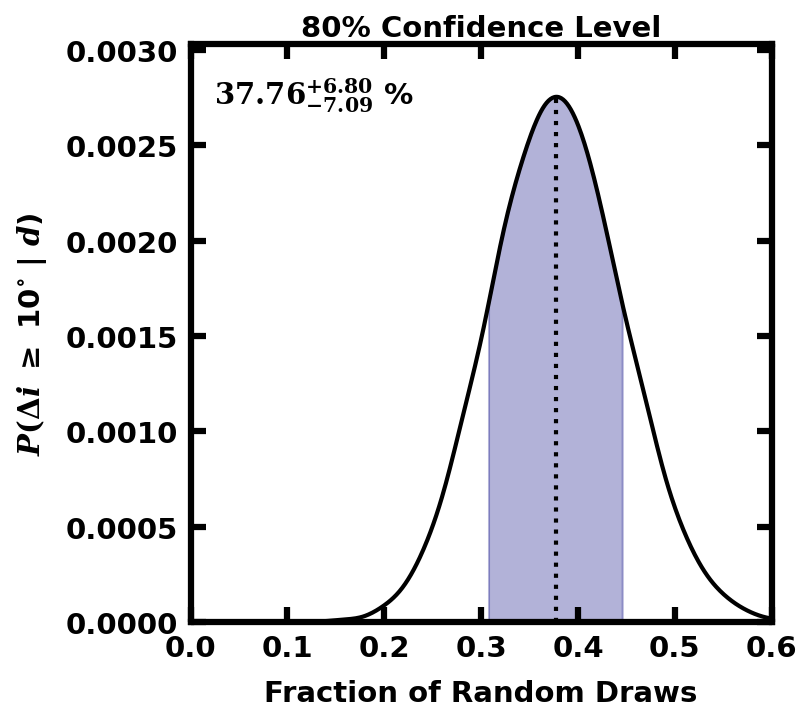

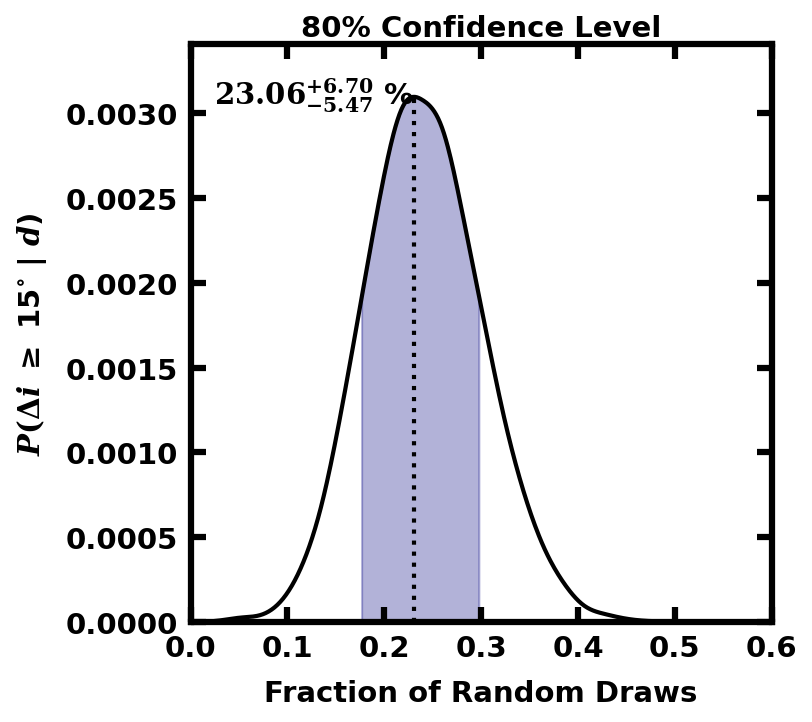

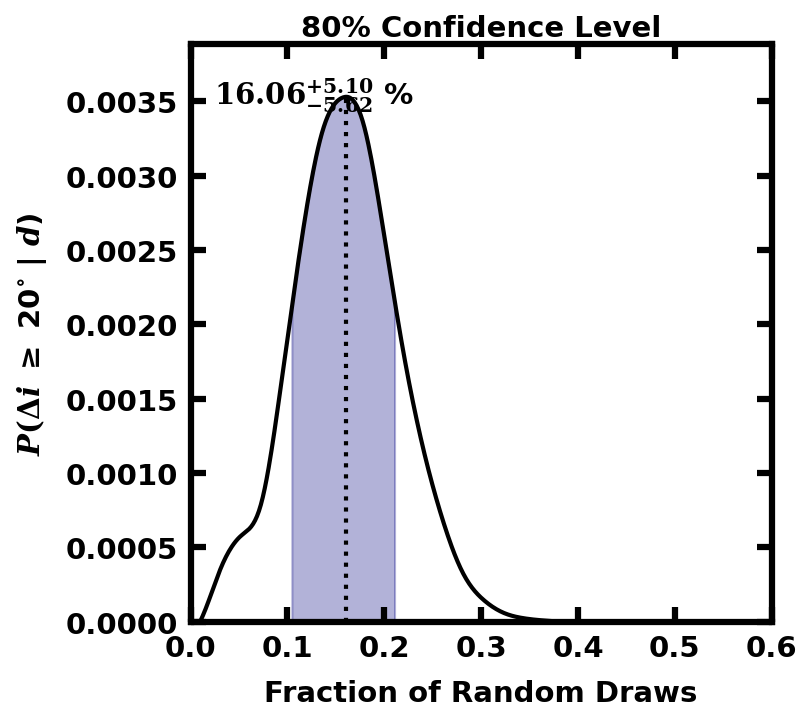

 
-------------------------------------
Misaligned
26 +7 - 6
 
17 +5 - 6
 
10 +3 - 6
 


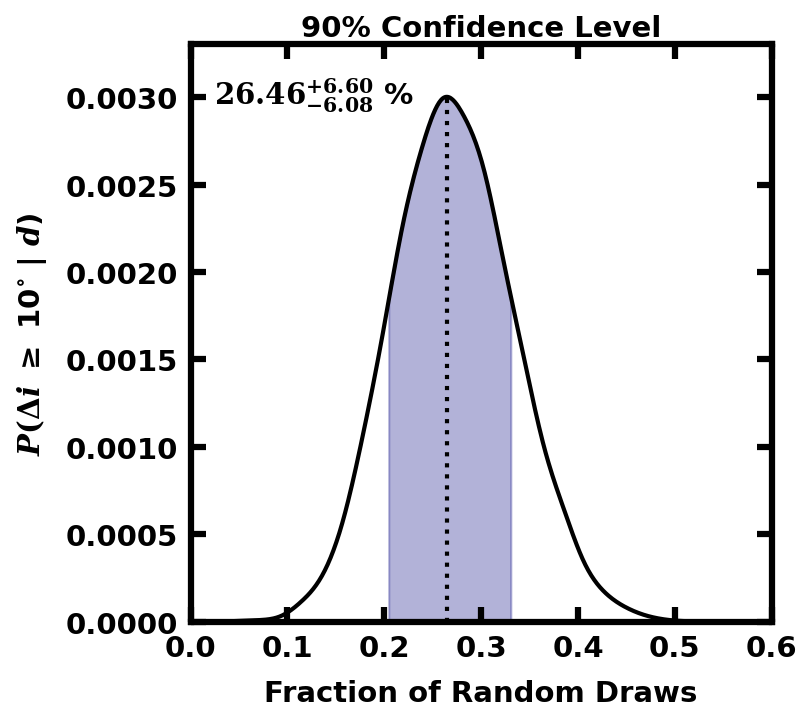

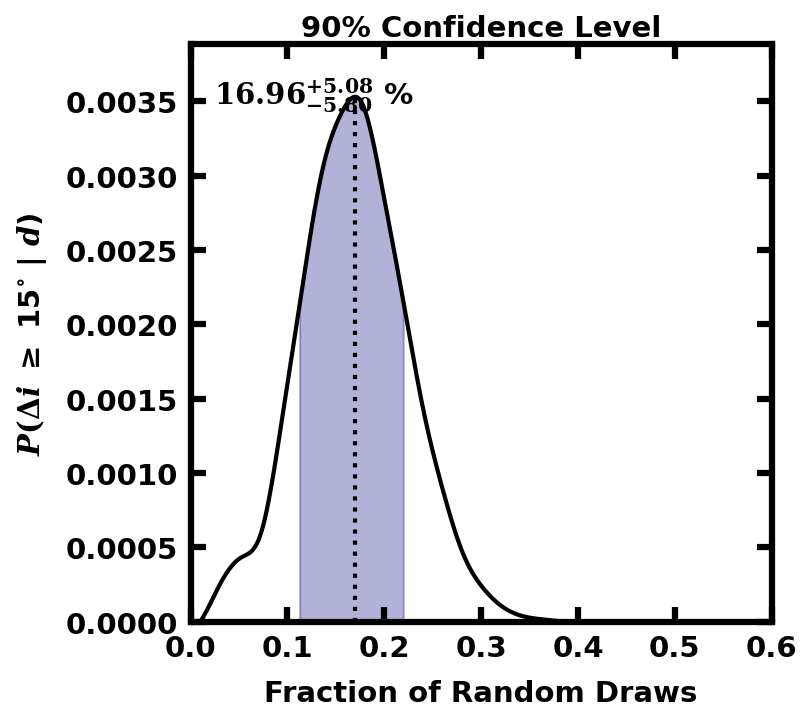

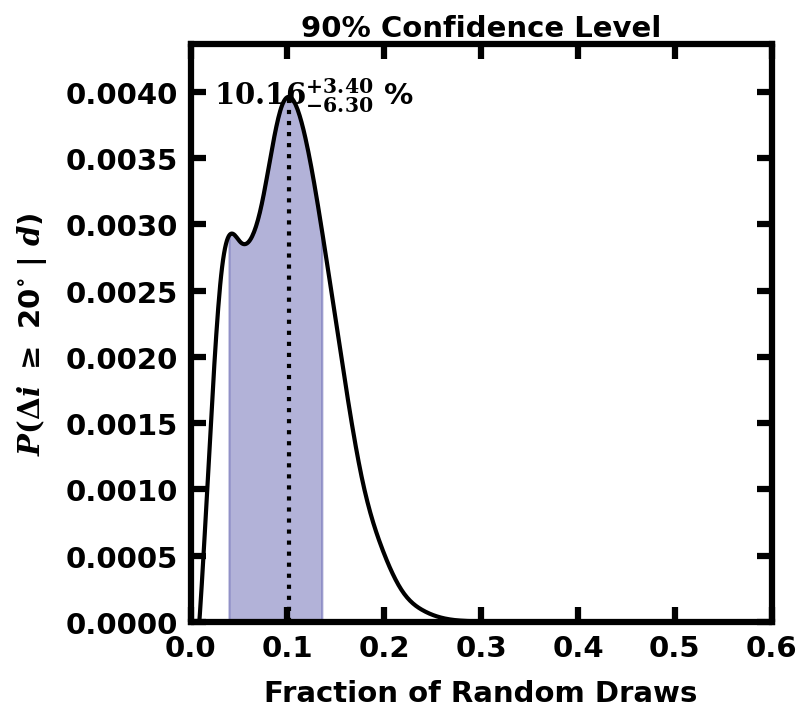

In [759]:
from scipy.signal import find_peaks

confidence_levels = [80, 90]

for which_confidence_level in confidence_levels:

    confidence_level = 0.01 * which_confidence_level   #0.90, 0.80

    # which_confidence_level = 80
    if which_confidence_level == 80:
        misaligned_10_fractions = misaligned_10_fractions_c80
        misaligned_15_fractions = misaligned_15_fractions_c80
        misaligned_20_fractions = misaligned_20_fractions_c80
    if which_confidence_level == 90:
        misaligned_10_fractions = misaligned_10_fractions_c90
        misaligned_15_fractions = misaligned_15_fractions_c90
        misaligned_20_fractions = misaligned_20_fractions_c90

    # unique(misaligned_10_fractions)

    

    fraction_bin_width_10 = 1/bep_iters2 #*2
    fraction_bin_width_15 = 1/bep_iters2 #*2
    fraction_bin_width_20 = 1/bep_iters2 #*2



    # print('fraction bin width_10: ', fraction_bin_width_10)
    # print('fraction bin width_15: ', fraction_bin_width_15)
    # print('fraction bin width_20: ', fraction_bin_width_20)

    fraction_bins_10 = np.arange(0-fraction_bin_width_10, 1.0 + fraction_bin_width_10, fraction_bin_width_10)
    fraction_bins_15 = np.arange(0-fraction_bin_width_15, 1.0 + fraction_bin_width_15, fraction_bin_width_15)
    fraction_bins_20 = np.arange(0-fraction_bin_width_20, 1.0 + fraction_bin_width_20, fraction_bin_width_20)

    hist_misaligned_10_fractions, _ = np.histogram(misaligned_10_fractions, bins=fraction_bins_10)
    hist_misaligned_15_fractions, _ = np.histogram(misaligned_15_fractions, bins=fraction_bins_15)
    hist_misaligned_20_fractions, _ = np.histogram(misaligned_20_fractions, bins=fraction_bins_20)

    # print('fraction bin width_10: ', fraction_bin_width_10)
    # print('fraction bin width_15: ', fraction_bin_width_15)
    # print('fraction bin width_20: ', fraction_bin_width_20)


    pos_10_misaligned = np.where(hist_misaligned_10_fractions > 0)[0]
    pos_15_misaligned = np.where(hist_misaligned_15_fractions > 0)[0]
    pos_20_misaligned = np.where(hist_misaligned_20_fractions > 0)[0]
    clean_hist_misaligned_10_fractions = []
    clean_hist_misaligned_15_fractions = []
    clean_hist_misaligned_20_fractions = []

    clean_fraction_bins_10_misaligned = []
    clean_fraction_bins_15_misaligned = []
    clean_fraction_bins_20_misaligned = []
    
    do_clean = True
    if do_clean == True:
        for frac_i in range(len(hist_misaligned_10_fractions)):
            if fraction_bins_10[frac_i] >= fraction_bins_10[pos_10_misaligned[0]] and fraction_bins_10[frac_i] <= fraction_bins_10[pos_10_misaligned[-1]]:
                if hist_misaligned_10_fractions[frac_i] > 0:
                    clean_hist_misaligned_10_fractions.append(hist_misaligned_10_fractions[frac_i])
                    clean_fraction_bins_10_misaligned.append(fraction_bins_10[frac_i])
            else:
                clean_hist_misaligned_10_fractions.append(hist_misaligned_10_fractions[frac_i])
                clean_fraction_bins_10_misaligned.append(fraction_bins_10[frac_i])
        for frac_i in range(len(hist_misaligned_15_fractions)):
            if fraction_bins_15[frac_i] >= fraction_bins_15[pos_15_misaligned[0]] and fraction_bins_15[frac_i] <= fraction_bins_15[pos_15_misaligned[-1]]:
                if hist_misaligned_15_fractions[frac_i] > 0:
                    clean_hist_misaligned_15_fractions.append(hist_misaligned_15_fractions[frac_i])
                    clean_fraction_bins_15_misaligned.append(fraction_bins_15[frac_i])
            else:
                clean_hist_misaligned_15_fractions.append(hist_misaligned_15_fractions[frac_i])
                clean_fraction_bins_15_misaligned.append(fraction_bins_15[frac_i])
        for frac_i in range(len(hist_misaligned_20_fractions)):
            if fraction_bins_20[frac_i] >= fraction_bins_20[pos_20_misaligned[0]] and fraction_bins_20[frac_i] <= fraction_bins_20[pos_20_misaligned[-1]]:
                if hist_misaligned_20_fractions[frac_i] > 0:
                    clean_hist_misaligned_20_fractions.append(hist_misaligned_20_fractions[frac_i])
                    clean_fraction_bins_20_misaligned.append(fraction_bins_20[frac_i])
            else:
                clean_hist_misaligned_20_fractions.append(hist_misaligned_20_fractions[frac_i])
                clean_fraction_bins_20_misaligned.append(fraction_bins_20[frac_i])


        # print(len(clean_fraction_bins_10_misaligned))
        # print(len(clean_hist_misaligned_10_fractions))
        # print(len(clean_fraction_bins_10_aligned))
        # print(len(clean_hist_aligned_10_fractions))

        hist_misaligned_10_fractions = np.interp(x=fraction_bins_10, xp=clean_fraction_bins_10_misaligned, fp=clean_hist_misaligned_10_fractions)
        hist_misaligned_15_fractions = np.interp(x=fraction_bins_15, xp=clean_fraction_bins_15_misaligned, fp=clean_hist_misaligned_15_fractions)
        hist_misaligned_20_fractions = np.interp(x=fraction_bins_20, xp=clean_fraction_bins_20_misaligned, fp=clean_hist_misaligned_20_fractions)





    from scipy.interpolate import interp1d

    fine_fraction_bins = np.arange(0-fraction_bin_width_10, 1.0, 0.00001)
    
    if do_clean == True:
        f_cubic_10 = interp1d(fraction_bins_10, hist_misaligned_10_fractions, kind='cubic')
        f_cubic_15 = interp1d(fraction_bins_15, hist_misaligned_15_fractions, kind='cubic')
        f_cubic_20 = interp1d(fraction_bins_20, hist_misaligned_20_fractions, kind='cubic')
        hist_misaligned_10_fractions2 = f_cubic_10(fine_fraction_bins)
        hist_misaligned_15_fractions2 = f_cubic_15(fine_fraction_bins)
        hist_misaligned_20_fractions2 = f_cubic_20(fine_fraction_bins)
    if do_clean == False:
        f_cubic_10 = interp1d(fraction_bins_10[:-1], hist_misaligned_10_fractions, kind='cubic')
        f_cubic_15 = interp1d(fraction_bins_15[:-1], hist_misaligned_15_fractions, kind='cubic')
        f_cubic_20 = interp1d(fraction_bins_20[:-1], hist_misaligned_20_fractions, kind='cubic')
        hist_misaligned_10_fractions2 = f_cubic_10(fine_fraction_bins[:-1])
        hist_misaligned_15_fractions2 = f_cubic_15(fine_fraction_bins[:-1])
        hist_misaligned_20_fractions2 = f_cubic_20(fine_fraction_bins[:-1])

    # if do_clean == True:
    #     plt.scatter(fraction_bins_10, hist_misaligned_10_fractions)
    # if do_clean == False:
    #     plt.scatter(fraction_bins_10[:-1], hist_misaligned_10_fractions)
    # plt.plot(fine_fraction_bins, hist_misaligned_10_fractions2)
    # plt.show()



    posterior_misaligned_10_fractions = hist_misaligned_10_fractions2 / (sum(hist_misaligned_10_fractions2) * fraction_bin_width_10)
    posterior_misaligned_15_fractions = hist_misaligned_15_fractions2 / (sum(hist_misaligned_15_fractions2) * fraction_bin_width_15)
    posterior_misaligned_20_fractions = hist_misaligned_20_fractions2 / (sum(hist_misaligned_20_fractions2) * fraction_bin_width_20)


    # print(len(fine_fraction_bins))
    # print(len(posterior_misaligned_10_fractions))
    # print(posterior_misaligned_10_fractions)

    # if do_clean == True:
    #     centerbin_x = fraction_bins_10 + 0.5*fraction_bin_width_10
    # else:
    #     centerbin_x = fraction_bins_10[:-1] + 0.5*fraction_bin_width_10

    # print(np.median(misaligned_10_fractions))

    input_x_values = fine_fraction_bins+0.5*fraction_bin_width_10

    misaligned_10_MAP, sig1_misaligned_10_m, sig1_misaligned_10_p, fraction_values_10, posterior_misaligned_10_fractions = mode_pm_highest_density_interval(x=input_x_values, pdf_y=posterior_misaligned_10_fractions, sigma=0.68, return_pdf=True)
    misaligned_15_MAP, sig1_misaligned_15_m, sig1_misaligned_15_p, fraction_values_15, posterior_misaligned_15_fractions = mode_pm_highest_density_interval(x=input_x_values, pdf_y=posterior_misaligned_15_fractions, sigma=0.68, return_pdf=True)
    misaligned_20_MAP, sig1_misaligned_20_m, sig1_misaligned_20_p, fraction_values_20, posterior_misaligned_20_fractions = mode_pm_highest_density_interval(x=input_x_values, pdf_y=posterior_misaligned_20_fractions, sigma=0.68, return_pdf=True)


    centerbin_x_plot = fraction_values_10 # + 0.5*fraction_bin_width_10

    print(' ')
    print('-------------------------------------')
    print('Misaligned')
    print('{:d} +{:d} - {:d}'.format(int(np.round(misaligned_10_MAP*100)), abs(int(np.round(sig1_misaligned_10_p*100))), abs(int(np.round(sig1_misaligned_10_m*100)))))
    print(' ')
    print('{:d} +{:d} - {:d}'.format(int(np.round(misaligned_15_MAP*100)), abs(int(np.round(sig1_misaligned_15_p*100))), abs(int(np.round(sig1_misaligned_15_m*100)))))
    print(' ')
    print('{:d} +{:d} - {:d}'.format(int(np.round(misaligned_20_MAP*100)), abs(int(np.round(sig1_misaligned_20_p*100))), abs(int(np.round(sig1_misaligned_20_m*100)))))
    print(' ')

    fraction_fontsize = 14
    fraction_labelpad = 8

    conf_fig = plt.figure(figsize=(5, 5), dpi=150)
    ax = conf_fig.add_subplot(111)
    ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
    ax.set_ylabel(r'$P(\Delta i$ $\geq$ 10$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
    ax.set_xlabel('Fraction of Random Draws', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

    fraction_fill_color = 'Navy'
    ax.plot(centerbin_x_plot, posterior_misaligned_10_fractions, color='#000000', lw=2, zorder=4)
    ax.plot([misaligned_10_MAP, misaligned_10_MAP], [0, max(posterior_misaligned_10_fractions)], ls=':', color='#000000', lw=2, zorder=4)

    where_fill = np.where((centerbin_x_plot >= misaligned_10_MAP - sig1_misaligned_10_m) & (centerbin_x_plot <= misaligned_10_MAP + sig1_misaligned_10_p))[0]
    ax.fill_between(x=centerbin_x_plot[where_fill], y1=posterior_misaligned_10_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
    ax.set_ylim(0, 1.10*max(posterior_misaligned_10_fractions))
    ax.set_xlim(0, 0.6)

    fraction_text = "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$ %".format(misaligned_10_MAP*100, sig1_misaligned_10_p*100, sig1_misaligned_10_m*100)
    ax.text(0.04, 0.88, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

    plt.show()
    plt.close()


    conf_fig = plt.figure(figsize=(5, 5), dpi=150)
    ax = conf_fig.add_subplot(111)
    ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
    ax.set_ylabel(r'$P(\Delta i$ $\geq$ 15$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
    ax.set_xlabel('Fraction of Random Draws', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

    fraction_fill_color = 'Navy'
    ax.plot(centerbin_x_plot, posterior_misaligned_15_fractions, color='#000000', lw=2, zorder=4)
    ax.plot([misaligned_15_MAP, misaligned_15_MAP], [0, max(posterior_misaligned_15_fractions)], ls=':', color='#000000', lw=2, zorder=4)

    where_fill = np.where((centerbin_x_plot >= misaligned_15_MAP - sig1_misaligned_15_m) & (centerbin_x_plot <= misaligned_15_MAP + sig1_misaligned_15_p))[0]
    ax.fill_between(x=centerbin_x_plot[where_fill], y1=posterior_misaligned_15_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
    ax.set_ylim(0, 1.10*max(posterior_misaligned_15_fractions))
    ax.set_xlim(0, 0.6)

    fraction_text = "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$ %".format(misaligned_15_MAP*100, sig1_misaligned_15_p*100, sig1_misaligned_15_m*100)
    ax.text(0.04, 0.88, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

    plt.show()
    plt.close()


    conf_fig = plt.figure(figsize=(5, 5), dpi=150)
    ax = conf_fig.add_subplot(111)
    ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
    ax.set_ylabel(r'$P(\Delta i$ $\geq$ 20$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
    ax.set_xlabel('Fraction of Random Draws', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

    fraction_fill_color = 'Navy'
    ax.plot(centerbin_x_plot, posterior_misaligned_20_fractions, color='#000000', lw=2, zorder=4)
    ax.plot([misaligned_20_MAP, misaligned_20_MAP], [0, max(posterior_misaligned_20_fractions)], ls=':', color='#000000', lw=2, zorder=4)

    where_fill = np.where((centerbin_x_plot >= misaligned_20_MAP - sig1_misaligned_20_m) & (centerbin_x_plot <= misaligned_20_MAP + sig1_misaligned_20_p))[0]
    ax.fill_between(x=centerbin_x_plot[where_fill], y1=posterior_misaligned_20_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
    ax.set_ylim(0, 1.10*max(posterior_misaligned_20_fractions))
    ax.set_xlim(0, 0.6)

    fraction_text = "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$ %".format(misaligned_20_MAP*100, sig1_misaligned_20_p*100, sig1_misaligned_20_m*100)
    ax.text(0.04, 0.88, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

    plt.show()
    plt.close()







In [425]:
# # bep_iters = int(200)
# bep_iters = int(200)


# misaligned_10_fractions_c90 = []
# misaligned_15_fractions_c90 = []
# misaligned_20_fractions_c90 = []
# misaligned_10_fractions_c80 = []
# misaligned_15_fractions_c80 = []
# misaligned_20_fractions_c80 = []

# interp_i_values = np.arange(min(i_values), max(i_values)+0.01, 1)

# for bep_iter in range(bep_iters):

#     if np.mod(bep_iter, 50) == 0:
#         print(bep_iter)

#     misaligned_10_c90 = 0
#     misaligned_15_c90 = 0
#     misaligned_20_c90 = 0
#     misaligned_10_c80 = 0
#     misaligned_15_c80 = 0
#     misaligned_20_c80 = 0

#     for target_n in range(sample_size):

#         interp_distribution = np.interp(interp_i_values, xp=i_values, fp=list_of_posteriors[target_n])
#         single_draw = choices(interp_i_values, interp_distribution, k=1)[0]
#         # single_draw = choices(i_values, list_of_posteriors[target_n], k=1)[0]

#         if single_draw >= 10:
#             confidence_level_gt_10 = determine_misalignment(param_x=i_values, pdf_y=list_of_posteriors[target_n], threshold=10)
#             if confidence_level_gt_10 >= 0.90:
#                 misaligned_10_c90 += 1
#             if (confidence_level_gt_10 >= 0.80):  #  and (confidence_level_gt_10 < 0.80):
#                 misaligned_10_c80 += 1

#         if single_draw >= 15:
#             confidence_level_gt_15 = determine_misalignment(param_x=i_values, pdf_y=list_of_posteriors[target_n], threshold=15)
#             if confidence_level_gt_15 >= 0.90:
#                 misaligned_15_c90 += 1
#             if (confidence_level_gt_15 >= 0.80):  #  and (confidence_level_gt_15 < 0.80):
#                 misaligned_15_c80 += 1

#         if single_draw >= 20:
#             confidence_level_gt_20 = determine_misalignment(param_x=i_values, pdf_y=list_of_posteriors[target_n], threshold=20)
#             if confidence_level_gt_20 >= 0.90:
#                 misaligned_20_c90 += 1
#             if (confidence_level_gt_20 >= 0.80):  #  and (confidence_level_gt_20 < 0.80):
#                 misaligned_20_c80 += 1




#     misaligned_10_fractions_c90.append(misaligned_10_c90 / sample_size)
#     misaligned_15_fractions_c90.append(misaligned_15_c90 / sample_size)
#     misaligned_20_fractions_c90.append(misaligned_20_c90 / sample_size)
#     misaligned_10_fractions_c80.append(misaligned_10_c80 / sample_size)
#     misaligned_15_fractions_c80.append(misaligned_15_c80 / sample_size)
#     misaligned_20_fractions_c80.append(misaligned_20_c80 / sample_size)






0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


fraction bin width_10:  0.02040816326530612
fraction bin width_15:  0.02040816326530612
fraction bin width_20:  0.02040816326530612
 
[0.3469387755102041, 0.30612244897959184, 0.32653061224489793, 0.2857142857142857, 0.2653061224489796]
[0.2653061224489796, 0.2857142857142857, 0.30612244897959184, 0.32653061224489793, 0.3469387755102041]
[0.02040816 0.02040816 0.02040816 0.02040816]
 
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.         1.02040816]
[  0   0   0   0   0   0   0   0   0   0  

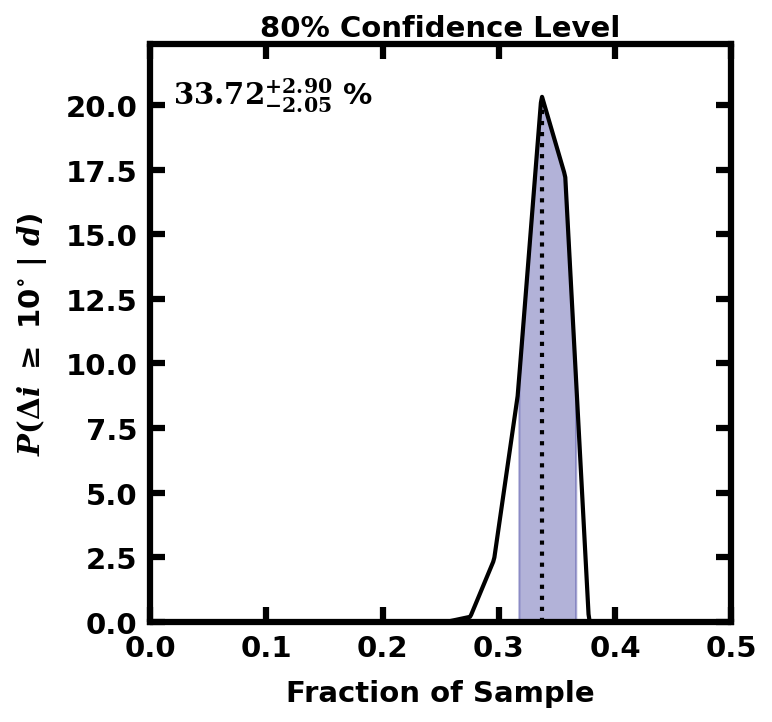

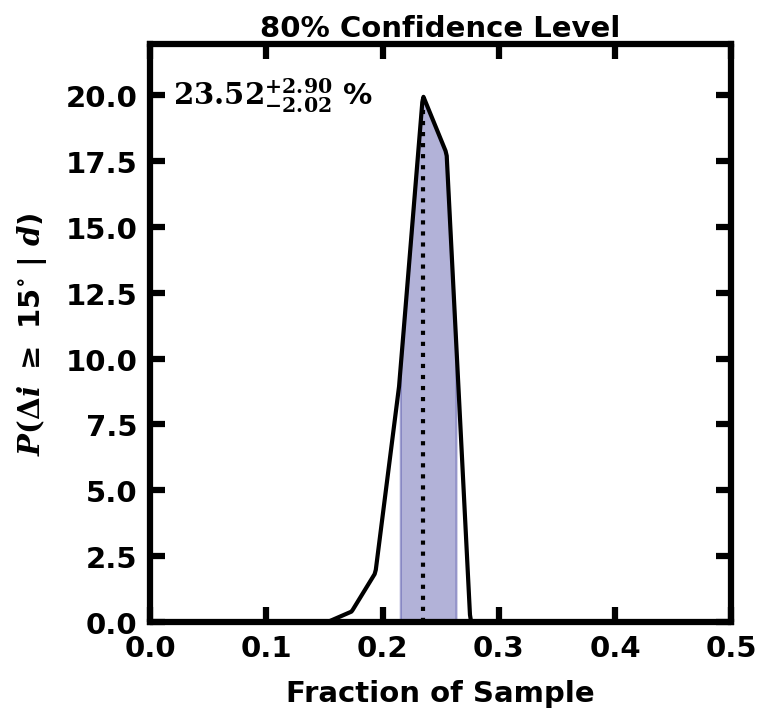

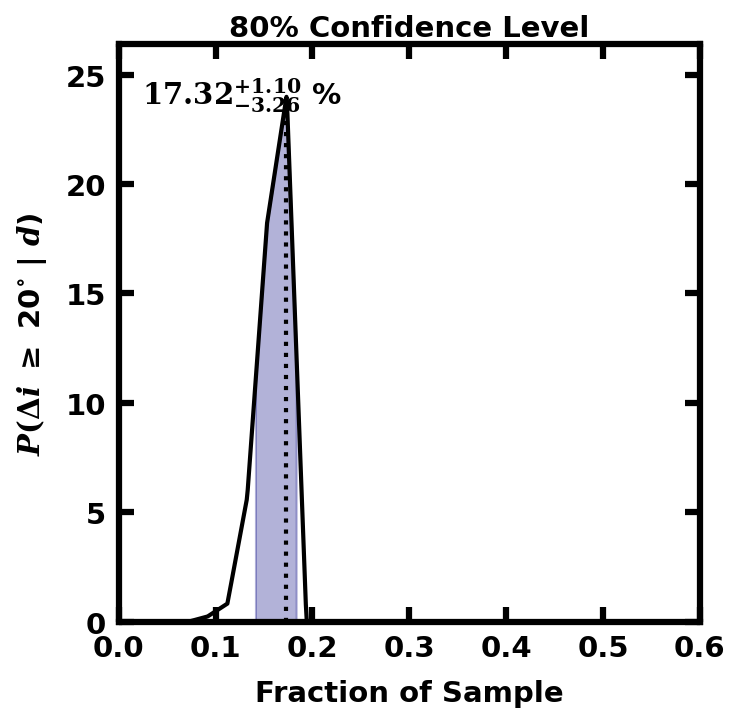

fraction bin width_10:  0.02040816326530612
fraction bin width_15:  0.02040816326530612
fraction bin width_20:  0.02040816326530612
 
[0.24489795918367346, 0.22448979591836735, 0.20408163265306123, 0.1836734693877551]
[0.1836734693877551, 0.20408163265306123, 0.22448979591836735, 0.24489795918367346]
[0.02040816 0.02040816 0.02040816]
 
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.         1.02040816]
[  0   0   0   0   0   0   0   0   0   4  43 286 667   0   0   0   0   0
   0   0   0   0  

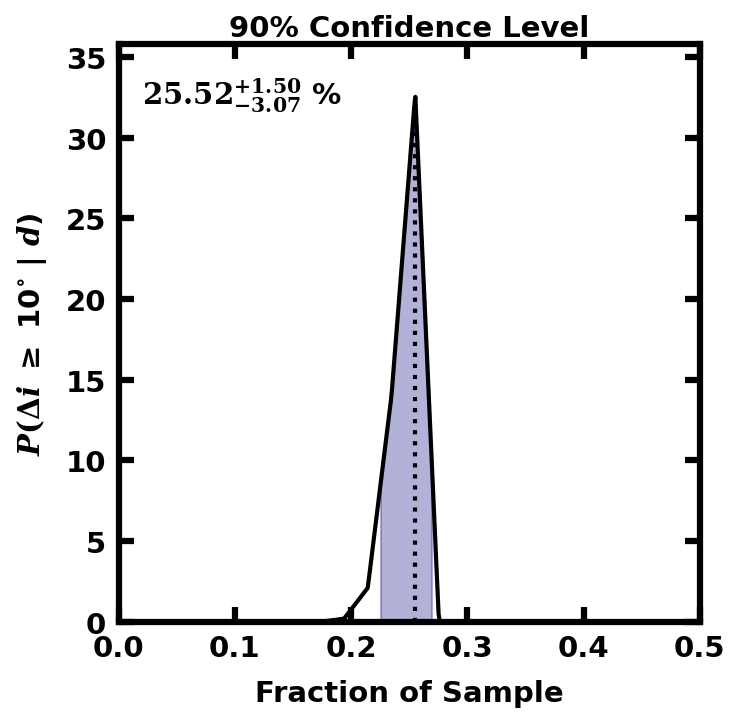

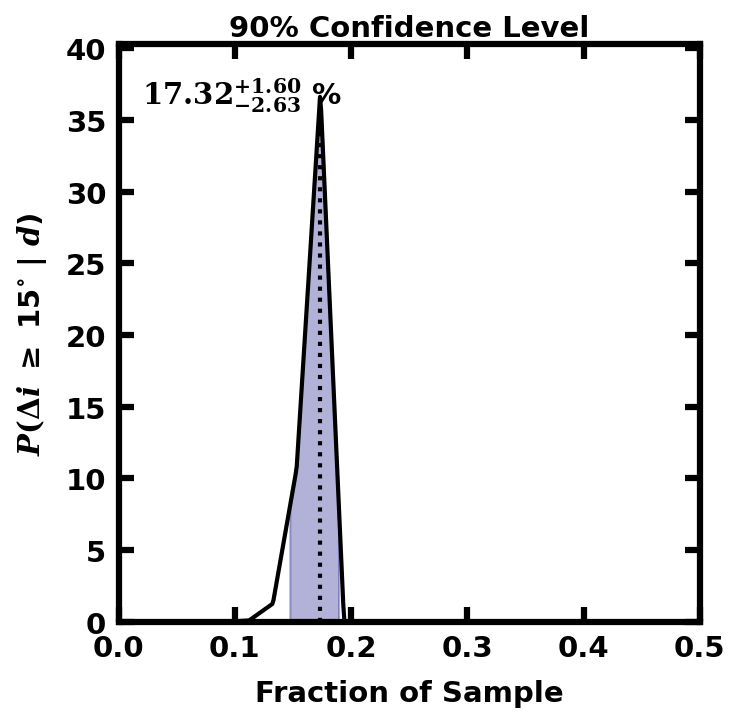

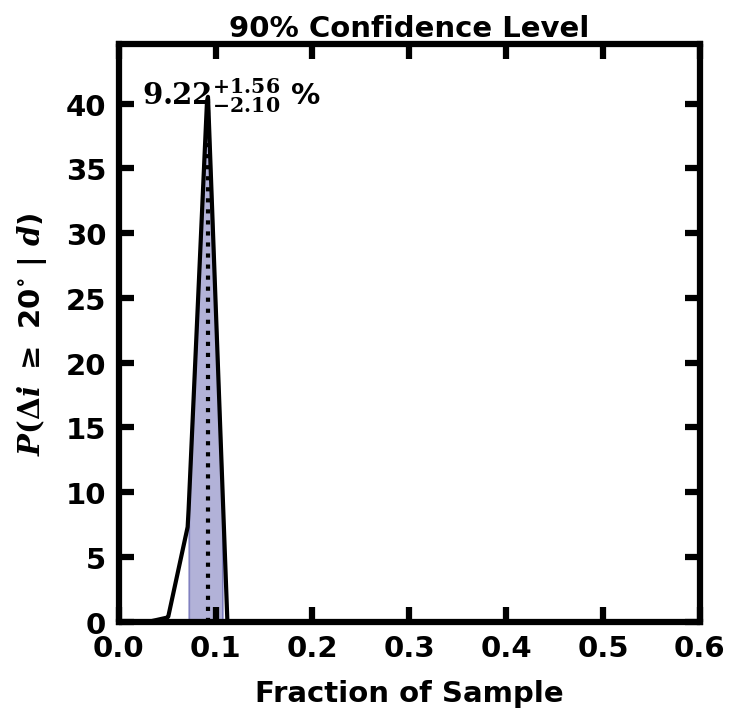

In [426]:
# from scipy.signal import find_peaks

# confidence_levels = [80, 90]

# for which_confidence_level in confidence_levels:

#     # which_confidence_level = 80
#     if which_confidence_level == 80:
#         misaligned_10_fractions = misaligned_10_fractions_c80
#         misaligned_15_fractions = misaligned_15_fractions_c80
#         misaligned_20_fractions = misaligned_20_fractions_c80
#     if which_confidence_level == 90:
#         misaligned_10_fractions = misaligned_10_fractions_c90
#         misaligned_15_fractions = misaligned_15_fractions_c90
#         misaligned_20_fractions = misaligned_20_fractions_c90

#     print('fraction bin width_10: ', fraction_bin_width_10)
#     print('fraction bin width_15: ', fraction_bin_width_15)
#     print('fraction bin width_20: ', fraction_bin_width_20)

#     # unique(misaligned_10_fractions)

#     fraction_bin_width_10 = 1./49
#     fraction_bin_width_15 = 1./49
#     fraction_bin_width_20 = 1./49

#     fraction_bins_10 = np.arange(0, 1.0 + fraction_bin_width_10, fraction_bin_width_10)
#     fraction_bins_15 = np.arange(0, 1.0 + fraction_bin_width_15, fraction_bin_width_15)
#     fraction_bins_20 = np.arange(0, 1.0 + fraction_bin_width_20, fraction_bin_width_20)
#     posterior_misaligned_x_10 = fraction_bins_10[:-1] + 0.5 * fraction_bin_width_10
#     posterior_misaligned_x_15 = fraction_bins_15[:-1] + 0.5 * fraction_bin_width_15
#     posterior_misaligned_x_20 = fraction_bins_20[:-1] + 0.5 * fraction_bin_width_20

#     hist_misaligned_10_fractions, _ = np.histogram(misaligned_10_fractions, bins=fraction_bins_10)
#     hist_misaligned_15_fractions, _ = np.histogram(misaligned_15_fractions, bins=fraction_bins_15)
#     hist_misaligned_20_fractions, _ = np.histogram(misaligned_20_fractions, bins=fraction_bins_20)


#     print(' ')
#     print(unique(misaligned_10_fractions))
#     print(sorted(unique(misaligned_10_fractions)))
#     print(np.diff(sorted(unique(misaligned_10_fractions))))
#     print(' ')
#     print(fraction_bins_10)
#     print(hist_misaligned_10_fractions)
#     print(1/49)

#     posterior_misaligned_10_fractions = hist_misaligned_10_fractions / (sum(hist_misaligned_10_fractions) * fraction_bin_width_10)
#     posterior_misaligned_15_fractions = hist_misaligned_15_fractions / (sum(hist_misaligned_15_fractions) * fraction_bin_width_15)
#     posterior_misaligned_20_fractions = hist_misaligned_20_fractions / (sum(hist_misaligned_20_fractions) * fraction_bin_width_20)

#     # peaks_10, _ = find_peaks(x, height=0)


#     # posterior_misaligned_x_10 = posterior_misaligned_x[]



#     confidence_level = 0.01 * which_confidence_level     # 0.6826

#     misaligned_10_MAP, sig1_misaligned_10_m, sig1_misaligned_10_p, fraction_values_10, posterior_misaligned_10_fractions = mode_pm_highest_density_interval(x=posterior_misaligned_x_10, pdf_y=posterior_misaligned_10_fractions, sigma=confidence_level, return_pdf=True)
#     misaligned_15_MAP, sig1_misaligned_15_m, sig1_misaligned_15_p, fraction_values_15, posterior_misaligned_15_fractions = mode_pm_highest_density_interval(x=posterior_misaligned_x_15, pdf_y=posterior_misaligned_15_fractions, sigma=confidence_level, return_pdf=True)
#     misaligned_20_MAP, sig1_misaligned_20_m, sig1_misaligned_20_p, fraction_values_20, posterior_misaligned_20_fractions = mode_pm_highest_density_interval(x=posterior_misaligned_x_20, pdf_y=posterior_misaligned_20_fractions, sigma=confidence_level, return_pdf=True)


#     print(' ')
#     print('{:d} +{:d} - {:d}'.format(int(np.round(misaligned_10_MAP*100)), abs(int(np.round(sig1_misaligned_10_p*100))), abs(int(np.round(sig1_misaligned_10_m*100)))))
#     print(' ')
#     print('{:d} +{:d} - {:d}'.format(int(np.round(misaligned_15_MAP*100)), abs(int(np.round(sig1_misaligned_15_p*100))), abs(int(np.round(sig1_misaligned_15_m*100)))))
#     print(' ')
#     print('{:d} +{:d} - {:d}'.format(int(np.round(misaligned_20_MAP*100)), abs(int(np.round(sig1_misaligned_20_p*100))), abs(int(np.round(sig1_misaligned_20_m*100)))))
#     print(' ')

#     fraction_fontsize = 14
#     fraction_labelpad = 8

#     conf_fig = plt.figure(figsize=(5, 5), dpi=150)
#     ax = conf_fig.add_subplot(111)
#     ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
#     ax.set_ylabel(r'$P(\Delta i$ $\geq$ 10$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
#     ax.set_xlabel('Fraction of Sample', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

#     fraction_fill_color = 'Navy'
#     ax.plot(fraction_values_10, posterior_misaligned_10_fractions, color='#000000', lw=2, zorder=4)
#     ax.plot([misaligned_10_MAP, misaligned_10_MAP], [0, max(posterior_misaligned_10_fractions)], ls=':', color='#000000', lw=2, zorder=4)

#     where_fill = np.where((fraction_values_10 >= misaligned_10_MAP - sig1_misaligned_10_m) & (fraction_values_10 <= misaligned_10_MAP + sig1_misaligned_10_p))[0]
#     ax.fill_between(x=fraction_values_10[where_fill], y1=posterior_misaligned_10_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
#     ax.set_ylim(0, 1.10*max(posterior_misaligned_10_fractions))
#     ax.set_xlim(0, 0.5)

#     # fraction_text = "${:d}^{{+{:d}}}_{{-{:d}}}$ %".format(round(misaligned_10_MAP*100), round(sig1_misaligned_10_p*100), round(sig1_misaligned_10_m*100))
#     fraction_text = "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$ %".format(misaligned_10_MAP*100, sig1_misaligned_10_p*100, sig1_misaligned_10_m*100)
#     ax.text(0.04, 0.88, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

#     plt.show()
#     plt.close()



#     conf_fig = plt.figure(figsize=(5, 5), dpi=150)
#     ax = conf_fig.add_subplot(111)
#     ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
#     ax.set_ylabel(r'$P(\Delta i$ $\geq$ 15$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
#     ax.set_xlabel('Fraction of Sample', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

#     fraction_fill_color = 'Navy'
#     ax.plot(fraction_values_15, posterior_misaligned_15_fractions, color='#000000', lw=2, zorder=4)
#     ax.plot([misaligned_15_MAP, misaligned_15_MAP], [0, max(posterior_misaligned_15_fractions)], ls=':', color='#000000', lw=2, zorder=4)

#     where_fill = np.where((fraction_values_15 >= misaligned_15_MAP - sig1_misaligned_15_m) & (fraction_values_15 <= misaligned_15_MAP + sig1_misaligned_15_p))[0]
#     ax.fill_between(x=fraction_values_15[where_fill], y1=posterior_misaligned_15_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
#     ax.set_ylim(0, 1.10*max(posterior_misaligned_15_fractions))
#     ax.set_xlim(0, 0.5)

#     # fraction_text = "${:d}^{{+{:d}}}_{{-{:d}}}$ %".format(round(misaligned_15_MAP*100), round(sig1_misaligned_15_p*100), round(sig1_misaligned_15_m*100))
#     fraction_text = "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$ %".format(misaligned_15_MAP*100, sig1_misaligned_15_p*100, sig1_misaligned_15_m*100)
#     ax.text(0.04, 0.88, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

#     plt.show()
#     plt.close()




#     conf_fig = plt.figure(figsize=(5, 5), dpi=150)
#     ax = conf_fig.add_subplot(111)
#     ax.set_title('{:d}% Confidence Level'.format(round(confidence_level*100)), fontsize=fraction_fontsize)
#     ax.set_ylabel(r'$P(\Delta i$ $\geq$ 20$^{\circ}$ | $d$)', fontsize=fraction_fontsize, labelpad=fraction_labelpad)
#     ax.set_xlabel('Fraction of Sample', fontsize=fraction_fontsize, labelpad=fraction_labelpad)

#     fraction_fill_color = 'Navy'
#     ax.plot(fraction_values_20, posterior_misaligned_20_fractions, color='#000000', lw=2, zorder=4)
#     ax.plot([misaligned_20_MAP, misaligned_20_MAP], [0, max(posterior_misaligned_20_fractions)], ls=':', color='#000000', lw=2, zorder=4)

#     where_fill = np.where((fraction_values_20 >= misaligned_20_MAP - sig1_misaligned_20_m) & (fraction_values_20 <= misaligned_20_MAP + sig1_misaligned_20_p))[0]
#     ax.fill_between(x=fraction_values_20[where_fill], y1=posterior_misaligned_20_fractions[where_fill], interpolate=True, color=fraction_fill_color, alpha=alpha_sig2, zorder=-1)
#     ax.set_ylim(0, 1.10*max(posterior_misaligned_20_fractions))
#     ax.set_xlim(0, 0.6)

#     # fraction_text = "${:d}^{{+{:d}}}_{{-{:d}}}$ %".format(round(misaligned_20_MAP*100), round(sig1_misaligned_20_p*100), round(sig1_misaligned_20_m*100))
#     fraction_text = "${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$ %".format(misaligned_20_MAP*100, sig1_misaligned_20_p*100, sig1_misaligned_20_m*100)
#     ax.text(0.04, 0.88, fraction_text, horizontalalignment='left', verticalalignment='bottom', fontsize=fraction_fontsize, transform=ax.transAxes)

#     plt.show()
#     plt.close()

In [ ]:
        # from scipy.signal import find_peaks
        # pleeb = True
        # while pleeb == True:
        #     toss_10 = find_peaks(-np.array(clean_hist_misaligned_10_fractions), height=-1000)[0]
        #     toss_15 = find_peaks(-np.array(clean_hist_misaligned_15_fractions), height=-1000)[0]
        #     toss_20 = find_peaks(-np.array(clean_hist_misaligned_20_fractions), height=-1000)[0]

        #     if len(toss_10)

        #     clean_fraction_bins_10 = np.delete(clean_fraction_bins_10, toss_10)
        #     clean_hist_misaligned_10_fractions = np.delete(clean_hist_misaligned_10_fractions, toss_10)
        #     clean_fraction_bins_15 = np.delete(clean_fraction_bins_15, toss_15)
        #     clean_hist_misaligned_15_fractions = np.delete(clean_hist_misaligned_15_fractions, toss_15)
        #     clean_fraction_bins_20 = np.delete(clean_fraction_bins_20, toss_20)
        #     clean_hist_misaligned_20_fractions = np.delete(clean_hist_misaligned_20_fractions, toss_20)

In [125]:
# confidence_bins = np.arange(0, 1 + 0.02, 0.01)
# bin_vals_misaligned10_90percent_confidence_population, _ = np.histogram(misaligned10_90percent_confidence_population_fraction_dist, bins=confidence_bins)
# bin_vals_misaligned10_80percent_confidence_population, _ = np.histogram(misaligned10_80percent_confidence_population_fraction_dist, bins=confidence_bins)
# bin_vals_misaligned20_90percent_confidence_population, _ = np.histogram(misaligned20_90percent_confidence_population_fraction_dist, bins=confidence_bins)
# bin_vals_misaligned20_80percent_confidence_population, _ = np.histogram(misaligned20_80percent_confidence_population_fraction_dist, bins=confidence_bins)


# # smooth_on = True
# # if smooth_on == True:
# smooth_over_points = int(0.02/np.diff(confidence_bins)[0])
# if np.mod(smooth_over_points,2) == 0:
#     smooth_over_points += 1
# # bin_vals_misaligned10_90percent_confidence_population = gaussian_filter1d(bin_vals_misaligned10_90percent_confidence_population, smooth_over_points)
# bin_vals_misaligned10_90percent_confidence_population = bin_vals_misaligned10_90percent_confidence_population / (sum(bin_vals_misaligned10_90percent_confidence_population) * np.diff(confidence_bins)[0])
# # bin_vals_misaligned10_80percent_confidence_population = gaussian_filter1d(bin_vals_misaligned10_80percent_confidence_population, smooth_over_points)
# bin_vals_misaligned10_80percent_confidence_population = bin_vals_misaligned10_80percent_confidence_population / (sum(bin_vals_misaligned10_80percent_confidence_population) * np.diff(confidence_bins)[0])

# # bin_vals_misaligned20_90percent_confidence_population = gaussian_filter1d(bin_vals_misaligned20_90percent_confidence_population, smooth_over_points)
# bin_vals_misaligned20_90percent_confidence_population = bin_vals_misaligned20_90percent_confidence_population / (sum(bin_vals_misaligned20_90percent_confidence_population) * np.diff(confidence_bins)[0])
# # bin_vals_misaligned20_80percent_confidence_population = gaussian_filter1d(bin_vals_misaligned20_80percent_confidence_population, smooth_over_points)
# bin_vals_misaligned20_80percent_confidence_population = bin_vals_misaligned20_80percent_confidence_population / (sum(bin_vals_misaligned20_80percent_confidence_population) * np.diff(confidence_bins)[0])
# # else:
# #     bin_vals_misaligned10_90percent_confidence_population = bin_vals_misaligned10_90percent_confidence_population / (sum(bin_vals_misaligned10_90percent_confidence_population) * np.diff(i_values)[0])


# print(bin_vals_misaligned10_90percent_confidence_population)

# # -------------------------------- MISALIGNMENT UNCERTAINTY --------------------------------- #
# misaligned10_90percent_confidence_population_MAP, sig1_misaligned10_90percent_confidence_population_m, sig1_misaligned10_90percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned10_90percent_confidence_population, sigma=0.6826)
# misaligned10_80percent_confidence_population_MAP, sig1_misaligned10_80percent_confidence_population_m, sig1_misaligned10_80percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned10_80percent_confidence_population, sigma=0.6826)
# misaligned20_90percent_confidence_population_MAP, sig1_misaligned20_90percent_confidence_population_m, sig1_misaligned20_90percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned20_90percent_confidence_population, sigma=0.6826)
# misaligned20_80percent_confidence_population_MAP, sig1_misaligned20_80percent_confidence_population_m, sig1_misaligned20_80percent_confidence_population_p = mode_pm_highest_density_interval(x=confidence_bins[:-1], pdf_y=bin_vals_misaligned20_80percent_confidence_population, sigma=0.6826)

# print(' ')
# print(r'MISALIGNED 10 deg w/ 90% confidence:', round(100*misaligned10_90percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned10_90percent_confidence_population_p,3), '-', round(100*sig1_misaligned10_90percent_confidence_population_m,3))
# print(r'MISALIGNED 10 deg w/ 80% confidence:', round(100*misaligned10_80percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned10_80percent_confidence_population_p,3), '-', round(100*sig1_misaligned10_80percent_confidence_population_m,3))
# print(' ')
# print(r'MISALIGNED 20 deg w/ 90% confidence:', round(100*misaligned20_90percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned20_90percent_confidence_population_p,3), '-', round(sig1_misaligned20_90percent_confidence_population_m,3))
# print(r'MISALIGNED 20 deg w/ 80% confidence:', round(100*misaligned20_80percent_confidence_population_MAP,3), '+', round(100*sig1_misaligned20_80percent_confidence_population_p,3), '-', round(100*sig1_misaligned20_80percent_confidence_population_m,3))
# print(' ')

In [126]:
# print(sig1_widths)
# print(np.median(sig1_widths))
# print(np.mean(sig1_widths))

In [ ]:
# fig = plt.figure(figsize=(8, 12), dpi=150)
# grid_width = 5
# grid_height = 6
# gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[1, 1, 0.30, 1, 1], wspace=0.08, hspace=0.30)
# axes = [fig.add_subplot(gs[ii, jj]) for ii in range(5) for jj in range(5)]

# label_fontsize = 10
# tick_fontsize = 10

# for ax_i, ax in enumerate(axes):

#     ax.minorticks_on()
#     ax.set_rasterized(True)

#     if np.mod(ax_i - 2, 5) == 0:
#         for spine in ax.spines.values():
#             spine.set_edgecolor('#ffffff')
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.tick_params(axis='both', which='both', color='#ffffff')
#     else:
#         for spine in ax.spines.values():
#             spine.set_linewidth(2.5)
#         x_ticks = np.arange(0, 90 + 30, 30)
#         x_ticklabels = [str(int(x_tick)) for x_tick_i, x_tick in enumerate(x_ticks) if x_tick_i != len(x_ticks)]
#         ax.set_xticks(x_ticks)
#         ax.set_xticklabels(x_ticklabels)
#         if (np.mod(ax_i, 5) == 0) or np.mod(ax_i - 3, 5) == 0:
#             ax.set_ylabel('P(bep | b, e,  p)', fontsize=label_fontsize)
#         if (np.mod(ax_i - 1, 5) == 0) or np.mod(ax_i - 4, 5) == 0:
#             ax.set_yticklabels([])


#         # ax.set_xticklabels([])
#         # ax.set_yticklabels([])

#         ax.tick_params(axis='both', which='major', width=2, length=5, labelsize=tick_fontsize, pad=6)
#         ax.tick_params(axis='both', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=6)

#         ax.text(0.5, 0.5, ax_i, horizontalalignment='center', verticalalignment='center', fontsize=24, color='red', transform=ax.transAxes)
        


# fig.savefig(test_figures_directory + 'test_grid.pdf', dpi=300, transparent=False)
# plt.show()



In [ ]:
# title_fontsize = 9
# label_fontsize = 12
# tick_fontsize = 12
# targetlabel_fontsize = 12

# title_pad = 12
# label_pad = 4

# i_disk_fill_color = '#29a366'
# i_star_fill_color = '#003366'
# Delta_i_fill_color = '#007399'

# alpha_sig2 = 0.3
# alpha_sig1 = 1 - alpha_sig2


# grid_width = 4
# grid_height = 6

# setnum = 0


# frame_numbers_on = False



# for targetnum in range(len(df_adopted['Simbad Name'].values)-1):

#     if targetnum != 0:
#         targetnum += 1
#     if np.mod(targetnum, grid_height) == 0:
#         setnum += 1

#         fig = plt.figure(figsize=(10, 12), dpi=150)
#         gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[0.50, 1, 1, 1], wspace=0.56, hspace=0.30)
#         axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width)]

#         for ax_i, ax in enumerate(axes):

#             #print(targetnum)

#             ax.minorticks_on()
#             ax.set_rasterized(True)

#             if (np.mod(ax_i, grid_width) == 0) and (ax_i != 0):
#                 targetnum += 1

#             simbad_name = df_adopted['Simbad Name'].values[targetnum]
#             if '2MASS' in simbad_name:
#                 if '+' in simbad_name[5:]:
#                     split1 = simbad_name[5:].split('+')[0] + '\n'
#                     split2 = '+' + simbad_name[5:].split('+')[1]
#                 if '-' in simbad_name[5:]:
#                     split1 = simbad_name[5:].split('-')[0] + '\n'
#                     split2 = '-' + simbad_name[5:].split('-')[1]
#                 target = '2MASS\n' + split1 + split2
#             elif 'RX' in simbad_name:
#                 target = 'RX\n' + simbad_name[3:]
#             else:
#                 target = simbad_name

#             target_str = df_adopted['Simbad Name'][targetnum].replace(' ', '')
#             if '/' in df_adopted['Simbad Name'][targetnum]:
#                 target_str = target_str.replace('/', '-')

#             Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
#             i_values = Pdensity['i (deg)'].values

#             P_i_disk = Pdensity['P(i Disk | i)'].values
#             MAP_i_disk = Pdensity['i Disk MAP'].values[0]
#             sig1_m_i_disk = Pdensity['i Disk -Unc1'].values[0]
#             sig1_p_i_disk = Pdensity['i Disk +Unc1'].values[0]
#             sig2_m_i_disk = Pdensity['i Disk -Unc2'].values[0]
#             sig2_p_i_disk = Pdensity['i Disk +Unc2'].values[0]

#             P_i_star = Pdensity['P(i Star | i)'].values
#             MAP_i_star = Pdensity['i Star MAP'].values[0]
#             sig1_m_i_star = Pdensity['i Star -Unc1'].values[0]
#             sig1_p_i_star = Pdensity['i Star +Unc1'].values[0]
#             sig2_m_i_star = Pdensity['i Star -Unc2'].values[0]
#             sig2_p_i_star = Pdensity['i Star +Unc2'].values[0]

#             P_Delta_i = Pdensity['P(Delta i | i)'].values
#             MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
#             sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
#             sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]
#             sig2_m_Delta_i = Pdensity['Delta i -Unc2'].values[0]
#             sig2_p_Delta_i = Pdensity['Delta i +Unc2'].values[0]

#             if np.mod(ax_i, grid_width) == 0:
#                 for spine in ax.spines.values():
#                     spine.set_edgecolor('#ffffff')
#                 ax.set_xticklabels([])
#                 ax.set_yticklabels([])
#                 ax.tick_params(axis='both', which='both', color='#ffffff')
#                 ax.text(0.85, 0.50, target, horizontalalignment='right', verticalalignment='center', fontsize=targetlabel_fontsize, color='#000000', transform=ax.transAxes)

#             else:
#                 for spine in ax.spines.values():
#                     spine.set_linewidth(2.5)

#                 # SPECIFY THE X TICKS
#                 xticks = [0, 20, 40, 60, 80]
#                 xticklabels = [str(int(xtick)) for xtick in xticks]
#                 ax.set_xticks(xticks)
#                 ax.set_xticklabels(xticklabels)
#                 ax.set_xlim(0, 90)

#                 # LABEL THE X AXES
#                 if ax_i >= 21:
#                     if (np.mod(ax_i - 1, grid_width) == 0) or (np.mod(ax_i - 2, grid_width) == 0):
#                         ax.set_xlabel('$i$ (deg)', fontsize=label_fontsize)
#                     if np.mod(ax_i - 3, grid_width) == 0:
#                         ax.set_xlabel(r'$\Delta i$ (deg)', fontsize=label_fontsize)
                
#                 # PLOT THE DISK DISTRIBUTION
#                 if np.mod(ax_i - 1, grid_width) == 0:
#                     # if ax_i < grid_width:
#                     #     ax.set_title(r'Distribution of $i_{disk}$', fontsize=title_fontsize, pad=title_pad)
#                     ax.set_ylabel(r'$P(i_{disk}$ | $i$)', fontsize=label_fontsize, labelpad=label_pad)

#                     ax.plot(i_values, P_i_disk, color='#000000', lw=2, zorder=4)
#                     where_sig1 = np.where((i_values >= MAP_i_disk - sig1_m_i_disk) & (i_values <= MAP_i_disk + sig1_p_i_disk))[0]
#                     where_sig2 = np.where((i_values >= MAP_i_disk - sig2_m_i_disk) & (i_values <= MAP_i_disk + sig2_p_i_disk))[0]
#                     ax.fill_between(x=i_values[where_sig1], y1=P_i_disk[where_sig1], color=i_disk_fill_color, alpha=alpha_sig1, zorder=-1)
#                     ax.fill_between(x=i_values[where_sig2], y1=P_i_disk[where_sig2], color=i_disk_fill_color, alpha=alpha_sig2, zorder=-1)
#                     ax.set_ylim(0, 1.10*max(P_i_disk))

#                 # PLOT THE STAR DISTRIBUTION
#                 if np.mod(ax_i - 2, grid_width) == 0:
#                     # if ax_i < grid_width:
#                     #     ax.set_title(r'Distribution of $i_{*}$', fontsize=title_fontsize, pad=title_pad)
#                     ax.set_ylabel(r'$P(i_{*}$ | $i$)', fontsize=label_fontsize, labelpad=label_pad)

#                     ax.plot(i_values, P_i_star, color='#000000', lw=2, zorder=4)
#                     where_sig1 = np.where((i_values >= MAP_i_star - sig1_m_i_star) & (i_values <= MAP_i_star + sig1_p_i_star))[0]
#                     where_sig2 = np.where((i_values >= MAP_i_star - sig2_m_i_star) & (i_values <= MAP_i_star + sig2_p_i_star))[0]
#                     ax.fill_between(x=i_values[where_sig1], y1=P_i_star[where_sig1], color=i_star_fill_color, alpha=alpha_sig1, zorder=-1)
#                     ax.fill_between(x=i_values[where_sig2], y1=P_i_star[where_sig2], color=i_star_fill_color, alpha=alpha_sig2, zorder=-1)
#                     ax.set_ylim(0, 1.10*max(P_i_star))

#                 # PLOT THE STAR DISTRIBUTION
#                 if np.mod(ax_i - 3, grid_width) == 0:
#                     # if ax_i < grid_width:
#                     #     ax.set_title(r'Distribution of $\Delta i$', fontsize=title_fontsize, pad=title_pad)
#                     ax.set_ylabel(r'$P(\Delta i$ | $i$)', fontsize=label_fontsize, labelpad=label_pad)
                    
#                     ax.plot(i_values, P_Delta_i, color='#000000', lw=2, zorder=4)
#                     where_sig1 = np.where((i_values >= MAP_Delta_i - sig1_m_Delta_i) & (i_values <= MAP_Delta_i + sig1_p_Delta_i))[0]
#                     where_sig2 = np.where((i_values >= MAP_Delta_i - sig2_m_Delta_i) & (i_values <= MAP_Delta_i + sig2_p_Delta_i))[0]
#                     ax.fill_between(x=i_values[where_sig1], y1=P_Delta_i[where_sig1], color=Delta_i_fill_color, alpha=alpha_sig1, zorder=-1)
#                     ax.fill_between(x=i_values[where_sig2], y1=P_Delta_i[where_sig2], color=Delta_i_fill_color, alpha=alpha_sig2, zorder=-1)
#                     ax.set_ylim(0, 1.10*max(P_Delta_i))

#                 ax.tick_params(axis='x', which='major', width=2, length=5, labelsize=tick_fontsize, pad=4)
#                 ax.tick_params(axis='x', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=4)
#                 ax.tick_params(axis='y', which='major', width=2, length=5, labelsize=tick_fontsize, pad=4)
#                 ax.tick_params(axis='y', which='minor', width=1, length=3, labelsize=tick_fontsize, pad=4)

#                 if frame_numbers_on == True:
#                     ax.text(0.5, 0.5, ax_i, horizontalalignment='center', verticalalignment='center', fontsize=24, color='red', transform=ax.transAxes)
        
#         fig.subplots_adjust(left=0.05, bottom=0.04, right=0.985, top=0.99, wspace=0.70)  # , hspace=0)
#         fig.savefig(test_figures_directory + 'test_grid' + str(setnum) + '.pdf', dpi=300, transparent=False)
#         plt.show()



In [ ]:
np.random.seed(4)
lenbep = 3
array_nans = []
for bep_i in range(lenbep):
    boop = np.arange(0., 20, 1)
    put_nan = np.random.randint(0, len(boop), 4)
    boop[put_nan] = float('nan')
    array_nans.append(boop)

# where_nan = np.argwhere(np.isnan(bep))
# print(np.transpose(where_nan))
# elements = np.arange(0, len(bep[0]), 1)
# print(elements)


# Make a copy just in case you need the original for degugging or something
array_nonans = np.copy(array_nans)

for array_i, temp_array in enumerate(array_nans):
    # Identify locations and elements where there are nans
    nans, args = np.isnan(temp_array), lambda z: z.nonzero()[0]
    # Linearly interpolate over the nans and place the interpolated values into the new array
    array_nonans[array_i][args(nans)] = np.interp(x=args(nans), xp=args(~nans), fp=temp_array[~nans])

print(array_nans)
print(' ')
print(array_nonans)


In [ ]:
# # -------------------- STELLAR RADIUS HISTOGRAM -------------------- #

# bin_width = 0.25
# hist_bins = np.arange(0.3, 3.6 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(df_adopted['Rstar (Rsun)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5.5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# if do_stassun_radii == True:
#     ax.set_title('Stellar Radius (S19)', fontsize=16)
# else:
#     ax.set_title('Stellar Radius (All)', fontsize=16)
# ax.set_xlabel(r'$R_{*} (R_{\odot}$)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)

# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# # ax.hist(df_adopted['Rstar (Rsun)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges, alpha=0.2)

# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 14  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(df_adopted['Rstar (Rsun)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# if do_stassun_radii == True:
#     fig.savefig(test_figures_directory + 'parameter_distributions_stassun_' + date_str + '.pdf', dpi=300)
# else:
#     fig.savefig(test_figures_directory + 'parameter_distributions_all_' + date_str + '.pdf', dpi=300)




# # -------------------- STELLAR INCLINATION HISTOGRAM -------------------- #

# bin_width = 5
# hist_bins = np.arange(0, 90 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(df_adopted['i star (deg)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# if do_stassun_radii == True:
#     ax.set_title('Stellar Inclination (with S19 Radii)', fontsize=16)
# else:
#     ax.set_title('Stellar Inclination (with All Radii)', fontsize=16)
# ax.set_xlabel(r'$i_{*}$ (deg)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(df_adopted['i star (deg)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 16  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(df_adopted['i star (deg)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# if do_stassun_radii == True:
#     fig.savefig(test_figures_directory + 'i_star_distribution_stassun_' + date_str + '.pdf', dpi=300)
# else:
#     fig.savefig(test_figures_directory + 'i_star_distribution_all_' + date_str + '.pdf', dpi=300)





# # -------------------- DISK INCLINATION HISTOGRAM -------------------- #

# bin_width = 5
# hist_bins = np.arange(0, 90 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(df_adopted['i disk (deg)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title('Disk Inclination', fontsize=16)
# ax.set_xlabel(r'$i_{disk}$ (deg)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(df_adopted['i disk (deg)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 7
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(df_adopted['i disk (deg)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'i_disk_distribution_' + date_str + '.pdf', dpi=300)


# # -------------------- STELLAR ROTATION HISTOGRAM -------------------- #

# bin_width = 0.5
# hist_bins = np.arange(1, 10 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(df_adopted['Prot (d)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title('Rotation Period', fontsize=16)
# ax.set_xlabel(r'$P_{rot}$ (d)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(df_adopted['Prot (d)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 7  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(df_adopted['Prot (d)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'Prot_distribution_' + date_str + '.pdf', dpi=300)




# # -------------------- STELLAR VSINI HISTOGRAM -------------------- #

# bin_width = 2
# hist_bins = np.arange(2, 40 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(df_adopted['vsini (km/s)'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title(r'Stellar $v\mathrm{sin}i$', fontsize=16)
# ax.set_xlabel(r'$v\mathrm{sin}i$ (km s$^{-1}$)', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(df_adopted['vsini (km/s)'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 9  # 1.15*max(bin_vals)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(df_adopted['vsini (km/s)'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'vsini_distribution_' + date_str + '.pdf', dpi=300)




# # -------------------- STELLAR SPTYPE HISTOGRAM -------------------- #

# bin_width = 0.15
# hist_bins = np.arange(3.80, 5.70 + bin_width, bin_width)
# bin_vals, bin_edges = np.histogram(df_adopted['SpType'].values, bins=hist_bins)
# bin_vals_fraction = bin_vals / sum(bin_vals)

# fig = plt.figure(figsize=(6,5), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()
# ax.set_title(r'Stellar SpType', fontsize=16)
# ax.set_xlabel('SpType', fontsize=hist_fontsize)
# ax.set_ylabel(hist_ylabel, fontsize=hist_fontsize)
# # ax.hist(df_adopted['SpType'].values, edgecolor='black', color=hist_color, lw=2, bins=bin_edges)
# ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_fraction, edgecolor=hist_linecolor, color=hist_color, lw=2, width=bin_width, align='center')
# xmin, xmax = min(hist_bins), max(hist_bins)
# ymin, ymax = 0, 0.5  # 12  # 1.15*max(bin_vals)

# sptype_designations = {'3.75': 'G7.5',
#                        '4.00': 'K0',
#                        '4.25': 'K2.5',
#                        '4.50': 'K5',
#                        '4.75': 'K7.5',
#                        '5.00': 'M0',
#                        '5.25': 'M2.5',
#                        '5.50': 'M5',
#                        '5.75': 'M7.5',
#                        }

# keys_list = list(sptype_designations.keys())
# xtickvals = [float(key) for key in keys_list]
# xticklabs = []
# xticks = []
# for xtick_i, xtick in enumerate(xtickvals):
#     if (np.mod(xtick,0.5) == 0):  #  and (xtick >= xlims[0]):
#         xticks.append(xtick)
#         xticklabs.append(sptype_designations[keys_list[xtick_i]])
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabs, fontsize=16)

# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

# ax.text(0.05, 0.88, 'Mean: ' + str(np.mean(df_adopted['SpType'].values).round(2)), horizontalalignment='left', verticalalignment='bottom', zorder=2, transform=ax.transAxes)
# fig.tight_layout()
# fig.savefig(test_figures_directory + 'SpType_distribution_' + date_str + '.pdf', dpi=300)

In [ ]:
# for bep in df_adopted.index:
#     if df_adopted['i star (deg)'][df_adopted.index == bep].values[0] == 90.:
#         # print(df_adopted['Target'][df_adopted.index == bep].values[0])
#         print(df_adopted[df_adopted.index == bep])


# f = open(primordial_disks_directory+'Primordial_Disks_Targets_' + date_str + '.txt', 'w')
# for bep in range(len(df_adopted['Simbad Name'].values)):
#     f.write(df_adopted['Simbad Name'].values[bep] + ', ')
# f.close()

# f = open(primordial_disks_directory+'Primordial_Disks_RAandDEC_' + date_str + '.txt', 'w')
# for bep in range(len(df_adopted['RA'].values)):
#     f.write(df_adopted['RA'].values[bep] + ' ' + df_adopted['DEC'].values[bep] + ', ')
# f.close()

In [ ]:
print('These targets need vsinis: ')
for targ_i, targ in enumerate(df_adopted['Target'].values):
      temp_df = df_adopted[df_adopted['Target'] == targ]
      # if (temp_df['SpType'].values[0] < Sptype_cutoff):
      if (np.isnan(temp_df['Prot (d)'].values[0]) == False) and (np.isnan(temp_df['vsini (km/s)'].values[0]) == True):
            RA_split = temp_df['RA'].values[0].split(' ')
            DEC_split = temp_df['DEC'].values[0].split(' ')
            line_str = RA_split[0] + ':' + RA_split[1] + ':' + RA_split[2] + ' ' + DEC_split[0] + ':' + DEC_split[1] + ':' + DEC_split[2] + ' ' + temp_df['Simbad Name'].values[0].replace(' ', '')
            print(line_str)

print('\n\nThese targets need rotation periods: ')
for targ_i, targ in enumerate(df_adopted['Target'].values):
      temp_df = df_adopted[df_adopted['Target'] == targ]
      # if (temp_df['SpType'].values[0] < Sptype_cutoff):
      if (np.isnan(temp_df['Prot (d)'].values[0]) == True) and (np.isnan(temp_df['vsini (km/s)'].values[0]) == False):
            RA_split = temp_df['RA'].values[0].split(' ')
            DEC_split = temp_df['DEC'].values[0].split(' ')
            line_str = RA_split[0] + ':' + RA_split[1] + ':' + RA_split[2] + ' ' + DEC_split[0] + ':' + DEC_split[1] + ':' + DEC_split[2] + ' ' + temp_df['Simbad Name'].values[0].replace(' ', '')
            print(line_str)

In [ ]:
# # Make sure that we are not duplicating any targets that may have been mistaken as two seperate objects but are really 1 object that's referred to by different names

# matching_names = []
# for _, targ1 in enumerate(df_adopted['Simbad Name']):
#     for _, targ2 in enumerate(df_adopted['Simbad Name']):
#         temp_df = df_adopted[df_adopted['Target'] == targ2]
#         if targ1 != targ2:
#             targ2_altnames = temp_df['all IDs'].values
#             for _, targ2_alt in enumerate(targ2_altnames):
#                 if targ1 in targ2_alt:
#                     matching_names.append([targ1, targ2, targ2_altnames])

# if len(matching_names) == 0:
#     print('No duplicate objects.')
# else:
#     for match in matching_names:
#         print(match)


In [ ]:
# def mode_pm_highest_density_interval(x, pdf_y, sigma=0.6826):

#     # Compute the CDF
#     cdf_y = np.cumsum(pdf_y)[:-1]
#     cdf_y /= cdf_y[-1]
#     cdf_y = np.append(0, cdf_y)

#     # Compute the mode
#     mode = np.array(x)[pdf_y == max(pdf_y)][0]

#     # Compute potential intervals
#     yrange_max = sigma
#     stepnum = 0
#     stepsize = 0.1
#     x2 = []
#     x1 = []
#     steps = []
#     while yrange_max <= 1:
#         yrange_min = stepnum*stepsize
#         yrange_max = stepnum*stepsize + sigma
#         xrange = x[(np.array(cdf_y) >= yrange_min) & (np.array(cdf_y) <= yrange_max)]
#         if len(xrange) > 0:
#             x2.append(xrange[-1])
#             x1.append(xrange[0])
#         else:
#             x2.append(float('nan'))
#             x1.append(float('nan'))
        
#         steps.append(stepnum)
#         stepnum += 1

#     x2 = np.array(x2)
#     x1 = np.array(x1)
#     steps = np.array(steps)

#     # Select minimum credible interval
#     delta_x = x2 - x1
#     min_step = steps[delta_x == min(delta_x)]

#     # print(steps, delta_x)
#     # plt.scatter(steps, delta_x)

#     lower_bound = x1[min_step][0]
#     upper_bound = x2[min_step][0]

#     lower = mode - lower_bound
#     upper = upper_bound - mode

#     if mode == 90:
#         upper = 0
#     if mode == 0:
#         lower = 0


#     return mode, lower, upper

In [ ]:
# columns = ['Target', 'Simbad Name', 'RA', 'DEC', 'SpType', 'SpType Unc',
#        'i disk (deg)', 'i disk Unc', 'i star (deg)', 'i star +Unc',
#        'i star -Unc', 'disk diff', 'disk diff +Unc', 'disk diff -Unc',
#        'Rstar (Rsun)', 'Rstar Unc', 'Prot (d)', 'Prot Unc', 'vsini (km/s)',
#        'vsini Unc', 'Veq', 'Veq Unc', 'Mstar (Msun)', 'Mstar Unc', 'Teff (K)',
#        'Teff Unc', 'Age (Myr)', 'Age Unc', '2MASS ID', 'all IDs']
# final_sample = {}
# for col_i, col in enumerate(columns):
#     final_sample[col] = []

# required_parameters = ['Target', 'Simbad Name', 'RA', 'DEC', 'SpType',
#                        'SpType Unc', 'i disk (deg)', 'i disk Unc',
#                        'i star (deg)', 'i star +Unc',  'i star -Unc', 'disk diff',
#                        'disk diff +Unc', 'disk diff -Unc', 'Rstar (Rsun)',
#                        'Rstar Unc', 'Prot (d)', 'Prot Unc', 'vsini (km/s)',
#                        'vsini Unc', 'Veq', 'Veq Unc','Age (Myr)', 'Age Unc']

# Sptype_cutoff = 3.75  # G  2.5  # F5

# for targ_i, targ in enumerate(df_adopted['Target'].values):
#        temp_df = df_adopted[df_adopted['Target'] == targ]
#        pass_flag = 0
#        for par_i, par in enumerate(required_parameters):
#               if isinstance(temp_df[par].values[0], str) == True:
#                      pass
#               elif np.isnan(temp_df[par].values[0]) == True:
#                      pass_flag = 1
#                      break
#               elif (par == 'SpType') and (temp_df[par].values[0] < Sptype_cutoff):
#                     pass_flag = 1
#                     break
#        if pass_flag == 1:
#              continue
#        else:
#              for final_par_i, final_par in enumerate(columns):
#                      if final_par == 'all IDs':
#                             alternate_IDs = list(customSimbad.query_objectids(temp_df['Simbad Name'].values[0])['ID'])
#                             all_ID_str = ''
#                             for _, allID in enumerate(alternate_IDs):
#                                    if allID != targ:
#                                           all_ID_str += allID + ', '
#                             final_sample['all IDs'].append(all_ID_str)
#                      elif final_par == '2MASS ID':
#                             alternate_IDs = list(customSimbad.query_objectids(temp_df['Simbad Name'].values[0])['ID'])
#                             TwoMASS_ID = float('nan')
#                             for _, allID in enumerate(alternate_IDs):
#                                    if '2MASS' in allID:
#                                           TwoMASS_ID = allID
#                             final_sample['2MASS ID'].append(TwoMASS_ID)
#                      else:
#                             final_sample[final_par].append(temp_df[final_par].values[0])
                            
              


# df_adopted = pd.DataFrame(final_sample)
# # df_adopted

In [ ]:
# def condense_target_data(df, systematic_Rshift, systematic_Pshift, targs='all', resolution='low', dist_dir='', which_radii='adopted', print_stuff=True, save_stuff=False, plot_stuff=False):
#     parameter_value_columns = ['SpType', 'i disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)', 'Lstar (Lsun)']
#     parameter_err_columns = ['SpType Unc', 'i disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc', 'Lstar Unc']
#     condensed_data = {'Target': [],
#                       'Simbad Name': [],
#                       'RA': [],
#                       'DEC': [],
#                       }
#     for col_i, column in enumerate(parameter_value_columns):
#         condensed_data[column] = []
#         condensed_data[parameter_err_columns[col_i]] = []
    
#     if targs == 'all':
#         targets = unique(df['True Name'].values)
#     else:
#         targets = [targs]

#     for _, target in enumerate(targets):

#         if (len(targets) == 1):
#             print('\n~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
#             print(target)
#             print(' ')
#         # print(target)
#         temporary_df = df[df['True Name'] == target]

#         multiplicity_flags = temporary_df['Multiplicity'].values
#         multiplicity_flag = False
#         for m_val in multiplicity_flags:
#             if isinstance(m_val, str) == True:
#                 multiplicity_flag = True
#                 break
#         if multiplicity_flag == True:
#             print('Skipping Multiple Star System: ' + target)
#             continue

#         condensed_data['Target'].append(target)
#         condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
#         condensed_data['RA'].append(temporary_df['RA'].values[0])
#         condensed_data['DEC'].append(temporary_df['Dec'].values[0])
#         for parcol_i, parameter in enumerate(parameter_value_columns):
#             # if parcol_i == 0:  # CONDITIONAL FOR TESTING
#             parameter_values = temporary_df[parameter].values
#             if len(parameter_values) > 0:
                
#                 w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

#                 if parameter == 'SpType':
#                     sptype_letter = temporary_df['SpType Letter'].values
#                     sptype_number = temporary_df['SpType Number'].values
#                     standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)
#                 else:
#                     parameter_values = temporary_df[parameter].values
#                     parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
#                     standardized_vals, standardized_errs = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs)
#                     # if parameter == 'Rstar (Rsun)':
#                     #     print(target)
#                     #     print('standardized_vals, standardized_errs: ', standardized_vals, standardized_errs)
                        
#                 if len(standardized_vals) == 0:
#                     w_mean_val, w_mean_err = float('nan'), float('nan')

#                 elif len(standardized_vals) == 1:
#                     w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]

#                 elif len(standardized_vals) > 1:
#                     w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)

                
#                 if (parameter == 'Rstar (Rsun)') and (which_radii == 'adopted'):
#                     if temporary_df['Rstar Reference'].values[0] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':  # Stassun Radius
#                         w_mean_err = np.sqrt(w_mean_err**2 + (0.07*w_mean_val)**2)
#                     elif temporary_df['Rstar Reference'].values[0] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':  # Yu Radius
#                         w_mean_err = np.sqrt(w_mean_err**2 + (0.049*w_mean_val)**2)
#                     else:
#                         print(' ')
#                         print(target)
#                         print('RSTAR REFERENCE NOT CONSISTENT WITH KNOWN REFERENCES\n')

#                     w_mean_val *= systematic_Rshift
#                 # Inflate the measured rotation period by adding the error associated with the star's shear in quadrature
#                 if parameter == 'Prot (d)':
#                     absolute_shear = 0.07  # rad / day
#                     err_shear = 0.5*(w_mean_val - ((absolute_shear/(2*np.pi)) + (1./w_mean_val))**-1)
#                     w_mean_err = np.sqrt(w_mean_err**2 + err_shear**2)
#                     w_mean_val *= systematic_Pshift


#                 if len(targets) == 1:
#                     if w_mean_err != 'ulimit':
#                         print(parameter + '  |  Weighted Mean: {:.4f} +/- {:.4f}'.format(w_mean_val, w_mean_err))
#                     else:
#                         print(parameter + '  |  Upper Limit: {:.4f}'.format(w_mean_val))
#                     print(' ')
                    

#                 condensed_data[parameter].append(w_mean_val)
#                 condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)
            
#             if len(parameter_values) == 0:
#                 condensed_data[parameter].append(float('nan'))
#                 condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))
#             # else:
#             #     condensed_data[parameter].append(float('nan'))
#             #     condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

#     # for tab_key in condensed_data.keys():
#     #     print(tab_key, len(condensed_data[tab_key]))
#     condensed_data_df = pd.DataFrame(condensed_data)









    

#     if resolution == 'high':
#         n_draws = int(1e8)
#         sampling_res = 0.1
#     elif resolution == 'med':
#         n_draws = int(1e7)
#         sampling_res = 0.5
#     else:
#         n_draws = int(1e3)
#         sampling_res = 1.0
    
#     istars = np.arange(0, 90+sampling_res, sampling_res)
#     i_bins = np.concatenate((istars, np.array([istars[-1] + sampling_res])))



#     istar = []
#     istar_err_p = []
#     istar_err_m = []
#     idiff = []
#     idiff_err_p = []
#     idiff_err_m = []
#     eq_vel = []
#     eq_vel_err = []
#     for targ_i in range(len(condensed_data_df['Target'].values)):
#         # if condensed_data_df['Target'].values[targ_i] != 'AA Tau':
#         #     continue
#         # print(condensed_data_df['Target'].values[targ_i])

#         target_str = condensed_data['Simbad Name'][targ_i].replace(' ', '')
#         if '/' in condensed_data['Simbad Name'][targ_i]:
#             target_str = target_str.replace('/', '-')

#         # ------------------------------------------------------------------------------------- #
#         # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
#         # ------------------------------------------------------------------------------------- #
#         vsini = condensed_data_df['vsini (km/s)'].values[targ_i]
#         sigma_vsini = condensed_data_df['vsini Unc'].values[targ_i]

#         Prot = (condensed_data_df['Prot (d)'].values[targ_i] * u.d).to(u.s).value
#         sigma_Prot = (condensed_data_df['Prot Unc'].values[targ_i] * u.d).to(u.s).value
        
#         Rstar = (condensed_data_df['Rstar (Rsun)'].values[targ_i] * u.Rsun).to(u.km).value
#         sigma_Rstar = (condensed_data_df['Rstar Unc'].values[targ_i] * u.Rsun).to(u.km).value

#         veq = (2 * np.pi * Rstar)/(Prot)
#         sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

#         sini = np.sin(np.radians(istars))

#         if sigma_vsini != 'ulimit':
#             part1 = vsini - veq * sini
#             part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini**2)
#             i_star_dist = sini * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
#         else:
#             i_star_dist_list = []
#             for sini_element in range(len(sini)):
#                 part1 = vsini - veq * sini[sini_element]
#                 part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
#                 part3 = np.sqrt(2) * np.pi * Rstar
#                 part4 = sigma_veq * Prot
#                 istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
#                 i_star_dist_list.append(istar_element)
#             i_star_dist = np.array(i_star_dist_list)

#         istars = istars[np.isnan(i_star_dist) == False]
#         i_star_dist = i_star_dist[np.isnan(i_star_dist) == False]

#         # if np.shape(i_star_dist)[0] == 0:
#         #     print('Skpping ' + condensed_data_df['Target'].values[targ_i])
#         #     istar_val, sig1_i_star_m, sig1_i_star_p, sig2_i_star_m, sig2_i_star_p, i_diff, sig1_i_diff_p, sig1_i_diff_m, sig2_i_diff_p, sig2_i_diff_m = float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan')
#         # else:
#         # -------------------------------- i STAR UNCERTAINTY --------------------------------- #
#         i_star_MAP, sig1_i_star_m, sig1_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.6826)
#         _, sig2_i_star_m, sig2_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.9540)




#         # ------------------------------------------------------------------------------------- #
#         # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
#         # ------------------------------------------------------------------------------------- #
#         # i_disk_dist_unnormalized = 1.0 / (np.sqrt(2.0 * np.pi) * condensed_data_df['i disk Unc'].values[targ_i]) * np.exp(-np.power((istars - condensed_data_df['i disk (deg)'].values[targ_i]) / condensed_data_df['i disk Unc'].values[targ_i], 2.0) / 2)
#         # i_disk_dist = i_disk_dist_unnormalized / (np.sum(i_disk_dist_unnormalized) * sampling_res)
#         i_disk_dist = norm.pdf(x=istars, loc=condensed_data_df['i disk (deg)'].values[targ_i], scale=condensed_data_df['i disk Unc'].values[targ_i])

#         # -------------------------------- i DISK UNCERTAINTY --------------------------------- #
#         i_disk_MAP, sig1_i_disk_m, sig1_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i]
#         _, sig2_i_disk_m, sig2_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i]




#         # ------------------------------------------------------------------------------------- #
#         # --------------------- COMPUTE DELTA i PROBABILITY DISTRIBUTION ---------------------- #
#         # ------------------------------------------------------------------------------------- #
#         i_disk_rand = choices(istars, i_disk_dist, k=n_draws)
#         i_star_rand = choices(istars, i_star_dist, k=n_draws)
#         i_diff_rand = abs(np.array(i_disk_rand) - i_star_rand)

#         bin_vals_i_diff, _ = np.histogram(i_diff_rand, bins=i_bins)  # , density=True)

#         smooth_on = True
#         if smooth_on == True:
#             smooth_over_deg = 1
#             smooth_over_points = int(smooth_over_deg/sampling_res)
#             if np.mod(smooth_over_points,2) == 0:
#                 smooth_over_points += 1
#             smooth_vals_i_diff = gaussian_filter1d(bin_vals_i_diff, smooth_over_points)
#             i_diff_dist = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * sampling_res)
#         else:
#             i_diff_dist = bin_vals_i_diff/ (sum(bin_vals_i_diff) * sampling_res)

#         # -------------------------------- DELTA i UNCERTAINTY --------------------------------- #
#         i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.6826)
#         _, sig2_i_diff_m, sig2_i_diff_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_diff_dist, sigma=0.9540)








#         # -------------------------------- SAVE STUFF --------------------------------- #
#         if save_stuff == True:
#             probability_densities = pd.DataFrame({'i (deg)':  istars,
#                                                   'P(i Disk | i)': i_disk_dist,
#                                                   'P(i Star | i)': i_star_dist,
#                                                   'P(Delta i | i)': i_diff_dist,
#                                                   'i Disk MAP' : [i_disk_MAP]*len(istars),
#                                                   'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
#                                                   'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
#                                                   'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
#                                                   'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
#                                                   'i Star MAP' : [i_star_MAP]*len(istars),
#                                                   'i Star -Unc1' : [sig1_i_star_m]*len(istars),
#                                                   'i Star +Unc1' : [sig1_i_star_p]*len(istars),
#                                                   'i Star -Unc2' : [sig2_i_star_m]*len(istars),
#                                                   'i Star +Unc2' : [sig2_i_star_p]*len(istars),
#                                                   'Delta i MAP' : [i_diff_MAP]*len(istars),
#                                                   'Delta i -Unc1' : [sig1_i_diff_m]*len(istars),
#                                                   'Delta i +Unc1' : [sig1_i_diff_p]*len(istars),
#                                                   'Delta i -Unc2' : [sig2_i_diff_m]*len(istars),
#                                                   'Delta i +Unc2' : [sig2_i_diff_p]*len(istars),
#                                                   })
#             if which_radii == 'adopted':
#                 probability_densities.to_csv(dist_dir + 'Prob_' + target_str + '.csv', index=False)
#             else:
#                 probability_densities.to_csv(dist_dir + 'Prob_' + target_str + '_' + which_radii + '.csv', index=False)








#         # -------------------------------- PRINT STUFF --------------------------------- #
#         if print_stuff == True:
#             print('~~~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
#             if len(targets) != 1:
#                 print(condensed_data_df['Target'].values[targ_i])
#             print('i_disk: {:.2f} -/+{:.2f} '.format(i_disk_MAP, sig1_i_disk_p))
#             print('i_star: {:.2f} -{:.2f} +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p))
#             print('i_diff: {:.2f} -{:.2f} +{:.2f}\n'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p))










#         # -------------------------------- PLOT STUFF --------------------------------- #
#         if plot_stuff == True:
#             # ------------------------------------------------------------------------------------- #
#             # ------------------------------------ PLOT i DISK ------------------------------------ #
#             # ------------------------------------------------------------------------------------- #
#             if len(np.where(np.isnan(i_disk_rand) == False)[0]) > 0:
                
#                 fig_i_disk_dist = plt.figure(figsize=(8, 7))
#                 ax = fig_i_disk_dist.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
#                 ax.set_title('Disk Inclination')
#                 ax.set_xlabel(r'$i_{disk}$ (deg)', labelpad=12)
#                 ax.set_ylabel(r'$P$ ($i_{disk}$ | $i$)', labelpad=12)
#                 ax.minorticks_on()

#                 # fill_color = '#3d4d5c'
#                 fill_color = '#cc8800'  # '#527a7a'
#                 fill_alpha_sig2 = 0.4
#                 fill_alpha_sig1 = 1 - fill_alpha_sig2
                
#                 sig1_idisk_val_l = i_disk_MAP - sig1_i_disk_m
#                 sig2_idisk_val_l = i_disk_MAP - sig2_i_disk_m
#                 sig1_sub_l = np.array(abs(istars - sig1_idisk_val_l))
#                 sig2_sub_l = np.array(abs(istars - sig2_idisk_val_l))
#                 where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
#                 where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

#                 sig1_idisk_val_r = i_disk_MAP + sig1_i_disk_p
#                 sig2_idisk_val_r = i_disk_MAP + sig2_i_disk_p
#                 sig1_sub_r = np.array(abs(istars - sig1_idisk_val_r))
#                 sig2_sub_r = np.array(abs(istars - sig2_idisk_val_r))
#                 where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
#                 where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]

#                 ax.plot(istars, i_disk_dist, color='#000000', lw=4, zorder=2)

#                 where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
#                 where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
#                 ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
#                                 i_disk_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=-1)
#                 ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
#                                 i_disk_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=-1)

#                 ymin, ymax = 0, 1.20*max(i_disk_dist)
#                 xmin, xmax = 0, 90
#                 ax.set_ylim(ymin, ymax)
#                 ax.set_xlim(xmin, xmax)

#                 ax.set_xticks(np.arange(0, 90 + 15, 15))

#                 ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
#                         horizontalalignment='left', verticalalignment='bottom', zorder=2)
#                 ax.text(0.03*xmax, 0.875*ymax, r'$i_{disk}$  MAP = ' + '{:.2f} +/- {:.2f}'.format(i_disk_MAP, sig1_i_disk_p),
#                         horizontalalignment='left', verticalalignment='bottom', zorder=2)
                
#                 fig_i_disk_dist.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_i_disk_dist.pdf')
#                 plt.close()



#             # ------------------------------------------------------------------------------------- #
#             # ------------------------------------ PLOT i STAR ------------------------------------ #
#             # ------------------------------------------------------------------------------------- #
#             if np.isnan(np.nanmax(i_star_dist)) == False:

#                 fig_i_star = plt.figure(figsize=(8, 7))
#                 ax = fig_i_star.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
#                 ax.set_title('Stellar Inclination')
#                 ax.set_xlabel(r'$i_{*}$ (deg)', labelpad=12, fontsize=16)
#                 ax.set_ylabel(r'$P$ ($i_{*}$ | $P_{rot}$, $R_{*}$, $v\mathrm{sin}i$)', labelpad=12)
#                 ax.minorticks_on()

#                 ymin, ymax = 0, 1.20*max(i_star_dist)
#                 xmin, xmax = 0, 90

#                 fill_color = '#8542c5'  # '#739900'
#                 fill_alpha_sig2 = 0.4
#                 fill_alpha_sig1 = 1 - fill_alpha_sig2

#                 sig1_ival_l = i_star_MAP - sig1_i_star_m
#                 sig2_ival_l = i_star_MAP - sig2_i_star_m
#                 sig1_sub_l = np.array(abs(istars - sig1_ival_l))
#                 sig2_sub_l = np.array(abs(istars - sig2_ival_l))
#                 where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
#                 where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

#                 sig1_ival_r = i_star_MAP + sig1_i_star_p
#                 sig2_ival_r = i_star_MAP + sig2_i_star_p
#                 sig1_sub_r = np.array(abs(istars - sig1_ival_r))
#                 sig2_sub_r = np.array(abs(istars - sig2_ival_r))
#                 where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
#                 where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]


#                 ax.plot(istars, i_star_dist, color='black', lw=4, zorder=1)

#                 where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
#                 where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
#                 ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
#                                 i_star_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=0)
#                 ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
#                                 i_star_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=0)


#                 ax.set_ylim(ymin, ymax)
#                 ax.set_xlim(xmin, xmax)
#                 ax.set_xticks(np.arange(0,105,15))

#                 ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
#                         horizontalalignment='left', verticalalignment='bottom', zorder=2)
#                 ax.text(0.03*xmax, 0.875*ymax, r'$i_*$  MAP' + ' = {:.2f}  -{:.2f}  +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p),
#                         horizontalalignment='left', verticalalignment='bottom', zorder=2)

#                 fig_i_star.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_i_star_dist.pdf')
#                 plt.close()



#             # ------------------------------------------------------------------------------------- #
#             # ----------------------------------- PLOT DELTA i ------------------------------------ #
#             # ------------------------------------------------------------------------------------- #
#             if len(np.where(np.isnan(i_diff_dist) == False)[0]) > 0:
                
#                 fig_i_diff_dist = plt.figure(figsize=(8, 7))
#                 ax = fig_i_diff_dist.add_axes([0.16, 0.12, 1-(0.16+0.04), 1-(0.12+0.05)])
#                 ax.set_title(r'Difference in $i$')
#                 ax.set_xlabel(r'$\Delta i$ (deg)', labelpad=12)
#                 ax.set_ylabel(r'$P$ ($\Delta i$ | $i_{*}$, $i_{disk}$)', labelpad=12)

#                 # fill_color = '#3d4d5c'
#                 fill_color = '#007399'
#                 fill_alpha_sig2 = 0.4
#                 fill_alpha_sig1 = 1 - fill_alpha_sig2


#                 sig1_diff_val_l = i_diff_MAP - sig1_i_diff_m
#                 sig2_diff_val_l = i_diff_MAP - sig2_i_diff_m
#                 sig1_sub_l = np.array(abs(istars - sig1_diff_val_l))
#                 sig2_sub_l = np.array(abs(istars - sig2_diff_val_l))
#                 where_sig1_l = np.where(sig1_sub_l == min(sig1_sub_l))[0][0]
#                 where_sig2_l = np.where(sig2_sub_l == min(sig2_sub_l))[0][0]

#                 sig1_idiff_val_r = i_diff_MAP + sig1_i_diff_p
#                 sig2_idiff_val_r = i_diff_MAP + sig2_i_diff_p
#                 sig1_sub_r = np.array(abs(istars - sig1_idiff_val_r))
#                 sig2_sub_r = np.array(abs(istars - sig2_idiff_val_r))
#                 where_sig1_r = np.where(sig1_sub_r == min(sig1_sub_r))[0][0]
#                 where_sig2_r = np.where(sig2_sub_r == min(sig2_sub_r))[0][0]


#                 ax.plot(istars, i_diff_dist, color='#000000', lw=4, zorder=2)
#                 # ax.plot([i_diff_MAP, i_diff_MAP], [0, max(i_diff_dist)], '--', color='#000000', lw=2, zorder=2)

#                 where_fill_sig1 = np.where((istars >= istars[where_sig1_l]) & (istars <= istars[where_sig1_r]))
#                 where_fill_sig2 = np.where((istars >= istars[where_sig2_l]) & (istars <= istars[where_sig2_r]))
#                 ax.fill_between(istars[where_fill_sig1], [0.]*len(istars[where_fill_sig1]),
#                                 i_diff_dist[where_fill_sig1], color=fill_color, alpha=fill_alpha_sig1, zorder=-1)
#                 ax.fill_between(istars[where_fill_sig2], [0.]*len(istars[where_fill_sig2]),
#                                 i_diff_dist[where_fill_sig2], color=fill_color, alpha=fill_alpha_sig2, zorder=-1)


#                 ymin, ymax = 0, 1.20*max(i_diff_dist)
#                 xmin, xmax = 0, 90
#                 ax.set_ylim(ymin, ymax)
#                 ax.set_xlim(xmin, xmax)

#                 ax.set_xticks(np.arange(0, 90 + 15, 15))

#                 ax.text(0.03*xmax, 0.925*ymax, condensed_data['Simbad Name'][targ_i],
#                         horizontalalignment='left', verticalalignment='bottom', zorder=2)
#                 ax.text(0.03*xmax, 0.875*ymax, r'$\Delta i$  MAP = ' + '{:.2f}  -{:.2f}  +{:.2f}'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p),
#                         horizontalalignment='left', verticalalignment='bottom', zorder=2)
                    

#                 fig_i_diff_dist.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/Inclinations/' + target_str + '_Delta_i_dist.pdf')
#                 plt.close()


#         istar.append(i_star_MAP)
#         istar_err_p.append(sig1_i_star_p)
#         istar_err_m.append(sig1_i_star_m)
#         idiff.append(i_diff_MAP)
#         idiff_err_p.append(sig1_i_diff_p)
#         idiff_err_m.append(sig1_i_diff_m)
#         eq_vel.append(veq)
#         eq_vel_err.append(sigma_veq)
    
#     condensed_data_df['i star (deg)'] = istar
#     condensed_data_df['i star +Unc'] = istar_err_p
#     condensed_data_df['i star -Unc'] = istar_err_m
#     condensed_data_df['disk diff'] = idiff
#     condensed_data_df['disk diff +Unc'] = idiff_err_p
#     condensed_data_df['disk diff -Unc'] = idiff_err_m
#     condensed_data_df['Veq'] = eq_vel
#     condensed_data_df['Veq Unc'] = eq_vel_err

#     return condensed_data_df

In [ ]:

# fig = plt.figure(figsize=(8, 5), dpi=150)
# ax = fig.add_subplot(111)

# ax.minorticks_on()

# Delta_i_hist_fontsize = 16

# ax.set_xlabel(r'$\Delta i$ ($^\degree$)', fontsize=Delta_i_hist_fontsize, labelpad=10)
# ax.set_ylabel(r'$P$ $(\Delta i$ | $d)$', fontsize=Delta_i_hist_fontsize)

# zorder_shift = 10

# kde_line_color = '#6fdcc1'
# # ax.plot(x_grid_plot, density_estimation_total_positive_x, color=kde_line_color, lw=7, zorder=-zorder_shift)
# ax.fill_between(x_grid_plot, density_estimation_total_positive_x/max(density_estimation_total_positive_x), color=kde_color, alpha=1.0, label='Gaussian KDE', zorder=1-zorder_shift)

# # ax.plot(x_grid_plot, i_diff_dist_from_kde,lw=4, linestyle='-', color='magenta', alpha=0.3, label=r'$\Delta i$ drawn from KDEs', zorder=model_zorder)

# include_HBM_models = False
# if include_HBM_models == True:
#     for HBM_key in list(Delta_i_HBM_files.keys()):
#         model_profile = Delta_i_HBM_files[HBM_key]['Model Profile']
#         if HBM_key == R_lU_label:
#             model_linestyle = ':'
#             model_color = '#004466'
#             model_zorder = 6
#         if HBM_key == R_G_label:
#             model_linestyle = '-'
#             model_color = '#6699ff'
#             model_zorder = 5
#         if HBM_key == G_lU_label:
#             model_linestyle = ':'
#             model_color = '#990099'
#             model_zorder = 4
#         if HBM_key == G_G_label:
#             model_linestyle = '-'
#             model_color = '#8c59e4'
#             model_zorder = 3

        
#         ax.plot(ivals, model_profile, lw=4.5, linestyle=model_linestyle, color=model_color, label=HBM_key, zorder=model_zorder-zorder_shift)

# plt.rcParams['hatch.linewidth'] = 2
# ax.fill_between(x_grid_plot, density_estimation_uncorrected/max(density_estimation_uncorrected), facecolor='None', edgecolor='#ff9900', hatch='///', lw=2, alpha=1, label='uncorrected KDE', zorder=1-zorder_shift)

# for post in track_posteriors:
#     ax.plot(x_grid_plot, post/max(post), color='Navy', alpha=0.3, lw=1.5, zorder=zorder_shift)


# xticks_major = [0, 10, 20, 30, 40]
# ax.set_xticks(xticks_major, which='major')
# ax.set_xticklabels(xticks_major, fontsize=Delta_i_hist_fontsize)
# # ax.set_xticklabels(xticks_hist_minor, fontsize=Delta_i_hist_fontsize)
# # minor_locator = AutoMinorLocator(3)
# # ax.xaxis.set_minor_locator(minor_locator)
# ax.set_xlim(0, 40)  # 90)

# yticks_hist = np.arange(0, 1.2, 0.10)
# yticks_hist = [round(ytick, 1) for ytick in yticks_hist]
# ax.set_yticks(yticks_hist)
# ax.set_yticklabels(yticks_hist)
# ax.set_ylim(0, 1.20)

# ax.legend(loc='upper right', prop={'size': 13}, ncol=1, markerfirst=False)  # , bbox_to_anchor=(0.24, 0.90, 0.5, 0.10))

# for spine in ax.spines.values():
#     spine.set_zorder(100)

# ax.tick_params(which='minor', length=5, width=2.5, labelsize=Delta_i_hist_fontsize)
# ax.tick_params(which='major', length=7, width=3.5, labelsize=Delta_i_hist_fontsize)

# fig.subplots_adjust(left=0.19, bottom=0.145, right=0.97, top=0.98, wspace=0.12, hspace=0.35)


# save_hist_string = 'HBM_distribution_' + resolution_text + '_' + light_or_dark_dext + '_' + transparent_text + '_' + date_str + '.pdf'

# if plot_transparent == True:
#     fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=True)
# else:
#     fig.savefig(test_figures_directory + save_hist_string, dpi=300, transparent=False)

# plt.show()


In [ ]:
# star_mass = df_adopted['Mstar (Msun)'].values
# star_mass_err = df_adopted['Mstar Unc'].values
# star_rot = df_adopted['Prot (d)'].values
# star_rot_err = df_adopted['Prot Unc'].values
# star_incl = df_adopted['i star (deg)'].values
# star_incl_err_p = df_adopted['i star +Unc'].values
# star_incl_err_m = df_adopted['i star -Unc'].values

# point_size = 8


# fig4 = plt.figure(figsize=(7, 6), dpi=150)
# ax = fig4.add_subplot(111)
# ax.minorticks_on()
# ax.set_ylabel(r'$P_{rot}$ (d)', fontsize=16, labelpad=10)
# ax.set_xlabel(r'$M_{*}$ $M_{\odot}$', fontsize=16, labelpad=10)

# ax.minorticks_on()
# ax.tick_params(axis='y', which='minor', length=5, width=2)
# ax.tick_params(axis='x', which='minor', length=5, width=2)
# ax.tick_params(which='major', length=7, width=2, labelsize=16)

# zord = -1

# ax.scatter(star_mass, star_rot, color='green', edgecolors=point_color, linewidth=2.5, s=np.pi*point_size**2 * 0.75, linestyle='None', zorder=zord)
# ax.errorbar(star_mass, star_rot, xerr=star_mass_err, yerr=star_rot_err, elinewidth=3.5, linewidth=0, capsize=0, ecolor=point_color, capthick=0, zorder=zord-1)

# fig4.tight_layout()

# ax.set_rasterized(True)

# plt.show()
# plt.close()




# fig4 = plt.figure(figsize=(7, 6), dpi=150)
# ax = fig4.add_subplot(111)
# ax.minorticks_on()
# ax.set_ylabel(r'$i_{*}$ ($\degree$)', fontsize=16, labelpad=10)
# ax.set_xlabel(r'$P_{rot}$ (d)', fontsize=16, labelpad=10)

# ax.minorticks_on()
# ax.tick_params(axis='y', which='minor', length=5, width=2)
# ax.tick_params(axis='x', which='minor', length=5, width=2)
# ax.tick_params(which='major', length=7, width=2, labelsize=16)

# star_mass = df_adopted['Mstar (Msun)'].values
# star_mass_err = df_adopted['Mstar Unc'].values
# star_rot = df_adopted['Prot (d)'].values
# star_rot_err = df_adopted['Prot Unc'].values

# zord = -1

# ax.scatter(star_rot, star_incl, color='red', edgecolors=point_color, linewidth=2.5, s=np.pi*point_size**2 * 0.75, linestyle='None', zorder=zord)
# ax.errorbar(star_rot, star_incl, xerr=star_rot_err, yerr=[star_incl_err_m, star_incl_err_p], elinewidth=3.5, linewidth=0, capsize=0, ecolor=point_color, capthick=0, zorder=zord-1)

# ax.set_ylim(0, 90)

# fig4.tight_layout()

# ax.set_rasterized(True)

# plt.show()
# plt.close()



In [ ]:

# high_i_list = []
# for bep_istar_i in range(len(df_adopted['i star (deg)'].values)):
#     if df_adopted['i star (deg)'].values[bep_istar_i] == 90.0:
#         high_i_list.append(df_adopted['Simbad Name'].values[bep_istar_i])

# high_incl_stars_df = df_adopted[df_adopted['i star (deg)'].values == 90]
# low_incl_stars_df = df_adopted[df_adopted['i star (deg)'].values < 90]

# vsini_high_incl_stars = np.array(high_incl_stars_df['vsini (km/s)'].values)
# vsini_err_high_incl_stars = np.array([float(fweee) for fweee in high_incl_stars_df['vsini Unc'].values])
# vsini_low_incl_stars = np.array(low_incl_stars_df['vsini (km/s)'].values)
# vsini_err_low_incl_stars = np.array([float(fweee) for fweee in low_incl_stars_df['vsini Unc'].values])
# vsini_all_incl_stars = np.array(df_adopted['vsini (km/s)'].values)
# vsini_err_all_incl_stars = np.array([float(fweee) for fweee in df_adopted['vsini Unc'].values])

# sigma_vsini_ratio_high_incl_stars = vsini_err_high_incl_stars / vsini_high_incl_stars
# sigma_vsini_ratio_low_incl_stars = vsini_err_low_incl_stars / vsini_low_incl_stars
# sigma_vsini_ratio_all_incl_stars = vsini_err_all_incl_stars / vsini_all_incl_stars

# print('Precision of high incl vsinis: ')
# print(np.median(sigma_vsini_ratio_high_incl_stars).round(2), '+/-', np.std(sigma_vsini_ratio_high_incl_stars, ddof=1).round(2))
# print('Precision of low incl vsinis: ')
# print(np.median(sigma_vsini_ratio_low_incl_stars).round(2), '+/-', np.std(sigma_vsini_ratio_low_incl_stars, ddof=1).round(2))
# print('Precision of full sample vsinis: ')
# print(np.median(sigma_vsini_ratio_all_incl_stars).round(2), '+/-', np.std(sigma_vsini_ratio_all_incl_stars, ddof=1).round(2))



# test_hist_fontsize = 15


# fig = plt.figure(figsize=(5, 4), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()

# ax.set_xlabel(r'$\sigma_{v\mathrm{sin}i_{*}}$/$v\mathrm{sin}i_{*}$', fontsize=test_hist_fontsize, labelpad=8)
# ax.set_ylabel('Counts', fontsize=test_hist_fontsize)

# hist_x_max = max([max(sigma_vsini_ratio_high_incl_stars), max(sigma_vsini_ratio_low_incl_stars)])
# hist_vsini_bin_width = 0.01
# hist_vsini_bins = np.arange(0.02, hist_x_max + 2*hist_vsini_bin_width, hist_vsini_bin_width)

# bin_vals_high_incl_stars, bin_edges_high_incl_stars = np.histogram(sigma_vsini_ratio_high_incl_stars, bins=hist_vsini_bins)
# bin_vals_low_incl_stars, bin_edges_low_incl_stars = np.histogram(sigma_vsini_ratio_low_incl_stars, bins=hist_vsini_bins)

# ax.bar(bin_edges_high_incl_stars[:-1] + 0.5*hist_vsini_bin_width , bin_vals_high_incl_stars, hatch='///', edgecolor='#33cccc', color='None', lw=2, width=hist_vsini_bin_width, align='center', label=r'Nonphysical', zorder=-1)
# ax.bar(bin_edges_low_incl_stars[:-1] + 0.5*hist_vsini_bin_width , bin_vals_low_incl_stars, edgecolor=hist_linecolor, color=hist_color, lw=2, width=hist_vsini_bin_width, align='center', label=r'Physical', zorder=-2)

# ax.tick_params(which='minor', length=4, width=2, labelsize=test_hist_fontsize)
# ax.tick_params(which='major', length=7, width=2, labelsize=test_hist_fontsize)

# ax.legend(loc='upper right', prop={'size': 12}, ncol=1)

# # fig.subplots_adjust(left=0.16, bottom=0.10, right=0.93, top=0.975, wspace=0.12, hspace=0.35)
# fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

# plt.show()
# plt.close()




# fig = plt.figure(figsize=(5, 4), dpi=150)
# ax = fig.add_subplot(111)
# ax.minorticks_on()

# ax.set_xlabel(r'$v\mathrm{sin}i_{\ast}$', fontsize=test_hist_fontsize, labelpad=8)
# ax.set_ylabel('Counts', fontsize=test_hist_fontsize)

# hist_x_max = max([max(vsini_high_incl_stars), max(vsini_low_incl_stars)])
# hist_vsini_bin_width = 5
# hist_vsini_bins = np.arange(0, hist_x_max + 2*hist_vsini_bin_width, hist_vsini_bin_width)

# bin_vals_high_incl_stars, bin_edges_high_incl_stars = np.histogram(vsini_high_incl_stars, bins=hist_vsini_bins)
# bin_vals_low_incl_stars, bin_edges_low_incl_stars = np.histogram(vsini_low_incl_stars, bins=hist_vsini_bins)

# ax.bar(bin_edges_high_incl_stars[:-1] + 0.5*hist_vsini_bin_width , bin_vals_high_incl_stars, hatch='///', edgecolor='#33cccc', color='None', lw=2, width=hist_vsini_bin_width, align='center', label=r'Nonphysical', zorder=-1)
# ax.bar(bin_edges_low_incl_stars[:-1] + 0.5*hist_vsini_bin_width , bin_vals_low_incl_stars, edgecolor=hist_linecolor, color=hist_color, lw=2, width=hist_vsini_bin_width, align='center', label=r'Physical', zorder=-2)

# ax.tick_params(which='minor', length=4, width=2, labelsize=test_hist_fontsize)
# ax.tick_params(which='major', length=7, width=2, labelsize=test_hist_fontsize)

# ax.legend(loc='upper right', prop={'size': 12}, ncol=1)

# # fig.subplots_adjust(left=0.16, bottom=0.10, right=0.93, top=0.975, wspace=0.12, hspace=0.35)
# fig.subplots_adjust(left=0.18, bottom=0.12, right=0.97, top=0.93, wspace=0.12, hspace=0.35)

# plt.show()
# plt.close()